In [298]:
import os
import random
import pandas as pd
import numpy as np
import gc


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = '{:.5f}'.format


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(42)

In [299]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [300]:
# 초기 1회만 수행
csv_to_parquet("C:/Users/user/Desktop/데이콘/현대/open(수정)/train.csv", 'train')
csv_to_parquet("C:/Users/user/Desktop/데이콘/현대/open(수정)/test.csv", 'test')

train Done.
test Done.


In [301]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')
train

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.88102,2018-12-17 21:29,Z618338,30.00000,24,24300,...,180.00000,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.00262,3.45000
1,TRAIN_000001,IN,UJM2,Bulk,0.00000,2014-09-23 6:59,X886125,30.00000,13,35900,...,180.00000,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.00022,0.00000
2,TRAIN_000002,CN,EUC8,Container,0.00000,2015-02-03 22:00,T674582,50.00000,12,146000,...,370.00000,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.00161,0.00000
3,TRAIN_000003,JP,ZAG4,Container,0.00000,2020-01-17 4:02,Y847238,20.00000,18,6910,...,120.00000,PBZV77,Bahamas,-3.18000,-1.61000,6.70000,2.62935,13,0.00036,0.00000
4,TRAIN_000004,SG,GIW5,Container,27.03765,2020-01-26 7:51,A872328,50.00000,10,116000,...,300.00000,GUCE76,Liberia,-0.33000,-3.28000,25.60000,2.49595,15,0.00262,253.55444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,TRAIN_391934,JP,QYY1,Container,0.00000,2017-06-06 5:02,Y375615,20.00000,27,6820,...,110.00000,KEJZ24,"China, People's Republic Of",NaN,NaN,NaN,NaN,14,0.00055,0.00000
391935,TRAIN_391935,SG,GIW5,Bulk,5.88460,2019-10-16 0:36,K635567,10.00000,12,3160,...,80.00000,JLTM64,Vietnam,-0.66000,0.97000,27.30000,1.25349,8,0.00262,144.06139
391936,TRAIN_391936,US,QGN3,Bulk,70.66024,2021-03-23 22:35,J284147,30.00000,8,60300,...,200.00000,YERJ68,Singapore,-3.44000,7.99000,21.10000,4.76626,18,0.00016,41.48222
391937,TRAIN_391937,TW,JWI3,Container,9.44818,2015-01-08 7:15,J644215,30.00000,29,23800,...,170.00000,HCZK58,Comoros,NaN,NaN,NaN,NaN,15,0.00099,7.48528


In [302]:
train.isna().sum()

SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                163688
V_WIND                163688
AIR_TEMPERATURE       164630
BN                    163688
ATA_LT                     0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64

In [303]:
train.describe()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
count,391939.00000,391938.00000,391939.00000,391939.00000,391938.00000,391938.00000,391939.00000,391938.00000,228251.00000,228251.00000,227309.00000,228251.00000,391939.00000,391939.00000,391939.00000
mean,19.32819,30.55001,14.74799,63577.50678,16.47618,11.08811,41348.96867,205.12132,-0.29491,-0.26385,18.86297,2.70699,11.84158,0.00088,61.94083
std,30.93006,10.95707,7.04399,63515.53102,6.04593,4.59930,39304.54366,75.87389,3.36659,3.73695,9.72998,1.38803,6.64411,0.00084,170.80956
min,0.00000,10.00000,0.00000,100.00000,0.00000,0.00000,150.00000,20.00000,-25.33000,-21.45000,-32.20000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,20.00000,10.00000,14300.00000,10.00000,10.00000,10000.00000,150.00000,-2.15000,-2.28000,12.20000,1.80525,7.00000,0.00014,0.00000
50%,6.92968,30.00000,13.00000,47400.00000,20.00000,10.00000,30700.00000,190.00000,-0.13000,0.00000,21.60000,2.61806,12.00000,0.00055,7.94444
75%,25.69283,40.00000,18.00000,81500.00000,20.00000,10.00000,52100.00000,260.00000,1.54000,2.00000,26.60000,3.55624,17.00000,0.00161,49.17611
max,199.98065,60.00000,80.00000,404000.00000,30.00000,20.00000,237000.00000,400.00000,17.91000,29.69000,47.60000,11.17966,23.00000,0.00262,2159.13056


<AxesSubplot:>

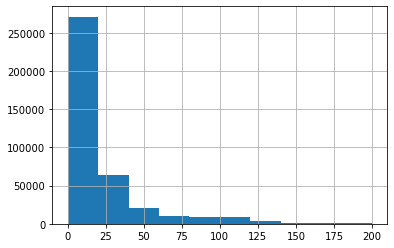

In [304]:
train['DIST'].hist()

In [305]:
train.groupby('ARI_CO')['CI_HOUR'].mean()

ARI_CO
AU    98.05939
BR   166.40628
CA    77.61455
CL   112.94241
CN    46.10447
FI    56.46198
ID    61.38497
IN    50.33820
JP    42.95683
KR    27.17722
LV    45.30576
MY    66.22710
MZ    85.39858
PE    94.30076
PH    18.65876
QA    51.13844
RU    92.27939
SG   109.03158
TT    66.11549
TW    22.43506
UA   108.14341
US    64.38862
VE   132.81664
VN    69.55111
ZA    80.81274
Name: CI_HOUR, dtype: float64

In [306]:
train['ARI_CO'].value_counts()

CN    141743
JP     52752
SG     43865
AU     32853
TW     32616
IN     16192
RU     14383
CA     10890
KR     10644
BR      9374
ID      5863
US      4420
UA      3363
LV      2140
MZ      2122
QA      1809
ZA      1667
VN      1581
TT      1188
PE       904
MY       856
CL       267
FI       257
VE        97
PH        93
Name: ARI_CO, dtype: int64

## 중복없음

In [307]:
train[train.duplicated(keep=False)]

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR


### 데이터 정의
- ARI_CO = 도착항의 소속국가(도착항 앞 2글자) - 범주형
- ARI_PO = 도착항의 항구명 (도착항 뒤 글자) 범주형
- SHIP_TYPE_CATEGORY = 선종 통합 바탕으로 5대 선종으로 분류(4개) - 범주형
- DIST = 정박지(ber_port)와 접인지 사이의 거리 - 연속형
- ATA = anc_port에 도착한 시점의 utc.실제 정박 시각(Actual Time of Arrival) - datetime
- BREADTH = 선박의 폭 - 범주형
- BUILT = 선박의 연령 - 연속형
- DEADWEIGHT = 선박의 재화중량톤수 - 연속형
- DEPTH = 선박의 깊이 - 범주형
- DRAUGHT = 홀수 높이 - 범주형
- GT = 용적톤수(Gross Tonnage)값 - 연속형
- LENGTH = 선박의 길이 - 연속형
- SHIPMANAGER = 선박 소유주 - 범주형
- FLAG = 선박의 국적 - 범주형
- U_WIND = 풍향 u벡터 - 연속형
- V_WIND = 풍향 v벡터 - 연속형
- AIR_TEMPERATURE = 기온 - 연속형
- BN = 보퍼트 풍력 계급 - 범주형
- ATA_LT = anc_port에 도착한 시점의 현지 정박 시각(Local Time of Arrival)(단위 : H) - 연속형
- PORT_SIZE = 접인지 폴리곤 영역의 크기 - 연속형

## 기상관련변수
- U_WIND (풍속)
- V_WIND (풍속)
- ATA변수 (year, month, hour, day, minute, weekday,weekend)
- wind_speed 
- BN (B) 
- B
- AIR_TEMPERATURE

## 지리관련변수
- DIST 

## 선박관련변수
- ID
- BREADTH
- DEADWEIGHT
- BUILT
- DEPTH
- DRAUGHT
- GT
- LENGTH
- SHIPMANAGER
- FLAG
- PORT_SIZE
- SHIP_TYPE_CATEGORY
- CI_HOUR (CI)

## 항구관련함수
- ARI_CO
- ARI_PO
- PORT_SIZE

### ATA변수 datetime으로 변환 후 year, month, day, hour, minute, weekday 파생변수 생성
### 'BERADTH', 'DEPTH', 'DRAUGHT', 'LENGTH' 결측치는 데이터 하나에 존재 -> 제거

In [308]:
train.drop(356484,axis=0,inplace=True)

## 노이즈 데이터 
- utc 시간 기준으로 같은 국가, 같은 항구, 같은 시간일 때 풍향, 기온이 다른 데이터 제거
- 혹은 결측치로 대체 후 결측치와 함께 처리

In [309]:
# 'ARI_CO', 'ARI_PO', 'ATA' 별로 'U_WIND','V_WIND','AIR_TEMPERATURE'열의 고유한 값 수를 계산합니다.
unique_counts = train.groupby(['ARI_CO', 'ARI_PO', 'ATA'])[['U_WIND','V_WIND','AIR_TEMPERATURE']].nunique()
# 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE' 열 중에서 고유한 값 수가 1보다 큰 행을 필터링합니다.
filtered_data = unique_counts[(unique_counts['U_WIND'] > 1) |(unique_counts['V_WIND'] > 1) |(unique_counts['AIR_TEMPERATURE'] > 1)] 
# 고유한 값 수가 1보다 큰 그룹의 인덱스 추출
filtered_indices = filtered_data.index
# 'ARI_CO', 'ARI_PO', 'ATA'가 필터링된 인덱스에 포함되지 않는 행만 선택하여 새로운 데이터프레임 생성
train = train[~train.set_index(['ARI_CO', 'ARI_PO', 'ATA']).index.isin(filtered_indices)]

# ATA 
- ATA datetime으로 변환
- year, month, day, minute,weekday 파생변수 생성

In [310]:
# 원본 데이터프레임을 복사하여 새로운 데이터프레임을 생성
new_train = train.copy()
# 새로운 데이터프레임에 작업 수행
new_train['ATA'] = pd.to_datetime(new_train['ATA'])
# 새로운 데이터프레임을 원본 데이터프레임에 할당
train = new_train

# datetime을 여러 파생 변수로 변환
# 토요일5, 일요일 6
for df in [train]:
    df['year'] = df['ATA'].dt.year
  #  df['Quarter'] = df['ATA'].dt.quarter
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday
    

In [311]:
# 원본 데이터프레임을 복사하여 새로운 데이터프레임을 생성
new_test = test.copy()
# 새로운 데이터프레임에 작업 수행
new_test['ATA'] = pd.to_datetime(new_test['ATA'])
# 새로운 데이터프레임을 원본 데이터프레임에 할당
test = new_test
# datetime을 여러 파생 변수로 변환
for df in [test]:
    df['year'] = df['ATA'].dt.year
  #  df['Quarter'] = df['ATA'].dt.quarter
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

# 결측치 처리
#### 20년 이후 데이터는 결측치 없음. 18년 이전데이터는 모두 결측치 . 18년 19년은 있는 것도 있고 없는 것도 있음.
- MIce

## 인코딩 먼저해야 Mice 가능

In [312]:
X = train.copy()

In [313]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import bisect
# Categorical 컬럼 인코딩
categorical_features = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY','ID', 'SHIPMANAGER', 'FLAG']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))
    le_classes_set = set(le.classes_)
    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    test[feature] = le.transform(test[feature].astype(str))
    encoders[feature] = le

Encoding features: 100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.92it/s]


In [314]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# IterativeImputer 모델 생성
imputer = IterativeImputer(max_iter=10, random_state=0)

# 'ARI_CO', 'ARI_PO', 'year', 'month', 'hour', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE' 열을 포함한 열들 선택
selected_columns = ['ARI_CO', 'ARI_PO', 'year', 'month', 'hour', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE']
data_for_imputation = X[selected_columns]

# IterativeImputer를 사용하여 결측치 채우기
imputed_data = imputer.fit_transform(data_for_imputation)

# 결과를 기존 데이터프레임에 적용
X[selected_columns] = imputed_data

# train 데이터프레임에 결측치가 없는지 확인
X.isna().sum()


SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    0
BUILT                      0
DEADWEIGHT                 0
DEPTH                      0
DRAUGHT                    0
GT                         0
LENGTH                     0
SHIPMANAGER                0
FLAG                       0
U_WIND                     0
V_WIND                     0
AIR_TEMPERATURE            0
BN                    163688
ATA_LT                     0
PORT_SIZE                  0
CI_HOUR                    0
year                       0
month                      0
day                        0
hour                       0
minute                     0
weekday                    0
dtype: int64

In [315]:
train = X.copy()

In [316]:
# 'ARI_CO', 'ARI_PO', 'year', 'month', 'hour', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE' 열을 포함한 열들 선택
selected_columns = ['ARI_CO', 'ARI_PO', 'year', 'month', 'hour', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE']
data_for_imputation = test[selected_columns]

# IterativeImputer를 사용하여 결측치 채우기
imputed_data = imputer.transform(data_for_imputation)

# 결과를 기존 데이터프레임에 적용
test[selected_columns] = imputed_data

# train 데이터프레임에 결측치가 없는지 확인
test.isna().sum()

SAMPLE_ID                 0
ARI_CO                    0
ARI_PO                    0
SHIP_TYPE_CATEGORY        0
DIST                      0
ATA                       0
ID                        0
BREADTH                   0
BUILT                     0
DEADWEIGHT                0
DEPTH                     0
DRAUGHT                   0
GT                        0
LENGTH                    0
SHIPMANAGER               0
FLAG                      0
U_WIND                    0
V_WIND                    0
AIR_TEMPERATURE           0
BN                    91725
ATA_LT                    0
PORT_SIZE                 0
year                      0
month                     0
day                       0
hour                      0
minute                    0
weekday                   0
dtype: int64

In [317]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387636 entries, 0 to 391938
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   SAMPLE_ID           387636 non-null  object        
 1   ARI_CO              387636 non-null  float64       
 2   ARI_PO              387636 non-null  float64       
 3   SHIP_TYPE_CATEGORY  387636 non-null  int32         
 4   DIST                387636 non-null  float64       
 5   ATA                 387636 non-null  datetime64[ns]
 6   ID                  387636 non-null  int32         
 7   BREADTH             387636 non-null  float64       
 8   BUILT               387636 non-null  int64         
 9   DEADWEIGHT          387636 non-null  int64         
 10  DEPTH               387636 non-null  float64       
 11  DRAUGHT             387636 non-null  float64       
 12  GT                  387636 non-null  int64         
 13  LENGTH              387636 no

# 파생변수 생성식

## 풍속계산

In [318]:
import numpy as np
train['wind_speed'] = np.sqrt(train['U_WIND']**2 + train['V_WIND']**2)
test['wind_speed'] = np.sqrt(test['U_WIND']**2 + test['V_WIND']**2)

# 보퍼트 계급 식 : 풍속 = 0.836 * (BN) **(3/2)

In [319]:
# 'WIND_SPEED'를 기반으로 'BN' 변수의 결측치 채우기
train['BN'].fillna((train['wind_speed'] / 0.836) ** (2/3), inplace=True)
test['BN'].fillna((test['wind_speed'] / 0.836) ** (2/3), inplace=True)
# 결과 확인
train.isnull().sum()


SAMPLE_ID             0
ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ATA                   0
ID                    0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
SHIPMANAGER           0
FLAG                  0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
CI_HOUR               0
year                  0
month                 0
day                   0
hour                  0
minute                0
weekday               0
wind_speed            0
dtype: int64

In [320]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387636 entries, 0 to 391938
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   SAMPLE_ID           387636 non-null  object        
 1   ARI_CO              387636 non-null  float64       
 2   ARI_PO              387636 non-null  float64       
 3   SHIP_TYPE_CATEGORY  387636 non-null  int32         
 4   DIST                387636 non-null  float64       
 5   ATA                 387636 non-null  datetime64[ns]
 6   ID                  387636 non-null  int32         
 7   BREADTH             387636 non-null  float64       
 8   BUILT               387636 non-null  int64         
 9   DEADWEIGHT          387636 non-null  int64         
 10  DEPTH               387636 non-null  float64       
 11  DRAUGHT             387636 non-null  float64       
 12  GT                  387636 non-null  int64         
 13  LENGTH              387636 no

In [321]:
# 자료형 변환 (float --> int)
cols0 = ['ARI_CO','ARI_PO','year','month','hour']
train[cols0] = train[cols0].astype("int32")

cols00 = ['BREADTH','DEPTH','DRAUGHT','BN']
train[cols00] = train[cols00].astype("int64")

# 자료형 변환 (int --> float)
cols = ['BUILT','DEADWEIGHT','GT']
train[cols] = train[cols].astype("float64")

In [322]:
# 자료형 변환 (float --> int)
cols0 = ['ARI_CO','ARI_PO','year','month','hour']
test[cols0] = test[cols0].astype("int32")
cols00 = ['BREADTH','DEPTH','DRAUGHT','BN']
test[cols00] = test[cols00].astype("int64")
# 자료형 변환 (int --> float)
cols = ['BUILT','DEADWEIGHT','GT']
test[cols] = test[cols].astype("float64")

# ATA변수 현지시간으로 바꾸기 
- year, month, day, minute,weekday 파생변수 생성
- ATA_LT를 hour값으로 사용 -> 왜냐하면 같은 항구지만 시간차가 다른경우가 존재. 1~2시간 차이기 때문에 hour은 ATA_LT로 기존 변수의 시간으로 하기로함
- weekend 파생변수 생성 -> weekday값이 5,6 이면 weekend = 1 else = 0.

In [323]:
conditions = [
    (train['ARI_CO'] == 'CN'),  # 'CN'인 경우 8시간 추가
    (train['ARI_CO'] == 'JP'),  # 'JP'인 경우 9시간 추가
    (train['ARI_CO'] == 'RU'),  # 'RU'인 경우 2시간 추가
    (train['ARI_CO'] == 'AU'),  # 'AU'인 경우 11시간 추가
    (train['ARI_CO'] == 'SG'),  # 'SG'인 경우 8시간 추가
    (train['ARI_CO'] == 'ZA'),  # 'ZA'인 경우 2시간 추가
    (train['ARI_CO'] == 'KR'),  # 'KR'인 경우 9시간 추가
    (train['ARI_CO'] == 'TW'),  # 'TW'인 경우 8시간 추가
    (train['ARI_CO'] == 'TT'),  # 'TT'인 경우 -4시간 추가
    (train['ARI_CO'] == 'ID'),  # 'ID'인 경우 7시간 추가
    (train['ARI_CO'] == 'BR'),  # 'BR'인 경우 -2시간 추가
    (train['ARI_CO'] == 'QA'),  # 'QA'인 경우 3시간 추가
    (train['ARI_CO'] == 'LV'),  # 'LV'인 경우 3시간 추가
    (train['ARI_CO'] == 'MZ'),  # 'MZ'인 경우 2시간 추가
    (train['ARI_CO'] == 'US'),  # 'US'인 경우 -4시간 추가
    (train['ARI_CO'] == 'IN'),  # 'IN'인 경우 5.5시간 추가
    (train['ARI_CO'] == 'UA'),  # 'UA'인 경우 3시간 추가
    (train['ARI_CO'] == 'CA'),  # 'CA'인 경우 -2.5시간 추가
    (train['ARI_CO'] == 'MY'),  # 'MY'인 경우 8시간 추가
    (train['ARI_CO'] == 'PE'),  # 'PE'인 경우 -5시간 추가
    (train['ARI_CO'] == 'VN'),  # 'VN'인 경우 7시간 추가
    (train['ARI_CO'] == 'FI'),  # 'FI'인 경우 3시간 추가
    (train['ARI_CO'] == 'CL'),  # 'CL'인 경우 -3시간 추가
    (train['ARI_CO'] == 'VE'),  # 'VE'인 경우 -4시간 추가
    (train['ARI_CO'] == 'PH')   # 'PH'인 경우 8시간 추가
]

choices = [
    train['ATA'] + pd.Timedelta(hours=8),
    train['ATA'] + pd.Timedelta(hours=9),
    train['ATA'] + pd.Timedelta(hours=2),
    train['ATA'] + pd.Timedelta(hours=11),
    train['ATA'] + pd.Timedelta(hours=8),
    train['ATA'] + pd.Timedelta(hours=2),
    train['ATA'] + pd.Timedelta(hours=9),
    train['ATA'] + pd.Timedelta(hours=8),
    train['ATA'] + pd.Timedelta(hours=-4),
    train['ATA'] + pd.Timedelta(hours=7),
    train['ATA'] + pd.Timedelta(hours=-2),
    train['ATA'] + pd.Timedelta(hours=3),
    train['ATA'] + pd.Timedelta(hours=3),
    train['ATA'] + pd.Timedelta(hours=2),
    train['ATA'] + pd.Timedelta(hours=-4),
    train['ATA'] + pd.Timedelta(hours=5.5),
    train['ATA'] + pd.Timedelta(hours=3),
    train['ATA'] + pd.Timedelta(hours=-2.5),
    train['ATA'] + pd.Timedelta(hours=8),
    train['ATA'] + pd.Timedelta(hours=-5),
    train['ATA'] + pd.Timedelta(hours=7),
    train['ATA'] + pd.Timedelta(hours=3),
    train['ATA'] + pd.Timedelta(hours=-3),
    train['ATA'] + pd.Timedelta(hours=-4),
    train['ATA'] + pd.Timedelta(hours=8)
]

train['ATA'] = np.select(conditions, choices, default=train['ATA'])

# datetime을 여러 파생 변수로 변환
# 토요일5, 일요일 6
for df in [train]:
    df['year'] = df['ATA'].dt.year
 #   df['Quarter'] = df['ATA'].dt.quarter
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday
    
train['hour']=train['ATA_LT']
train.drop('ATA_LT',axis=1,inplace=True)
train['weekend'] = train['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

In [324]:
test['ATA'] = pd.to_datetime(test['ATA'])

conditions = [
    (test['ARI_CO'] == 'CN'),  # 'CN'인 경우 8시간 추가
    (test['ARI_CO'] == 'JP'),  # 'JP'인 경우 9시간 추가
    (test['ARI_CO'] == 'RU'),  # 'RU'인 경우 2시간 추가
    (test['ARI_CO'] == 'AU'),  # 'AU'인 경우 11시간 추가
    (test['ARI_CO'] == 'SG'),  # 'SG'인 경우 8시간 추가
    (test['ARI_CO'] == 'ZA'),  # 'ZA'인 경우 2시간 추가
    (test['ARI_CO'] == 'KR'),  # 'KR'인 경우 9시간 추가
    (test['ARI_CO'] == 'TW'),  # 'TW'인 경우 8시간 추가
    (test['ARI_CO'] == 'TT'),  # 'TT'인 경우 -4시간 추가
    (test['ARI_CO'] == 'ID'),  # 'ID'인 경우 7시간 추가
    (test['ARI_CO'] == 'BR'),  # 'BR'인 경우 -2시간 추가
    (test['ARI_CO'] == 'QA'),  # 'QA'인 경우 3시간 추가
    (test['ARI_CO'] == 'LV'),  # 'LV'인 경우 3시간 추가
    (test['ARI_CO'] == 'MZ'),  # 'MZ'인 경우 2시간 추가
    (test['ARI_CO'] == 'US'),  # 'US'인 경우 -4시간 추가
    (test['ARI_CO'] == 'IN'),  # 'IN'인 경우 5.5시간 추가
    (test['ARI_CO'] == 'UA'),  # 'UA'인 경우 3시간 추가
    (test['ARI_CO'] == 'CA'),  # 'CA'인 경우 -2.5시간 추가
    (test['ARI_CO'] == 'MY'),  # 'MY'인 경우 8시간 추가
    (test['ARI_CO'] == 'PE'),  # 'PE'인 경우 -5시간 추가
    (test['ARI_CO'] == 'VN'),  # 'VN'인 경우 7시간 추가
    (test['ARI_CO'] == 'FI'),  # 'FI'인 경우 3시간 추가
    (test['ARI_CO'] == 'CL'),  # 'CL'인 경우 -3시간 추가
    (test['ARI_CO'] == 'VE'),  # 'VE'인 경우 -4시간 추가
    (test['ARI_CO'] == 'PH')   # 'PH'인 경우 8시간 추가
]

choices = [
    test['ATA'] + pd.Timedelta(hours=8),
    test['ATA'] + pd.Timedelta(hours=9),
    test['ATA'] + pd.Timedelta(hours=2),
    test['ATA'] + pd.Timedelta(hours=11),
    test['ATA'] + pd.Timedelta(hours=8),
    test['ATA'] + pd.Timedelta(hours=2),
    test['ATA'] + pd.Timedelta(hours=9),
    test['ATA'] + pd.Timedelta(hours=8),
    test['ATA'] + pd.Timedelta(hours=-4),
    test['ATA'] + pd.Timedelta(hours=7),
    test['ATA'] + pd.Timedelta(hours=-2),
    test['ATA'] + pd.Timedelta(hours=3),
    test['ATA'] + pd.Timedelta(hours=3),
    test['ATA'] + pd.Timedelta(hours=2),
    test['ATA'] + pd.Timedelta(hours=-4),
    test['ATA'] + pd.Timedelta(hours=5.5),
    test['ATA'] + pd.Timedelta(hours=3),
    test['ATA'] + pd.Timedelta(hours=-2.5),
    test['ATA'] + pd.Timedelta(hours=8),
    test['ATA'] + pd.Timedelta(hours=-5),
    test['ATA'] + pd.Timedelta(hours=7),
    test['ATA'] + pd.Timedelta(hours=3),
    test['ATA'] + pd.Timedelta(hours=-3),
    test['ATA'] + pd.Timedelta(hours=-4),
    test['ATA'] + pd.Timedelta(hours=8)
]

test['ATA'] = np.select(conditions, choices, default=test['ATA'])

# datetime을 여러 파생 변수로 변환
for df in [test]:
    df['year'] = df['ATA'].dt.year
#    df['Quarter'] = df['ATA'].dt.quarter
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday
    
    
test['hour']=test['ATA_LT']
test.drop('ATA_LT',axis=1,inplace=True)
test['weekend'] = test['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

In [325]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387636 entries, 0 to 391938
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   SAMPLE_ID           387636 non-null  object        
 1   ARI_CO              387636 non-null  int32         
 2   ARI_PO              387636 non-null  int32         
 3   SHIP_TYPE_CATEGORY  387636 non-null  int32         
 4   DIST                387636 non-null  float64       
 5   ATA                 387636 non-null  datetime64[ns]
 6   ID                  387636 non-null  int32         
 7   BREADTH             387636 non-null  int64         
 8   BUILT               387636 non-null  float64       
 9   DEADWEIGHT          387636 non-null  float64       
 10  DEPTH               387636 non-null  int64         
 11  DRAUGHT             387636 non-null  int64         
 12  GT                  387636 non-null  float64       
 13  LENGTH              387636 no

In [326]:
train.drop(['SAMPLE_ID','ATA'],axis=1,inplace=True)
test.drop(['SAMPLE_ID', 'ATA'], axis=1,inplace=True)

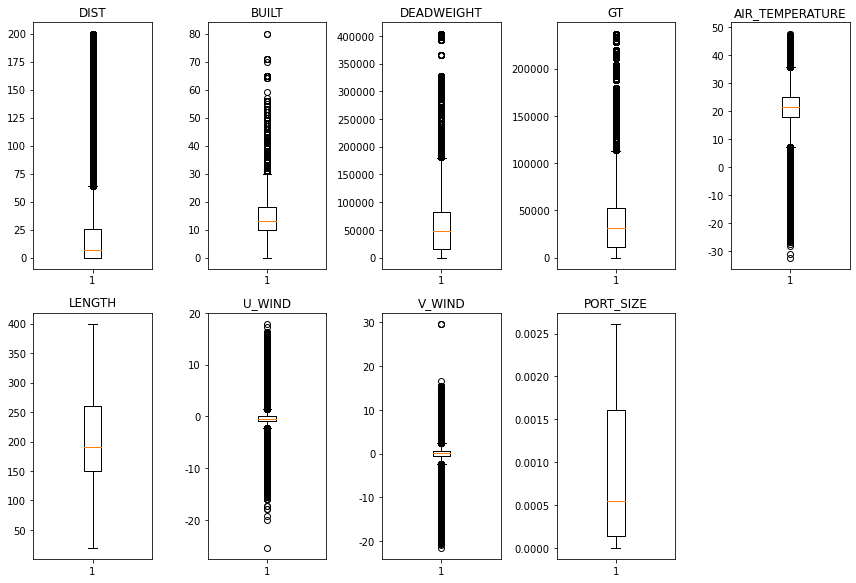

In [327]:
# 변수에 대한 박스플롯
plt.figure(figsize=(12, 12))
variables = ['DIST', 'BUILT', 'DEADWEIGHT', 'GT', 'AIR_TEMPERATURE',
             'LENGTH','U_WIND','V_WIND', 'PORT_SIZE']

for i, var in enumerate(variables):
    plt.subplot(3, 5, i+1)
    plt.boxplot(train[var])
    plt.title(var)

plt.tight_layout()
plt.show()

In [328]:
train_origin=train.copy()

In [329]:
# 이상치 추출 및 제거

# 내가 원하는 이상치 제거 변수
outlier_variable = ['DIST', 'BUILT', 'DEADWEIGHT', 'GT', 'AIR_TEMPERATURE','U_WIND','V_WIND'] # 예시 : 시각적으로 이상치가 가장 많아 보이는 2개 변수 선택
outlier_indices = []  # 이상치 인덱스 목록

for i in outlier_variable:
    custom_Q1 = train[i].quantile(q=0.15)
    custom_Q3 = train[i].quantile(q=0.85)
    custom_IQR = custom_Q3 - custom_Q1

    outliers = train[(train[i] > custom_Q3 + 1.5 * custom_IQR) | (train[i] < custom_Q1 - 1.5 * custom_IQR)].index
    outlier_indices.extend(outliers)
    
train = train.drop(outlier_indices)

print('Original_train :', len(train_origin))

print('\nNum removed data :', len(set(outlier_indices)))
print('Cleaned_train :', len(train))

Original_train : 387636

Num removed data : 40100
Cleaned_train : 347536


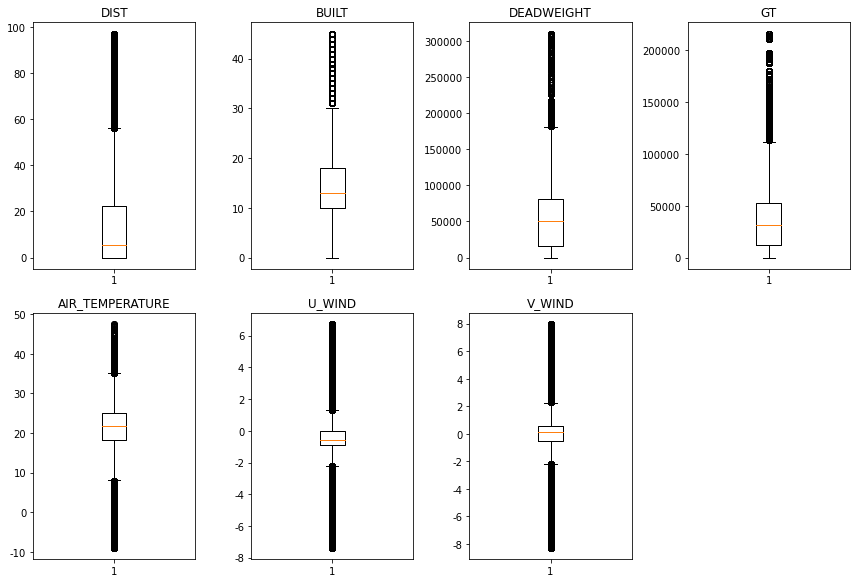

In [330]:
# 변수에 대한 박스플롯
plt.figure(figsize=(12, 12))
variables = ['DIST', 'BUILT', 'DEADWEIGHT', 'GT', 'AIR_TEMPERATURE','U_WIND','V_WIND']

for i, var in enumerate(variables):
    plt.subplot(3, 4, i+1)
    plt.boxplot(train[var])
    plt.title(var)

plt.tight_layout()
plt.show()

<AxesSubplot:>

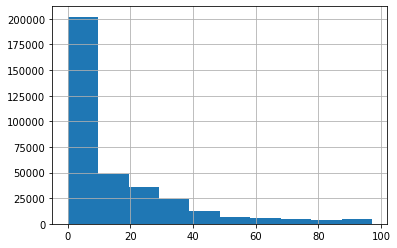

In [331]:
train['DIST'].hist()

### 기온,기상 관련변수

In [332]:
# 평균 풍향벡터 변수 생성
train['Average_WIND'] = train[['U_WIND', 'V_WIND']].mean(axis=1)

# 풍향벡터 변동성 변수 생성
train['WIND_Volatility'] = train[['U_WIND', 'V_WIND']].std(axis=1)


# 달별 풍향 변수 생성
monthly_WIND = train.groupby('month').agg({'U_WIND': 'mean', 'V_WIND': 'mean'})
train = train.merge(monthly_WIND, on='month', how='left', suffixes=('', '_monthly'))

# 분기별 풍향 변수 생성
#quarterly_WIND = train.groupby(['year', 'Quarter']).agg({'U_WIND': 'mean', 'V_WIND': 'mean'})
#train = train.merge(quarterly_WIND, on=['year', 'Quarter'], how='left', suffixes=('', '_Quarterly'))

# 달별 기온 변수 생성
monthly_AIR_TEMPERATURE = train.groupby('month').agg({'AIR_TEMPERATURE': 'mean'})
train = train.merge(monthly_AIR_TEMPERATURE, on='month', how='left', suffixes=('', '_monthly'))

# 분기별 기온 변수 생성
#quarterly_AIR_TEMPERATURE = train.groupby(['year', 'Quarter']).agg({'AIR_TEMPERATURE': 'mean'})
#train = train.merge(quarterly_AIR_TEMPERATURE, on=['year', 'Quarter'], how='left', suffixes=('', '_Quarterly'))

In [333]:
# 평균 풍향벡터 변수 생성
test['Average_WIND'] = test[['U_WIND', 'V_WIND']].mean(axis=1)

# 풍향벡터 변동성 변수 생성
test['WIND_Volatility'] = test[['U_WIND', 'V_WIND']].std(axis=1)


# 달별 풍향 변수 생성
monthly_WIND = test.groupby('month').agg({'U_WIND': 'mean', 'V_WIND': 'mean'})
test = test.merge(monthly_WIND, on='month', how='left', suffixes=('', '_monthly'))

# 분기별 풍향 변수 생성
#quarterly_WIND = test.groupby(['year', 'Quarter']).agg({'U_WIND': 'mean', 'V_WIND': 'mean'})
#test = test.merge(quarterly_WIND, on=['year', 'Quarter'], how='left', suffixes=('', '_Quarterly'))

# 달별 기온 변수 생성
monthly_AIR_TEMPERATURE = test.groupby('month').agg({'AIR_TEMPERATURE': 'mean'})
test = test.merge(monthly_AIR_TEMPERATURE, on='month', how='left', suffixes=('', '_monthly'))

# 분기별 기온 변수 생성
#quarterly_AIR_TEMPERATURE = test.groupby(['year', 'Quarter']).agg({'AIR_TEMPERATURE': 'mean'})
#test = test.merge(quarterly_AIR_TEMPERATURE, on=['year', 'Quarter'], how='left', suffixes=('', '_Quarterly'))

In [334]:
#분기
#train['sin_Quarter'] = -np.sin(2 * np.pi * train['Quarter']/4.0)
#train['cos_Quarter'] = -np.cos(2 * np.pi * train['Quarter']/4.0)
#test['sin_Quarter'] = -np.sin(2 * np.pi * test['Quarter']/4.0)
#test['cos_Quarter'] = -np.cos(2 * np.pi * test['Quarter']/4.0)

#월
train['sin_month'] = -np.sin(2 * np.pi * train['month']/12.0)
train['cos_month'] = -np.cos(2 * np.pi * train['month']/12.0)
test['sin_month'] = -np.sin(2 * np.pi * test['month']/12.0)
test['cos_month'] = -np.cos(2 * np.pi * test['month']/12.0)

#평일
train['sin_weekday'] = -np.sin(2 * np.pi * train['weekday']/7.0)
train['cos_weekday'] = -np.cos(2 * np.pi * train['weekday']/7.0)
test['sin_weekday'] = -np.sin(2 * np.pi * test['weekday']/7.0)
test['cos_weekday'] = -np.cos(2 * np.pi * test['weekday']/7.0)

#주말
train['sin_weekend'] = -np.sin(2 * np.pi * train['weekend']/2.0)
train['cos_weekend'] = -np.cos(2 * np.pi * train['weekend']/2.0)
test['sin_weekend'] = -np.sin(2 * np.pi * test['weekend']/2.0)
test['cos_weekend'] = -np.cos(2 * np.pi * test['weekend']/2.0)

## 클러스터링

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_k

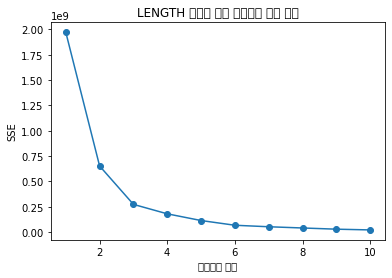

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-331-da0856c07886>:8: ConvergenceWarning: Numb

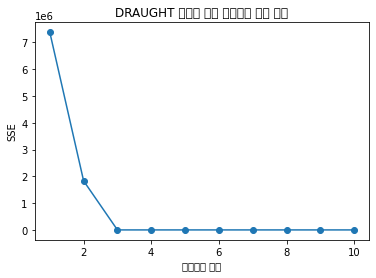

In [331]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow(X, variable_name):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++')
        km.fit(X[[variable_name]])
        sse.append(km.inertia_)

    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.title(f'{variable_name} 변수에 대한 클러스터 개수 결정')
    plt.show()

# 다양한 변수에 대해 elbow 함수 호출
variables_to_cluster = ['LENGTH','DRAUGHT']

for variable in variables_to_cluster:
    elbow(train, variable)


In [509]:
km = KMeans(n_clusters=3, n_init=10)
train['draught_cls'] = km.fit_predict(train[['DRAUGHT']])
test['draught_cls'] = km.predict(test[['DRAUGHT']])

# ----클러스터링후 나누고 모델링 해보기 -----------------------

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb  
train_x = train.drop('CI_HOUR',axis=1)
train_y = train['CI_HOUR']
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# 데이터셋을 학습용과 검증용으로 분할
train_y = np.log1p(train_y)
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)

In [594]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error


# XGBoost 모델 생성
model = xgb.XGBRegressor(eval_metric='mae',random_state=42)

# 모델을 훈련 데이터로 학습
model.fit(train_x, train_y)

# 검증 데이터에 대한 예측값 계산
predictions = model.predict(X_val)
predictions = np.expm1(predictions)  # 지수 변환 역으로 해줌

# 실제 값 역변환
y_val_exp = np.expm1(y_val)

# MAE 계산
mae = mean_absolute_error(y_val_exp, predictions)
print("Mean Absolute Error (MAE):", mae)

# Predicted vs Actual values
predict = pd.DataFrame({'Actual': y_val_exp, 'Predicted': predictions})
predict.head(10)

Mean Absolute Error (MAE): 40.7745449939307


,Actual,Predicted
35536,0.00000,-0.06412
212296,0.00000,-0.00834
235664,13.08528,8.58932
263043,0.00000,0.00531
172366,0.00000,0.03891
240998,220.24639,130.69151
100861,13.98528,46.39314
255513,22.43444,16.23935
340436,0.00000,0.05821
66319,0.00000,0.01047


## -----------------

In [1174]:
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor

xgb = xgb.XGBRegressor(n_estimators=750, gamma=0.12305908500748195,
                       reg_alpha=0.1836372656649303,reg_lambda=0.1110755127135756,
                       learning_rate=0.0326796377042791,max_depth=8,min_child_weight=3,
                       subsample=0.9462708098891059,n_jobs=-1, random_state=42)

cat = CatBoostRegressor(n_estimators=950, learning_rate=0.0456845,random_strength=77,
                        bagging_temperature=0.963518,max_depth=9,l2_leaf_reg=2e-4,
                        min_child_samples=82,od_type='IncToDec',random_state=42)

ets = ExtraTreesRegressor(n_estimators=550,min_samples_split=4,min_samples_leaf=6,
                          bootstrap=True,n_jobs=-1, random_state=42)
# 모델 생성
voting_model = VotingRegressor(estimators=[
    ('xgb', xgb),
    ('cat', cat),
    ('ets', ets)
])

# 모델 학습
voting_model.fit(train_x, train_y)

# 검증 데이터에 대한 예측값 계산
predictions = voting_model.predict(X_val)
predictions = np.expm1(predictions)  # 지수 변환 역으로 해줌

# 실제 값 역변환
y_val_exp = np.expm1(y_val)

# MAE 계산
mae = mean_absolute_error(y_val_exp, predictions)
print("Mean Absolute Error (MAE):", mae)

# Predicted vs Actual values
predict = pd.DataFrame({'Actual': y_val_exp, 'Predicted': predictions})
predict.head(10)

0:	learn: 2.0233133	total: 102ms	remaining: 1m 36s
1:	learn: 1.9567366	total: 173ms	remaining: 1m 22s
2:	learn: 1.8988234	total: 247ms	remaining: 1m 17s
3:	learn: 1.8418328	total: 337ms	remaining: 1m 19s
4:	learn: 1.8087464	total: 433ms	remaining: 1m 21s
5:	learn: 1.7611250	total: 490ms	remaining: 1m 17s
6:	learn: 1.7108641	total: 571ms	remaining: 1m 16s
7:	learn: 1.6710681	total: 652ms	remaining: 1m 16s
8:	learn: 1.6242868	total: 727ms	remaining: 1m 15s
9:	learn: 1.5825659	total: 793ms	remaining: 1m 14s
10:	learn: 1.5495577	total: 875ms	remaining: 1m 14s
11:	learn: 1.5121549	total: 943ms	remaining: 1m 13s
12:	learn: 1.4782405	total: 1.02s	remaining: 1m 13s
13:	learn: 1.4484672	total: 1.11s	remaining: 1m 14s
14:	learn: 1.4160013	total: 1.19s	remaining: 1m 13s
15:	learn: 1.3856922	total: 1.26s	remaining: 1m 13s
16:	learn: 1.3568694	total: 1.35s	remaining: 1m 13s
17:	learn: 1.3357206	total: 1.43s	remaining: 1m 13s
18:	learn: 1.3101820	total: 1.52s	remaining: 1m 14s
19:	learn: 1.2863651	t

160:	learn: 0.9684146	total: 12.5s	remaining: 1m 1s
161:	learn: 0.9683292	total: 12.6s	remaining: 1m 1s
162:	learn: 0.9683061	total: 12.7s	remaining: 1m 1s
163:	learn: 0.9682378	total: 12.7s	remaining: 1m 1s
164:	learn: 0.9680866	total: 12.8s	remaining: 1m
165:	learn: 0.9679313	total: 12.9s	remaining: 1m
166:	learn: 0.9677683	total: 13s	remaining: 1m
167:	learn: 0.9676621	total: 13s	remaining: 1m
168:	learn: 0.9675174	total: 13.1s	remaining: 1m
169:	learn: 0.9674322	total: 13.2s	remaining: 1m
170:	learn: 0.9671426	total: 13.3s	remaining: 1m
171:	learn: 0.9670473	total: 13.3s	remaining: 1m
172:	learn: 0.9668393	total: 13.4s	remaining: 1m
173:	learn: 0.9667085	total: 13.5s	remaining: 1m
174:	learn: 0.9661017	total: 13.5s	remaining: 59.9s
175:	learn: 0.9658890	total: 13.6s	remaining: 59.8s
176:	learn: 0.9657325	total: 13.7s	remaining: 59.7s
177:	learn: 0.9655796	total: 13.8s	remaining: 59.6s
178:	learn: 0.9654605	total: 13.8s	remaining: 59.5s
179:	learn: 0.9652657	total: 13.9s	remaining: 

322:	learn: 0.9317969	total: 25.1s	remaining: 48.8s
323:	learn: 0.9307428	total: 25.2s	remaining: 48.7s
324:	learn: 0.9306328	total: 25.3s	remaining: 48.6s
325:	learn: 0.9296356	total: 25.4s	remaining: 48.5s
326:	learn: 0.9293313	total: 25.4s	remaining: 48.5s
327:	learn: 0.9288504	total: 25.5s	remaining: 48.4s
328:	learn: 0.9284771	total: 25.6s	remaining: 48.3s
329:	learn: 0.9275266	total: 25.7s	remaining: 48.2s
330:	learn: 0.9268020	total: 25.7s	remaining: 48.1s
331:	learn: 0.9263381	total: 25.8s	remaining: 48.1s
332:	learn: 0.9256194	total: 25.9s	remaining: 48s
333:	learn: 0.9254429	total: 26s	remaining: 47.9s
334:	learn: 0.9249007	total: 26.1s	remaining: 47.9s
335:	learn: 0.9241919	total: 26.2s	remaining: 47.9s
336:	learn: 0.9231476	total: 26.3s	remaining: 47.8s
337:	learn: 0.9229969	total: 26.4s	remaining: 47.8s
338:	learn: 0.9225471	total: 26.5s	remaining: 47.7s
339:	learn: 0.9217675	total: 26.5s	remaining: 47.6s
340:	learn: 0.9215923	total: 26.6s	remaining: 47.6s
341:	learn: 0.92

483:	learn: 0.8754672	total: 37.9s	remaining: 36.5s
484:	learn: 0.8752666	total: 38s	remaining: 36.4s
485:	learn: 0.8751112	total: 38.1s	remaining: 36.3s
486:	learn: 0.8749166	total: 38.2s	remaining: 36.3s
487:	learn: 0.8747154	total: 38.2s	remaining: 36.2s
488:	learn: 0.8745379	total: 38.3s	remaining: 36.1s
489:	learn: 0.8743830	total: 38.4s	remaining: 36s
490:	learn: 0.8742746	total: 38.5s	remaining: 36s
491:	learn: 0.8740906	total: 38.5s	remaining: 35.9s
492:	learn: 0.8738079	total: 38.6s	remaining: 35.8s
493:	learn: 0.8736551	total: 38.7s	remaining: 35.7s
494:	learn: 0.8734767	total: 38.8s	remaining: 35.6s
495:	learn: 0.8733167	total: 38.8s	remaining: 35.5s
496:	learn: 0.8731563	total: 38.9s	remaining: 35.5s
497:	learn: 0.8730284	total: 39s	remaining: 35.4s
498:	learn: 0.8727728	total: 39.1s	remaining: 35.3s
499:	learn: 0.8725632	total: 39.2s	remaining: 35.3s
500:	learn: 0.8723901	total: 39.3s	remaining: 35.2s
501:	learn: 0.8722150	total: 39.4s	remaining: 35.2s
502:	learn: 0.872120

644:	learn: 0.8517246	total: 51.9s	remaining: 24.5s
645:	learn: 0.8515974	total: 52s	remaining: 24.5s
646:	learn: 0.8515151	total: 52.1s	remaining: 24.4s
647:	learn: 0.8513939	total: 52.2s	remaining: 24.3s
648:	learn: 0.8512905	total: 52.3s	remaining: 24.2s
649:	learn: 0.8511190	total: 52.3s	remaining: 24.2s
650:	learn: 0.8510156	total: 52.4s	remaining: 24.1s
651:	learn: 0.8509139	total: 52.5s	remaining: 24s
652:	learn: 0.8507452	total: 52.6s	remaining: 23.9s
653:	learn: 0.8506566	total: 52.7s	remaining: 23.8s
654:	learn: 0.8505594	total: 52.7s	remaining: 23.8s
655:	learn: 0.8504797	total: 52.8s	remaining: 23.7s
656:	learn: 0.8503855	total: 52.9s	remaining: 23.6s
657:	learn: 0.8502863	total: 53s	remaining: 23.5s
658:	learn: 0.8501478	total: 53.1s	remaining: 23.4s
659:	learn: 0.8500537	total: 53.2s	remaining: 23.4s
660:	learn: 0.8498994	total: 53.2s	remaining: 23.3s
661:	learn: 0.8498081	total: 53.3s	remaining: 23.2s
662:	learn: 0.8496510	total: 53.4s	remaining: 23.1s
663:	learn: 0.8495

806:	learn: 0.8344180	total: 1m 5s	remaining: 11.6s
807:	learn: 0.8343365	total: 1m 5s	remaining: 11.6s
808:	learn: 0.8342207	total: 1m 5s	remaining: 11.5s
809:	learn: 0.8341113	total: 1m 5s	remaining: 11.4s
810:	learn: 0.8339729	total: 1m 6s	remaining: 11.3s
811:	learn: 0.8338728	total: 1m 6s	remaining: 11.2s
812:	learn: 0.8338006	total: 1m 6s	remaining: 11.1s
813:	learn: 0.8336589	total: 1m 6s	remaining: 11.1s
814:	learn: 0.8335814	total: 1m 6s	remaining: 11s
815:	learn: 0.8335078	total: 1m 6s	remaining: 10.9s
816:	learn: 0.8334336	total: 1m 6s	remaining: 10.8s
817:	learn: 0.8333355	total: 1m 6s	remaining: 10.7s
818:	learn: 0.8332285	total: 1m 6s	remaining: 10.7s
819:	learn: 0.8331214	total: 1m 6s	remaining: 10.6s
820:	learn: 0.8330366	total: 1m 6s	remaining: 10.5s
821:	learn: 0.8329427	total: 1m 6s	remaining: 10.4s
822:	learn: 0.8328220	total: 1m 6s	remaining: 10.3s
823:	learn: 0.8326884	total: 1m 7s	remaining: 10.3s
824:	learn: 0.8325524	total: 1m 7s	remaining: 10.2s
825:	learn: 0.

,Actual,Predicted
217170,0.00000,-0.00009
179621,95.70361,85.97954
340743,92.26778,70.25529
333021,737.96306,212.84838
271923,328.52917,59.49202
48090,39.41333,123.87006
229382,0.00000,-0.01269
2275,0.00000,-0.00364
282995,861.98139,31.09044
152896,219.33417,86.04603


In [1175]:
pred_test3=voting_model.predict(test)
pred_test3 = [max(0, value) for value in pred_test3]
pred_exp_test3 = np.expm1(pred_test3)
#sample submission불러오기
sample_submission = pd.read_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/sample_submission.csv")
# 예측 결과를 sample_submission 데이터프레임에 저장
sample_submission['CI_HOUR'] = pred_exp_test3
# 결과를 CSV 파일로 저장
sample_submission.to_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/틀틀.csv", index=False)

In [1194]:
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
xgb_model = xgb.XGBRegressor(n_estimators=750, gamma=0.12305908500748195,
                       reg_alpha=0.1836372656649303,reg_lambda=0.1110755127135756,
                       learning_rate=0.0326796377042791,max_depth=8,min_child_weight=3,
                       subsample=0.9462708098891059,n_jobs=-1, random_state=42)

cat_model = CatBoostRegressor(n_estimators=950, learning_rate=0.0456845,random_strength=77,
                        bagging_temperature=0.963518,max_depth=9,l2_leaf_reg=2e-4,
                        min_child_samples=82,od_type='IncToDec',random_state=42)

ets_model = ExtraTreesRegressor(n_estimators=550,min_samples_split=4,min_samples_leaf=6,
                          bootstrap=True,n_jobs=-1, random_state=42)
xgb_model.fit(train_x, train_y)
cat_model.fit(train_x, train_y)
ets_model.fit(train_x, train_y)
feature_importances_xgb = xgb_model.feature_importances_
feature_importances_cat = cat_model.feature_importances_
feature_importances_ets = ets_model.feature_importances_


0:	learn: 2.0233133	total: 69.7ms	remaining: 1m 6s
1:	learn: 1.9567366	total: 137ms	remaining: 1m 4s
2:	learn: 1.8988234	total: 210ms	remaining: 1m 6s
3:	learn: 1.8418328	total: 273ms	remaining: 1m 4s
4:	learn: 1.8087464	total: 348ms	remaining: 1m 5s
5:	learn: 1.7611250	total: 386ms	remaining: 1m
6:	learn: 1.7108641	total: 451ms	remaining: 1m
7:	learn: 1.6710681	total: 514ms	remaining: 1m
8:	learn: 1.6242868	total: 585ms	remaining: 1m 1s
9:	learn: 1.5825659	total: 651ms	remaining: 1m 1s
10:	learn: 1.5495577	total: 720ms	remaining: 1m 1s
11:	learn: 1.5121549	total: 782ms	remaining: 1m 1s
12:	learn: 1.4782405	total: 856ms	remaining: 1m 1s
13:	learn: 1.4484672	total: 920ms	remaining: 1m 1s
14:	learn: 1.4160013	total: 991ms	remaining: 1m 1s
15:	learn: 1.3856922	total: 1.06s	remaining: 1m 2s
16:	learn: 1.3568694	total: 1.14s	remaining: 1m 2s
17:	learn: 1.3357206	total: 1.21s	remaining: 1m 2s
18:	learn: 1.3101820	total: 1.28s	remaining: 1m 2s
19:	learn: 1.2863651	total: 1.35s	remaining: 1m 2

161:	learn: 0.9683292	total: 10.7s	remaining: 51.9s
162:	learn: 0.9683061	total: 10.7s	remaining: 51.8s
163:	learn: 0.9682378	total: 10.8s	remaining: 51.7s
164:	learn: 0.9680866	total: 10.9s	remaining: 51.6s
165:	learn: 0.9679313	total: 10.9s	remaining: 51.6s
166:	learn: 0.9677683	total: 11s	remaining: 51.6s
167:	learn: 0.9676621	total: 11.1s	remaining: 51.5s
168:	learn: 0.9675174	total: 11.1s	remaining: 51.4s
169:	learn: 0.9674322	total: 11.2s	remaining: 51.4s
170:	learn: 0.9671426	total: 11.3s	remaining: 51.3s
171:	learn: 0.9670473	total: 11.3s	remaining: 51.2s
172:	learn: 0.9668393	total: 11.4s	remaining: 51.2s
173:	learn: 0.9667085	total: 11.5s	remaining: 51.1s
174:	learn: 0.9661017	total: 11.5s	remaining: 51s
175:	learn: 0.9658890	total: 11.6s	remaining: 50.9s
176:	learn: 0.9657325	total: 11.6s	remaining: 50.9s
177:	learn: 0.9655796	total: 11.7s	remaining: 50.8s
178:	learn: 0.9654605	total: 11.8s	remaining: 50.7s
179:	learn: 0.9652657	total: 11.9s	remaining: 50.7s
180:	learn: 0.96

320:	learn: 0.9329660	total: 21.2s	remaining: 41.5s
321:	learn: 0.9328698	total: 21.3s	remaining: 41.5s
322:	learn: 0.9317969	total: 21.3s	remaining: 41.4s
323:	learn: 0.9307428	total: 21.4s	remaining: 41.4s
324:	learn: 0.9306328	total: 21.5s	remaining: 41.3s
325:	learn: 0.9296356	total: 21.5s	remaining: 41.2s
326:	learn: 0.9293313	total: 21.6s	remaining: 41.2s
327:	learn: 0.9288504	total: 21.7s	remaining: 41.1s
328:	learn: 0.9284771	total: 21.8s	remaining: 41.1s
329:	learn: 0.9275266	total: 21.8s	remaining: 41s
330:	learn: 0.9268020	total: 21.9s	remaining: 40.9s
331:	learn: 0.9263381	total: 22s	remaining: 40.9s
332:	learn: 0.9256194	total: 22s	remaining: 40.8s
333:	learn: 0.9254429	total: 22.1s	remaining: 40.7s
334:	learn: 0.9249007	total: 22.2s	remaining: 40.7s
335:	learn: 0.9241919	total: 22.2s	remaining: 40.6s
336:	learn: 0.9231476	total: 22.3s	remaining: 40.6s
337:	learn: 0.9229969	total: 22.4s	remaining: 40.5s
338:	learn: 0.9225471	total: 22.5s	remaining: 40.5s
339:	learn: 0.9217

481:	learn: 0.8758413	total: 32.1s	remaining: 31.1s
482:	learn: 0.8756441	total: 32.1s	remaining: 31.1s
483:	learn: 0.8754672	total: 32.2s	remaining: 31s
484:	learn: 0.8752666	total: 32.3s	remaining: 30.9s
485:	learn: 0.8751112	total: 32.3s	remaining: 30.9s
486:	learn: 0.8749166	total: 32.4s	remaining: 30.8s
487:	learn: 0.8747154	total: 32.5s	remaining: 30.7s
488:	learn: 0.8745379	total: 32.5s	remaining: 30.7s
489:	learn: 0.8743830	total: 32.6s	remaining: 30.6s
490:	learn: 0.8742746	total: 32.7s	remaining: 30.5s
491:	learn: 0.8740906	total: 32.7s	remaining: 30.5s
492:	learn: 0.8738079	total: 32.8s	remaining: 30.4s
493:	learn: 0.8736551	total: 32.9s	remaining: 30.3s
494:	learn: 0.8734767	total: 32.9s	remaining: 30.3s
495:	learn: 0.8733167	total: 33s	remaining: 30.2s
496:	learn: 0.8731563	total: 33.1s	remaining: 30.1s
497:	learn: 0.8730284	total: 33.1s	remaining: 30.1s
498:	learn: 0.8727728	total: 33.2s	remaining: 30s
499:	learn: 0.8725632	total: 33.3s	remaining: 29.9s
500:	learn: 0.8723

642:	learn: 0.8519899	total: 42.9s	remaining: 20.5s
643:	learn: 0.8518718	total: 43s	remaining: 20.4s
644:	learn: 0.8517246	total: 43.1s	remaining: 20.4s
645:	learn: 0.8515974	total: 43.1s	remaining: 20.3s
646:	learn: 0.8515151	total: 43.2s	remaining: 20.2s
647:	learn: 0.8513939	total: 43.3s	remaining: 20.2s
648:	learn: 0.8512905	total: 43.3s	remaining: 20.1s
649:	learn: 0.8511190	total: 43.4s	remaining: 20s
650:	learn: 0.8510156	total: 43.5s	remaining: 20s
651:	learn: 0.8509139	total: 43.5s	remaining: 19.9s
652:	learn: 0.8507452	total: 43.6s	remaining: 19.8s
653:	learn: 0.8506566	total: 43.7s	remaining: 19.8s
654:	learn: 0.8505594	total: 43.7s	remaining: 19.7s
655:	learn: 0.8504797	total: 43.8s	remaining: 19.6s
656:	learn: 0.8503855	total: 43.9s	remaining: 19.6s
657:	learn: 0.8502863	total: 43.9s	remaining: 19.5s
658:	learn: 0.8501478	total: 44s	remaining: 19.4s
659:	learn: 0.8500537	total: 44.1s	remaining: 19.4s
660:	learn: 0.8498994	total: 44.1s	remaining: 19.3s
661:	learn: 0.849808

803:	learn: 0.8346687	total: 53.8s	remaining: 9.77s
804:	learn: 0.8346006	total: 53.9s	remaining: 9.7s
805:	learn: 0.8344987	total: 53.9s	remaining: 9.64s
806:	learn: 0.8344180	total: 54s	remaining: 9.57s
807:	learn: 0.8343365	total: 54.1s	remaining: 9.5s
808:	learn: 0.8342207	total: 54.1s	remaining: 9.44s
809:	learn: 0.8341113	total: 54.2s	remaining: 9.37s
810:	learn: 0.8339729	total: 54.3s	remaining: 9.3s
811:	learn: 0.8338728	total: 54.4s	remaining: 9.24s
812:	learn: 0.8338006	total: 54.4s	remaining: 9.17s
813:	learn: 0.8336589	total: 54.5s	remaining: 9.1s
814:	learn: 0.8335814	total: 54.6s	remaining: 9.04s
815:	learn: 0.8335078	total: 54.6s	remaining: 8.97s
816:	learn: 0.8334336	total: 54.7s	remaining: 8.9s
817:	learn: 0.8333355	total: 54.7s	remaining: 8.83s
818:	learn: 0.8332285	total: 54.8s	remaining: 8.77s
819:	learn: 0.8331214	total: 54.9s	remaining: 8.7s
820:	learn: 0.8330366	total: 55s	remaining: 8.63s
821:	learn: 0.8329427	total: 55s	remaining: 8.57s
822:	learn: 0.8328220	to

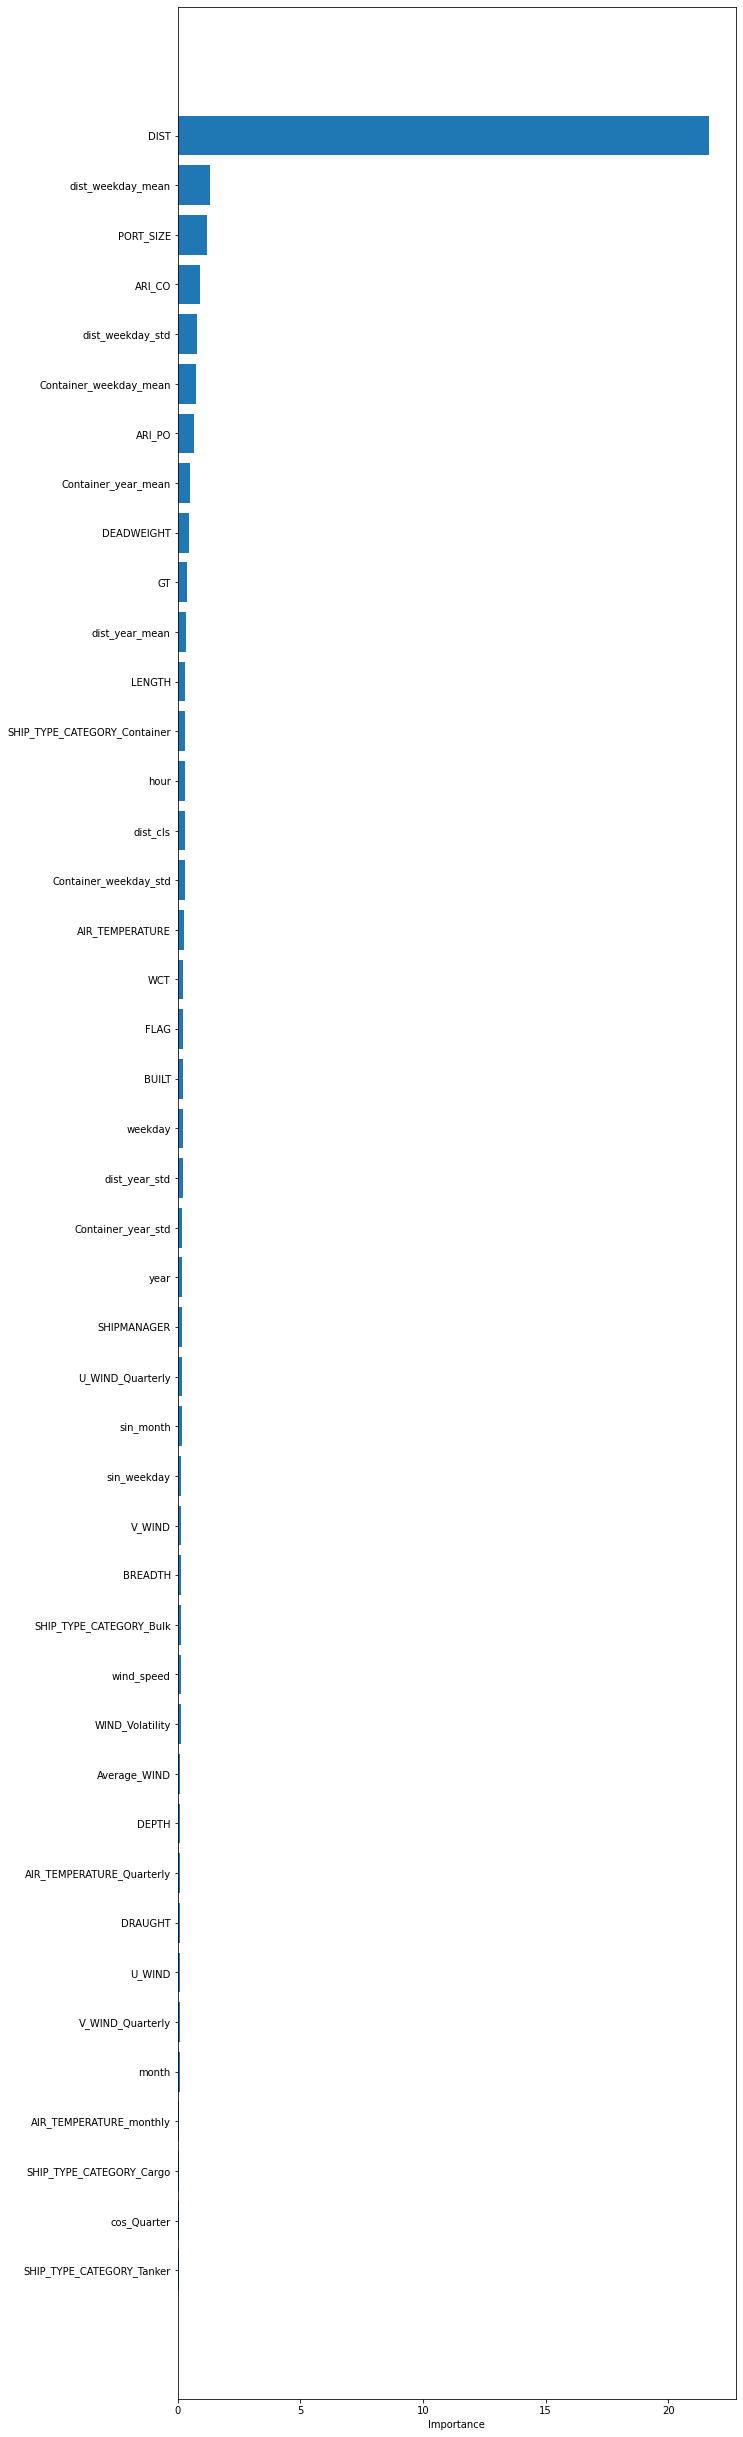

In [1195]:
average_feature_importance = (feature_importances_xgb + feature_importances_cat + feature_importances_ets) / 3
sorted_idx = average_feature_importance.argsort()

plt.figure(figsize=(10, len(train_x.columns)))
plt.barh(range(train_x.shape[1]), average_feature_importance[sorted_idx], align='center')
plt.yticks(range(train_x.shape[1]), train_x.columns[sorted_idx])
plt.xlabel('Importance')
plt.show()

In [211]:
selected_features = train_x.columns[average_feature_importance >= 0.07]
selected_features

Index(['ARI_CO', 'ARI_PO', 'DIST', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH',
       'DRAUGHT', 'GT', 'LENGTH', 'SHIPMANAGER', 'FLAG', 'V_WIND',
       'AIR_TEMPERATURE', 'PORT_SIZE', 'year', 'hour', 'weekday',
       'SHIP_TYPE_CATEGORY_Bulk', 'SHIP_TYPE_CATEGORY_Container', 'wind_speed',
       'weekend', 'WIND_Volatility', 'U_WIND_Quarterly', 'V_WIND_Quarterly',
       'day_max_AIR_TEMPERATURE', 'day_mean_AIR_TEMPERATURE',
       'day_min_AIR_TEMPERATURE', 'day_AIR_TEMPERATURE_range', 'sin_month',
       'sin_weekday', 'cos_weekday', 'sin_weekend', 'cos_weekend', 'WCT',
       'dist_cls'],
      dtype='object')

In [1196]:
selected_features = train_x.columns[average_feature_importance >= 0.1]
selected_features

Index(['ARI_CO', 'ARI_PO', 'DIST', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH',
       'GT', 'LENGTH', 'SHIPMANAGER', 'FLAG', 'V_WIND', 'AIR_TEMPERATURE',
       'PORT_SIZE', 'year', 'hour', 'weekday', 'SHIP_TYPE_CATEGORY_Bulk',
       'SHIP_TYPE_CATEGORY_Container', 'wind_speed', 'Average_WIND',
       'WIND_Volatility', 'U_WIND_Quarterly', 'sin_month', 'sin_weekday',
       'WCT', 'dist_cls', 'dist_weekday_mean', 'dist_weekday_std',
       'Container_weekday_mean', 'Container_weekday_std', 'dist_year_mean',
       'dist_year_std', 'Container_year_mean', 'Container_year_std'],
      dtype='object')

In [524]:
# 변수 중요도를 평균화합니다
average_feature_importance = (feature_importances_xgb + feature_importances_cat + feature_importances_ets) / 3

# 중요도가 특정 임계값 이상인 변수를 선택합니다
selected_features = train_x.columns[average_feature_importance >= 0.1]

# 선택된 변수만으로 데이터를 재구성
train_x_selected = train_x[selected_features]
X_test_selected = test[selected_features]

X_val_selected = X_val[selected_features]

# VotingRegressor 모델을 선택된 변수만을 사용하여 다시 훈련
voting_model.fit(train_x_selected, train_y)

# 검증 데이터에 대한 예측값 계산
predictions_vot = voting_model.predict(X_val_selected)
predictions_vot = np.expm1(predictions_vot)  # 지수 변환 역으로 해줌

# 실제 값 역변환
y_val_exp_vot = np.expm1(y_val)

# MAE 계산
mae = mean_absolute_error(y_val_exp_vot, predictions_vot)
print("Mean Absolute Error (MAE):", mae)

# Predicted vs Actual values
predict = pd.DataFrame({'Actual': y_val_exp_vot, 'Predicted': predictions_vot})
predict.head(10)

0:	learn: 2.0267379	total: 106ms	remaining: 1m 40s
1:	learn: 1.9580590	total: 155ms	remaining: 1m 13s
2:	learn: 1.8974321	total: 205ms	remaining: 1m 4s
3:	learn: 1.8438320	total: 253ms	remaining: 59.7s
4:	learn: 1.7889528	total: 304ms	remaining: 57.4s
5:	learn: 1.7377464	total: 364ms	remaining: 57.3s
6:	learn: 1.6866351	total: 427ms	remaining: 57.5s
7:	learn: 1.6400156	total: 480ms	remaining: 56.5s
8:	learn: 1.5963673	total: 536ms	remaining: 56s
9:	learn: 1.5601940	total: 594ms	remaining: 55.9s
10:	learn: 1.5250023	total: 653ms	remaining: 55.7s
11:	learn: 1.4911735	total: 704ms	remaining: 55s
12:	learn: 1.4538917	total: 757ms	remaining: 54.5s
13:	learn: 1.4257356	total: 818ms	remaining: 54.7s
14:	learn: 1.3942056	total: 876ms	remaining: 54.6s
15:	learn: 1.3691771	total: 933ms	remaining: 54.5s
16:	learn: 1.3487413	total: 986ms	remaining: 54.1s
17:	learn: 1.3216346	total: 1.04s	remaining: 54.1s
18:	learn: 1.2998016	total: 1.11s	remaining: 54.2s
19:	learn: 1.2800081	total: 1.17s	remaining

165:	learn: 0.9668647	total: 8.96s	remaining: 42.3s
166:	learn: 0.9667083	total: 9.01s	remaining: 42.2s
167:	learn: 0.9664259	total: 9.07s	remaining: 42.2s
168:	learn: 0.9663204	total: 9.12s	remaining: 42.1s
169:	learn: 0.9661354	total: 9.17s	remaining: 42.1s
170:	learn: 0.9658765	total: 9.23s	remaining: 42s
171:	learn: 0.9657604	total: 9.28s	remaining: 42s
172:	learn: 0.9656554	total: 9.34s	remaining: 41.9s
173:	learn: 0.9654847	total: 9.39s	remaining: 41.9s
174:	learn: 0.9653343	total: 9.44s	remaining: 41.8s
175:	learn: 0.9652386	total: 9.5s	remaining: 41.8s
176:	learn: 0.9651147	total: 9.56s	remaining: 41.7s
177:	learn: 0.9649848	total: 9.62s	remaining: 41.7s
178:	learn: 0.9648750	total: 9.67s	remaining: 41.6s
179:	learn: 0.9645163	total: 9.72s	remaining: 41.6s
180:	learn: 0.9644438	total: 9.77s	remaining: 41.5s
181:	learn: 0.9642250	total: 9.82s	remaining: 41.5s
182:	learn: 0.9641290	total: 9.88s	remaining: 41.4s
183:	learn: 0.9640315	total: 9.94s	remaining: 41.4s
184:	learn: 0.963

325:	learn: 0.9289364	total: 17.4s	remaining: 33.4s
326:	learn: 0.9278930	total: 17.5s	remaining: 33.4s
327:	learn: 0.9276786	total: 17.6s	remaining: 33.3s
328:	learn: 0.9273212	total: 17.6s	remaining: 33.2s
329:	learn: 0.9264005	total: 17.7s	remaining: 33.2s
330:	learn: 0.9262983	total: 17.7s	remaining: 33.1s
331:	learn: 0.9253679	total: 17.8s	remaining: 33.1s
332:	learn: 0.9245392	total: 17.8s	remaining: 33s
333:	learn: 0.9243567	total: 17.9s	remaining: 33s
334:	learn: 0.9236224	total: 17.9s	remaining: 32.9s
335:	learn: 0.9230398	total: 18s	remaining: 32.9s
336:	learn: 0.9225938	total: 18s	remaining: 32.8s
337:	learn: 0.9224041	total: 18.1s	remaining: 32.8s
338:	learn: 0.9223413	total: 18.1s	remaining: 32.7s
339:	learn: 0.9215103	total: 18.2s	remaining: 32.6s
340:	learn: 0.9210474	total: 18.3s	remaining: 32.6s
341:	learn: 0.9202459	total: 18.3s	remaining: 32.5s
342:	learn: 0.9196193	total: 18.4s	remaining: 32.5s
343:	learn: 0.9189164	total: 18.4s	remaining: 32.5s
344:	learn: 0.918176

486:	learn: 0.8777827	total: 26.4s	remaining: 25.1s
487:	learn: 0.8776365	total: 26.5s	remaining: 25s
488:	learn: 0.8774628	total: 26.5s	remaining: 25s
489:	learn: 0.8772283	total: 26.6s	remaining: 24.9s
490:	learn: 0.8770616	total: 26.6s	remaining: 24.9s
491:	learn: 0.8767966	total: 26.7s	remaining: 24.8s
492:	learn: 0.8766126	total: 26.7s	remaining: 24.8s
493:	learn: 0.8764771	total: 26.8s	remaining: 24.7s
494:	learn: 0.8763144	total: 26.8s	remaining: 24.7s
495:	learn: 0.8761604	total: 26.9s	remaining: 24.6s
496:	learn: 0.8760545	total: 27s	remaining: 24.6s
497:	learn: 0.8759108	total: 27s	remaining: 24.5s
498:	learn: 0.8756797	total: 27.1s	remaining: 24.5s
499:	learn: 0.8755298	total: 27.1s	remaining: 24.4s
500:	learn: 0.8753810	total: 27.2s	remaining: 24.4s
501:	learn: 0.8752165	total: 27.3s	remaining: 24.3s
502:	learn: 0.8750796	total: 27.3s	remaining: 24.3s
503:	learn: 0.8748218	total: 27.4s	remaining: 24.2s
504:	learn: 0.8746031	total: 27.4s	remaining: 24.2s
505:	learn: 0.874439

648:	learn: 0.8547065	total: 35.6s	remaining: 16.5s
649:	learn: 0.8545972	total: 35.6s	remaining: 16.4s
650:	learn: 0.8544663	total: 35.7s	remaining: 16.4s
651:	learn: 0.8543350	total: 35.7s	remaining: 16.3s
652:	learn: 0.8542458	total: 35.8s	remaining: 16.3s
653:	learn: 0.8541497	total: 35.8s	remaining: 16.2s
654:	learn: 0.8541039	total: 35.9s	remaining: 16.2s
655:	learn: 0.8539632	total: 35.9s	remaining: 16.1s
656:	learn: 0.8538832	total: 36s	remaining: 16.1s
657:	learn: 0.8537608	total: 36.1s	remaining: 16s
658:	learn: 0.8536701	total: 36.1s	remaining: 15.9s
659:	learn: 0.8535537	total: 36.2s	remaining: 15.9s
660:	learn: 0.8534313	total: 36.2s	remaining: 15.8s
661:	learn: 0.8532971	total: 36.3s	remaining: 15.8s
662:	learn: 0.8532060	total: 36.3s	remaining: 15.7s
663:	learn: 0.8531087	total: 36.4s	remaining: 15.7s
664:	learn: 0.8529472	total: 36.5s	remaining: 15.6s
665:	learn: 0.8528247	total: 36.5s	remaining: 15.6s
666:	learn: 0.8526652	total: 36.6s	remaining: 15.5s
667:	learn: 0.85

810:	learn: 0.8381815	total: 45.6s	remaining: 7.81s
811:	learn: 0.8381005	total: 45.6s	remaining: 7.75s
812:	learn: 0.8380358	total: 45.7s	remaining: 7.7s
813:	learn: 0.8379481	total: 45.7s	remaining: 7.64s
814:	learn: 0.8378562	total: 45.8s	remaining: 7.59s
815:	learn: 0.8377382	total: 45.9s	remaining: 7.53s
816:	learn: 0.8376499	total: 45.9s	remaining: 7.48s
817:	learn: 0.8374865	total: 46s	remaining: 7.42s
818:	learn: 0.8373891	total: 46s	remaining: 7.36s
819:	learn: 0.8373464	total: 46.1s	remaining: 7.31s
820:	learn: 0.8372723	total: 46.2s	remaining: 7.25s
821:	learn: 0.8371875	total: 46.2s	remaining: 7.2s
822:	learn: 0.8371096	total: 46.3s	remaining: 7.14s
823:	learn: 0.8370249	total: 46.3s	remaining: 7.09s
824:	learn: 0.8369336	total: 46.4s	remaining: 7.03s
825:	learn: 0.8368618	total: 46.5s	remaining: 6.98s
826:	learn: 0.8367663	total: 46.5s	remaining: 6.92s
827:	learn: 0.8366790	total: 46.6s	remaining: 6.87s
828:	learn: 0.8365961	total: 46.7s	remaining: 6.81s
829:	learn: 0.8364

,Actual,Predicted
47653,0.00000,0.00695
118944,0.50194,5.02610
200298,2.24639,13.58069
56539,2.66611,7.94575
255958,0.00000,0.01163
332972,0.00000,0.00334
145444,0.00000,-0.00267
142079,0.00000,-0.00345
290228,0.00000,0.00176
317617,244.53139,80.77628


In [525]:
pred_test_vot=voting_model.predict(X_test_selected)
pred_test_vot = [max(0, value) for value in pred_test_vot]
pred_exp_vot = np.expm1(pred_test_vot)
#sample submission불러오기
sample_submission = pd.read_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/sample_submission.csv")
# 예측 결과를 sample_submission 데이터프레임에 저장
sample_submission['CI_HOUR'] = pred_exp_vot
# 결과를 CSV 파일로 저장
sample_submission.to_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/vot3.csv", index=False)
sample_submission

,SAMPLE_ID,CI_HOUR
0,TEST_000000,3.56877
1,TEST_000001,31.55992
2,TEST_000002,43.72761
3,TEST_000003,62.51890
4,TEST_000004,0.00000
...,...,...
220486,TEST_220486,60.04816
220487,TEST_220487,56.49599
220488,TEST_220488,48.51891
220489,TEST_220489,0.10020


## optuna 모델

## weekday 별 모델

In [344]:
weekdays = train['weekday'].unique()

In [345]:
models = {}

for weekday in weekdays:
    # 평일에 대한 데이터 필터링
    PO_data = train[train['weekday'] == weekday]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']
    PO_y = np.log1p(PO_y)
    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)

    # 모델 선언
    PO_model = xgb.XGBRegressor(random_state=42)

    # Train
    PO_model.fit(X_train_PO, y_train_PO)

    # 모델 저장
    models[weekday] = PO_model

models

{0: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 1: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=Fals

In [346]:
def mae(y, pred):
    return np.mean(abs(y-pred))

In [347]:
mae_scores = {}

all_actual = []
all_predicted = []

# weekday별 MAE, 전체 MAE
for weekday in weekdays:
    # weekday에 대한 데이터 필터링
    PO_data = train[train['weekday'] == weekday]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']
    PO_y = np.log1p(PO_y)
    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)
    
    # 모델 선언
    PO_model = models[weekday]

    # predictions 생성
    y_pred_PO = PO_model.predict(X_test_PO)
    # 예측값을 0 이상으로 조정
    y_pred_PO = [max(0, value) for value in y_pred_PO]
    y_pred_PO_exp = np.expm1(y_pred_PO)  # 지수 변환 역으로 해줌

    # 실제 값 역변환
    y_test_PO_exp = np.expm1(y_test_PO)
    #  weekday별 MAE
    mae_Po = mae(y_test_PO_exp, y_pred_PO_exp)
    mae_scores[weekday] = mae_Po

    # MAE 측정을 위한 데이터 생성
    all_actual.extend(y_test_PO_exp)
    all_predicted.extend(y_pred_PO_exp)

# 전체 MAE 계산
overall_mae = mae(np.array(all_actual), np.array(all_predicted))

mae_scores, overall_mae

({0: 32.63162163582526,
  1: 33.165784780362465,
  4: 33.85350953374912,
  6: 59.84183980209464,
  3: 33.858796793740964,
  5: 71.93406480094819,
  2: 31.71784445273928},
 37.06924659627023)

In [47]:
import optuna
import xgboost as xgb
from optuna import Trial, visualization
from optuna.samplers import TPESampler

# Objective 함수 정의
def objective(trial: Trial, X_train_PO, y_train_PO, X_test_PO, y_test_PO):
    # 각 하이퍼파라미터의 탐색 범위 지정
    param = {
    'n_estimators' : trial.suggest_int('n_estimators', 5000,50000,1),
    'max_depth' : trial.suggest_int('max_depth', 5, 40,1),
  #  'subsample': trial.suggest_float('subsample', 0.8, 1.0),
  #  'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
    'min_child_weight' : trial.suggest_int('min_child_weight', 3, 15,1),
    'gamma' : trial.suggest_float('gamma', 0, 0.5),
    'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.5),
    'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 0.5),    
    'learning_rate' : trial.suggest_float('learning_rate', 0.001, 0.5),
    'eval_metric': 'mae' 
    }

    # 모델
    PO_model = xgb.XGBRegressor(**param, n_jobs=-1,random_state=42)
    xgb_po_model = PO_model.fit(X_train_PO, y_train_PO, verbose=100)
    # 모델 성능 확인
    pred = xgb_po_model.predict(X_test_PO)
    
    # 예측값을 0 이상으로 조정
    pred = [max(0, value) for value in pred]
    y_test_PO_exp = np.expm1(y_test_PO)
    pred_exp = np.expm1(pred)   
    # 평가지표 MAE 계산
    mae = mean_absolute_error(y_test_PO_exp, pred_exp)
    return mae  

# 각 주중(weekday)별로 최적의 하이퍼파라미터를 저장할 딕셔너리
best_params = {}

for weekday in weekdays:
    # 주중에 해당하는 데이터 필터링
    PO_data = train[train['weekday'] == weekday]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']
    PO_y = np.log1p(PO_y)
    
    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)
    
    # Optuna 스터디 생성
    study = optuna.create_study(direction='minimize', sampler=TPESampler())
    
    # Optuna를 사용하여 하이퍼파라미터 탐색
    study.optimize(lambda trial: objective(trial, X_train_PO, y_train_PO, X_test_PO, y_test_PO), n_trials=25)
    
    # 최적의 하이퍼파라미터 저장
    best_params[weekday] = study.best_params
    print('Best trial for weekday {}: mae {}, params {}'.format(weekday, study.best_trial.value, study.best_trial.params))

# 각 주중(weekday)에 대한 최적의 하이퍼파라미터 확인
print('Best hyperparameters for each weekday:', best_params)


[I 2023-10-26 19:20:01,598] A new study created in memory with name: no-name-279b79ea-20c4-449f-9990-a652f5d0b9b8
[I 2023-10-26 19:21:22,264] Trial 0 finished with value: 36.13772604588678 and parameters: {'n_estimators': 43320, 'max_depth': 31, 'subsample': 0.8679937696537813, 'colsample_bytree': 0.888893094520704, 'min_child_weight': 8, 'gamma': 0.2787559881315581, 'reg_alpha': 0.057331662822132534, 'reg_lambda': 0.35016074153783333, 'learning_rate': 0.04606090568415047}. Best is trial 0 with value: 36.13772604588678.
[I 2023-10-26 19:22:44,676] Trial 1 finished with value: 36.88534987761715 and parameters: {'n_estimators': 49535, 'max_depth': 24, 'subsample': 0.8948228422518701, 'colsample_bytree': 0.8802640357782164, 'min_child_weight': 12, 'gamma': 0.13508146705282753, 'reg_alpha': 0.2825414314898033, 'reg_lambda': 0.3271258171856575, 'learning_rate': 0.16863267207062535}. Best is trial 0 with value: 36.13772604588678.
[I 2023-10-26 19:23:12,114] Trial 2 finished with value: 36.57

[I 2023-10-26 19:45:28,460] Trial 20 finished with value: 35.99439085114864 and parameters: {'n_estimators': 32558, 'max_depth': 21, 'subsample': 0.9512634918004336, 'colsample_bytree': 0.9080209368127382, 'min_child_weight': 9, 'gamma': 0.4468668012552291, 'reg_alpha': 0.1015645837346194, 'reg_lambda': 0.27505411723148726, 'learning_rate': 0.0013262038662641695}. Best is trial 20 with value: 35.99439085114864.
[I 2023-10-26 19:49:10,374] Trial 21 finished with value: 36.008737573685444 and parameters: {'n_estimators': 32984, 'max_depth': 19, 'subsample': 0.9581365000508048, 'colsample_bytree': 0.9001193365050021, 'min_child_weight': 9, 'gamma': 0.4376785310900404, 'reg_alpha': 0.09482621107421768, 'reg_lambda': 0.2680818015765333, 'learning_rate': 0.0017586506178317732}. Best is trial 20 with value: 35.99439085114864.
[I 2023-10-26 19:50:11,553] Trial 22 finished with value: 36.23698351020927 and parameters: {'n_estimators': 34853, 'max_depth': 20, 'subsample': 0.9660966482499709, 'co

Best trial for weekday 0: mae 35.96557271631337, params {'n_estimators': 25063, 'max_depth': 20, 'subsample': 0.9473601085582515, 'colsample_bytree': 0.8945583050979582, 'min_child_weight': 10, 'gamma': 0.4501853344919331, 'reg_alpha': 0.03302831197940878, 'reg_lambda': 0.2987631858989542, 'learning_rate': 0.0034160940819883963}


[I 2023-10-26 19:52:39,521] A new study created in memory with name: no-name-5a123a28-e5c3-4bf7-be93-9e87c757febb
[I 2023-10-26 19:53:11,065] Trial 0 finished with value: 36.06600934625526 and parameters: {'n_estimators': 9103, 'max_depth': 35, 'subsample': 0.8661185668652159, 'colsample_bytree': 0.8893029739690774, 'min_child_weight': 8, 'gamma': 0.04772172224378102, 'reg_alpha': 0.42355441590357196, 'reg_lambda': 0.39170565005808033, 'learning_rate': 0.0573291960785313}. Best is trial 0 with value: 36.06600934625526.
[I 2023-10-26 19:53:56,195] Trial 1 finished with value: 37.289834525713125 and parameters: {'n_estimators': 25365, 'max_depth': 16, 'subsample': 0.822488540253947, 'colsample_bytree': 0.9372581201583854, 'min_child_weight': 10, 'gamma': 0.05081248043596032, 'reg_alpha': 0.21750942184375222, 'reg_lambda': 0.18143940964156036, 'learning_rate': 0.20258676230273}. Best is trial 0 with value: 36.06600934625526.
[I 2023-10-26 19:54:35,294] Trial 2 finished with value: 38.2403

[I 2023-10-26 20:17:28,896] Trial 20 finished with value: 36.001035492794216 and parameters: {'n_estimators': 39427, 'max_depth': 30, 'subsample': 0.8276020282315958, 'colsample_bytree': 0.985174082581317, 'min_child_weight': 8, 'gamma': 0.48639222790439407, 'reg_alpha': 0.05337296040256238, 'reg_lambda': 0.1113330117871321, 'learning_rate': 0.06134183371827018}. Best is trial 11 with value: 35.77644288208966.
[I 2023-10-26 20:19:17,621] Trial 21 finished with value: 35.75712080894621 and parameters: {'n_estimators': 45310, 'max_depth': 24, 'subsample': 0.8212781719708566, 'colsample_bytree': 0.9760329286819082, 'min_child_weight': 6, 'gamma': 0.409402205691381, 'reg_alpha': 0.08506131210284887, 'reg_lambda': 0.0755200040275594, 'learning_rate': 0.008797212756060144}. Best is trial 21 with value: 35.75712080894621.
[I 2023-10-26 20:21:35,290] Trial 22 finished with value: 35.7501238767314 and parameters: {'n_estimators': 44948, 'max_depth': 22, 'subsample': 0.8157597119783841, 'colsamp

Best trial for weekday 1: mae 35.7501238767314, params {'n_estimators': 44948, 'max_depth': 22, 'subsample': 0.8157597119783841, 'colsample_bytree': 0.9622661166224399, 'min_child_weight': 5, 'gamma': 0.43167129481587185, 'reg_alpha': 0.0561491157644618, 'reg_lambda': 0.060219135938420265, 'learning_rate': 0.004972832033163531}


[I 2023-10-26 20:28:58,814] A new study created in memory with name: no-name-f9ee53ed-e169-4477-8c2d-681d9adb4a4b
[I 2023-10-26 20:29:12,256] Trial 0 finished with value: 39.73793831218104 and parameters: {'n_estimators': 9198, 'max_depth': 18, 'subsample': 0.954881117772384, 'colsample_bytree': 0.9618685032673154, 'min_child_weight': 13, 'gamma': 0.16542655257070038, 'reg_alpha': 0.3122155372382782, 'reg_lambda': 0.1765097373406152, 'learning_rate': 0.4318227022862368}. Best is trial 0 with value: 39.73793831218104.
[I 2023-10-26 20:29:33,282] Trial 1 finished with value: 37.60235322981941 and parameters: {'n_estimators': 14595, 'max_depth': 16, 'subsample': 0.9751149320188639, 'colsample_bytree': 0.9503763121989859, 'min_child_weight': 5, 'gamma': 0.4649157238207577, 'reg_alpha': 0.46019260235977627, 'reg_lambda': 0.09472213509955651, 'learning_rate': 0.22714701148438218}. Best is trial 1 with value: 37.60235322981941.
[I 2023-10-26 20:29:50,073] Trial 2 finished with value: 38.85141

[I 2023-10-26 20:46:00,972] Trial 20 finished with value: 36.74421820878225 and parameters: {'n_estimators': 5032, 'max_depth': 34, 'subsample': 0.8218226483146116, 'colsample_bytree': 0.8872323378920227, 'min_child_weight': 12, 'gamma': 0.2979269867727129, 'reg_alpha': 0.383494555848128, 'reg_lambda': 0.20225981818951166, 'learning_rate': 0.07323079960406485}. Best is trial 19 with value: 36.63827129324749.
[I 2023-10-26 20:46:32,933] Trial 21 finished with value: 36.80962249076066 and parameters: {'n_estimators': 19059, 'max_depth': 33, 'subsample': 0.8167665102468908, 'colsample_bytree': 0.8827575898344988, 'min_child_weight': 12, 'gamma': 0.28762902135438395, 'reg_alpha': 0.3646494499559464, 'reg_lambda': 0.2084744152891469, 'learning_rate': 0.06288472337999751}. Best is trial 19 with value: 36.63827129324749.
[I 2023-10-26 20:46:46,929] Trial 22 finished with value: 36.742463988702546 and parameters: {'n_estimators': 6649, 'max_depth': 25, 'subsample': 0.8482417577042354, 'colsamp

Best trial for weekday 4: mae 36.63827129324749, params {'n_estimators': 19459, 'max_depth': 34, 'subsample': 0.8467477519538077, 'colsample_bytree': 0.8900885277577567, 'min_child_weight': 12, 'gamma': 0.2889474672363217, 'reg_alpha': 0.3815316156890857, 'reg_lambda': 0.3284707845381874, 'learning_rate': 0.043098730078709506}


[I 2023-10-26 20:49:24,566] Trial 0 finished with value: 79.81787068699857 and parameters: {'n_estimators': 29617, 'max_depth': 34, 'subsample': 0.8613303473530999, 'colsample_bytree': 0.8792235879877793, 'min_child_weight': 4, 'gamma': 0.44823275821352737, 'reg_alpha': 0.09711684244972568, 'reg_lambda': 0.03708045421580686, 'learning_rate': 0.13030028922567347}. Best is trial 0 with value: 79.81787068699857.
[I 2023-10-26 20:50:08,205] Trial 1 finished with value: 78.9582043489375 and parameters: {'n_estimators': 41425, 'max_depth': 35, 'subsample': 0.8454411036184557, 'colsample_bytree': 0.8546895380997416, 'min_child_weight': 4, 'gamma': 0.1681471310780277, 'reg_alpha': 0.0017600692643836013, 'reg_lambda': 0.3664878400335464, 'learning_rate': 0.11179364219949885}. Best is trial 1 with value: 78.9582043489375.
[I 2023-10-26 20:50:43,571] Trial 2 finished with value: 79.47406051641389 and parameters: {'n_estimators': 39479, 'max_depth': 6, 'subsample': 0.9630072862990775, 'colsample_b

[I 2023-10-26 21:04:39,775] Trial 20 finished with value: 78.4096356681035 and parameters: {'n_estimators': 44284, 'max_depth': 27, 'subsample': 0.8808732953138645, 'colsample_bytree': 0.8613585098008654, 'min_child_weight': 14, 'gamma': 0.49927506387413756, 'reg_alpha': 0.113492178529776, 'reg_lambda': 0.3366936849116563, 'learning_rate': 0.07546031378255556}. Best is trial 15 with value: 77.35035747019104.
[I 2023-10-26 21:06:09,019] Trial 21 finished with value: 77.26625936226529 and parameters: {'n_estimators': 44072, 'max_depth': 11, 'subsample': 0.8259891960575183, 'colsample_bytree': 0.8302326294952541, 'min_child_weight': 12, 'gamma': 0.3617409523828702, 'reg_alpha': 0.24015850247013018, 'reg_lambda': 0.44031366124071797, 'learning_rate': 0.002835771799916424}. Best is trial 21 with value: 77.26625936226529.
[I 2023-10-26 21:07:33,442] Trial 22 finished with value: 77.42783319833525 and parameters: {'n_estimators': 38684, 'max_depth': 18, 'subsample': 0.8272470679476626, 'colsa

Best trial for weekday 6: mae 77.26625936226529, params {'n_estimators': 44072, 'max_depth': 11, 'subsample': 0.8259891960575183, 'colsample_bytree': 0.8302326294952541, 'min_child_weight': 12, 'gamma': 0.3617409523828702, 'reg_alpha': 0.24015850247013018, 'reg_lambda': 0.44031366124071797, 'learning_rate': 0.002835771799916424}


[I 2023-10-26 21:09:08,862] Trial 0 finished with value: 43.46433614037653 and parameters: {'n_estimators': 9052, 'max_depth': 24, 'subsample': 0.976587758423018, 'colsample_bytree': 0.9980707963652556, 'min_child_weight': 12, 'gamma': 0.24899101845170285, 'reg_alpha': 0.02935723247006672, 'reg_lambda': 0.14148113773013632, 'learning_rate': 0.4844164386617427}. Best is trial 0 with value: 43.46433614037653.
[I 2023-10-26 21:09:27,844] Trial 1 finished with value: 41.16642829257232 and parameters: {'n_estimators': 11076, 'max_depth': 15, 'subsample': 0.9472503384815653, 'colsample_bytree': 0.8340939548619238, 'min_child_weight': 13, 'gamma': 0.3108195852311697, 'reg_alpha': 0.22883483277293726, 'reg_lambda': 0.30727620657539556, 'learning_rate': 0.1769564720622892}. Best is trial 1 with value: 41.16642829257232.
[I 2023-10-26 21:09:59,867] Trial 2 finished with value: 42.62198465128275 and parameters: {'n_estimators': 18341, 'max_depth': 33, 'subsample': 0.8420790857198399, 'colsample_b

[I 2023-10-26 21:40:01,502] Trial 20 finished with value: 41.10309909580374 and parameters: {'n_estimators': 36817, 'max_depth': 31, 'subsample': 0.8906932345894357, 'colsample_bytree': 0.8045703574603587, 'min_child_weight': 7, 'gamma': 0.13309916863046378, 'reg_alpha': 0.3074430757315432, 'reg_lambda': 0.120050999432886, 'learning_rate': 0.12609233257186991}. Best is trial 11 with value: 40.18731263439187.
[I 2023-10-26 21:50:59,033] Trial 21 finished with value: 40.190968297164765 and parameters: {'n_estimators': 37177, 'max_depth': 25, 'subsample': 0.8970725835159499, 'colsample_bytree': 0.9673288284100026, 'min_child_weight': 3, 'gamma': 0.05324715794627444, 'reg_alpha': 0.37929231253867374, 'reg_lambda': 0.05918344232496098, 'learning_rate': 0.0010305490480718876}. Best is trial 11 with value: 40.18731263439187.
[I 2023-10-26 21:52:00,812] Trial 22 finished with value: 40.373885390023084 and parameters: {'n_estimators': 29767, 'max_depth': 25, 'subsample': 0.9522267996001518, 'co

Best trial for weekday 3: mae 40.18731263439187, params {'n_estimators': 34638, 'max_depth': 30, 'subsample': 0.8052436240814705, 'colsample_bytree': 0.9432024846936368, 'min_child_weight': 3, 'gamma': 0.01316022690961598, 'reg_alpha': 0.32614254469618276, 'reg_lambda': 0.005171675183869545, 'learning_rate': 0.0034371579277977836}


[I 2023-10-26 22:00:45,953] A new study created in memory with name: no-name-97f3b1a7-9dad-4e55-8ca4-d5bc169aee51
[I 2023-10-26 22:01:01,213] Trial 0 finished with value: 104.25021353642433 and parameters: {'n_estimators': 21944, 'max_depth': 15, 'subsample': 0.9297758245645993, 'colsample_bytree': 0.9075613075734147, 'min_child_weight': 6, 'gamma': 0.47934397443833554, 'reg_alpha': 0.010561375551030261, 'reg_lambda': 0.09830015745153858, 'learning_rate': 0.46333183564299457}. Best is trial 0 with value: 104.25021353642433.
[I 2023-10-26 22:01:17,095] Trial 1 finished with value: 96.95394266468078 and parameters: {'n_estimators': 19857, 'max_depth': 28, 'subsample': 0.809394022002966, 'colsample_bytree': 0.8667671662793037, 'min_child_weight': 15, 'gamma': 0.21929942012831, 'reg_alpha': 0.4690061984347098, 'reg_lambda': 0.09200756029628082, 'learning_rate': 0.08024647038745868}. Best is trial 1 with value: 96.95394266468078.
[I 2023-10-26 22:01:45,684] Trial 2 finished with value: 101.

[I 2023-10-26 22:10:53,828] Trial 20 finished with value: 96.6962062700298 and parameters: {'n_estimators': 11052, 'max_depth': 17, 'subsample': 0.967605828282918, 'colsample_bytree': 0.8219112310252316, 'min_child_weight': 8, 'gamma': 0.30879515024196685, 'reg_alpha': 0.4966579423555111, 'reg_lambda': 0.35282352940503714, 'learning_rate': 0.002689560026562248}. Best is trial 13 with value: 96.25411657016585.
[I 2023-10-26 22:11:36,395] Trial 21 finished with value: 96.75430621545394 and parameters: {'n_estimators': 14019, 'max_depth': 17, 'subsample': 0.9800015827667885, 'colsample_bytree': 0.8221515959417675, 'min_child_weight': 8, 'gamma': 0.30296972922302723, 'reg_alpha': 0.47277925182175695, 'reg_lambda': 0.3577418431718155, 'learning_rate': 0.0025340608478084618}. Best is trial 13 with value: 96.25411657016585.
[I 2023-10-26 22:11:43,601] Trial 22 finished with value: 96.82302928027018 and parameters: {'n_estimators': 5528, 'max_depth': 18, 'subsample': 0.968297013317523, 'colsam

Best trial for weekday 5: mae 96.25411657016585, params {'n_estimators': 37598, 'max_depth': 18, 'subsample': 0.8560645936949769, 'colsample_bytree': 0.8276745376663281, 'min_child_weight': 12, 'gamma': 0.38748389257430194, 'reg_alpha': 0.4198634736739676, 'reg_lambda': 0.386735997157451, 'learning_rate': 0.0024148140662072323}


[I 2023-10-26 22:13:03,376] Trial 0 finished with value: 34.62815081203209 and parameters: {'n_estimators': 33544, 'max_depth': 27, 'subsample': 0.9770244228900035, 'colsample_bytree': 0.8631094168298213, 'min_child_weight': 12, 'gamma': 0.27011074128962237, 'reg_alpha': 0.42775584961039304, 'reg_lambda': 0.19526194174069178, 'learning_rate': 0.03970364419054594}. Best is trial 0 with value: 34.62815081203209.
[I 2023-10-26 22:13:57,616] Trial 1 finished with value: 35.107075407163244 and parameters: {'n_estimators': 33186, 'max_depth': 21, 'subsample': 0.9059349938297594, 'colsample_bytree': 0.9414746967666283, 'min_child_weight': 15, 'gamma': 0.48042738883492214, 'reg_alpha': 0.10376307761876141, 'reg_lambda': 0.16152611058475258, 'learning_rate': 0.19182737188901292}. Best is trial 0 with value: 34.62815081203209.
[I 2023-10-26 22:14:39,613] Trial 2 finished with value: 35.62263746344179 and parameters: {'n_estimators': 21800, 'max_depth': 40, 'subsample': 0.8374117749605517, 'colsa

[I 2023-10-26 22:34:25,443] Trial 20 finished with value: 34.60838898395605 and parameters: {'n_estimators': 43634, 'max_depth': 12, 'subsample': 0.9652630727554169, 'colsample_bytree': 0.906319990225492, 'min_child_weight': 15, 'gamma': 0.296633550825591, 'reg_alpha': 0.3125268159940639, 'reg_lambda': 0.00033765725730899865, 'learning_rate': 0.06062875635782268}. Best is trial 12 with value: 34.48251075126264.
[I 2023-10-26 22:36:59,807] Trial 21 finished with value: 34.46674918596218 and parameters: {'n_estimators': 49831, 'max_depth': 25, 'subsample': 0.9395010638587136, 'colsample_bytree': 0.9083806989636188, 'min_child_weight': 9, 'gamma': 0.23713246012512715, 'reg_alpha': 0.44230588243612634, 'reg_lambda': 0.1608222882522063, 'learning_rate': 0.004472830972320446}. Best is trial 21 with value: 34.46674918596218.
[I 2023-10-26 22:38:46,562] Trial 22 finished with value: 34.56602618789608 and parameters: {'n_estimators': 49588, 'max_depth': 19, 'subsample': 0.9521960922759589, 'col

Best trial for weekday 2: mae 34.46674918596218, params {'n_estimators': 49831, 'max_depth': 25, 'subsample': 0.9395010638587136, 'colsample_bytree': 0.9083806989636188, 'min_child_weight': 9, 'gamma': 0.23713246012512715, 'reg_alpha': 0.44230588243612634, 'reg_lambda': 0.1608222882522063, 'learning_rate': 0.004472830972320446}
Best hyperparameters for each weekday: {0: {'n_estimators': 25063, 'max_depth': 20, 'subsample': 0.9473601085582515, 'colsample_bytree': 0.8945583050979582, 'min_child_weight': 10, 'gamma': 0.4501853344919331, 'reg_alpha': 0.03302831197940878, 'reg_lambda': 0.2987631858989542, 'learning_rate': 0.0034160940819883963}, 1: {'n_estimators': 44948, 'max_depth': 22, 'subsample': 0.8157597119783841, 'colsample_bytree': 0.9622661166224399, 'min_child_weight': 5, 'gamma': 0.43167129481587185, 'reg_alpha': 0.0561491157644618, 'reg_lambda': 0.060219135938420265, 'learning_rate': 0.004972832033163531}, 4: {'n_estimators': 19459, 'max_depth': 34, 'subsample': 0.8467477519538

In [48]:
best_params

{0: {'n_estimators': 25063,
  'max_depth': 20,
  'subsample': 0.9473601085582515,
  'colsample_bytree': 0.8945583050979582,
  'min_child_weight': 10,
  'gamma': 0.4501853344919331,
  'reg_alpha': 0.03302831197940878,
  'reg_lambda': 0.2987631858989542,
  'learning_rate': 0.0034160940819883963},
 1: {'n_estimators': 44948,
  'max_depth': 22,
  'subsample': 0.8157597119783841,
  'colsample_bytree': 0.9622661166224399,
  'min_child_weight': 5,
  'gamma': 0.43167129481587185,
  'reg_alpha': 0.0561491157644618,
  'reg_lambda': 0.060219135938420265,
  'learning_rate': 0.004972832033163531},
 4: {'n_estimators': 19459,
  'max_depth': 34,
  'subsample': 0.8467477519538077,
  'colsample_bytree': 0.8900885277577567,
  'min_child_weight': 12,
  'gamma': 0.2889474672363217,
  'reg_alpha': 0.3815316156890857,
  'reg_lambda': 0.3284707845381874,
  'learning_rate': 0.043098730078709506},
 6: {'n_estimators': 44072,
  'max_depth': 11,
  'subsample': 0.8259891960575183,
  'colsample_bytree': 0.83023262

In [348]:
best_params={0: {'n_estimators': 25063,
  'max_depth': 20,
  'subsample': 0.9473601085582515,
  'colsample_bytree': 0.8945583050979582,
  'min_child_weight': 10,
  'gamma': 0.4501853344919331,
  'reg_alpha': 0.03302831197940878,
  'reg_lambda': 0.2987631858989542,
  'learning_rate': 0.0034160940819883963},
 1: {'n_estimators': 44948,
  'max_depth': 22,
  'subsample': 0.8157597119783841,
  'colsample_bytree': 0.9622661166224399,
  'min_child_weight': 5,
  'gamma': 0.43167129481587185,
  'reg_alpha': 0.0561491157644618,
  'reg_lambda': 0.060219135938420265,
  'learning_rate': 0.004972832033163531},
 4: {'n_estimators': 19459,
  'max_depth': 34,
  'subsample': 0.8467477519538077,
  'colsample_bytree': 0.8900885277577567,
  'min_child_weight': 12,
  'gamma': 0.2889474672363217,
  'reg_alpha': 0.3815316156890857,
  'reg_lambda': 0.3284707845381874,
  'learning_rate': 0.043098730078709506},
 6: {'n_estimators': 44072,
  'max_depth': 11,
  'subsample': 0.8259891960575183,
  'colsample_bytree': 0.8302326294952541,
  'min_child_weight': 12,
  'gamma': 0.3617409523828702,
  'reg_alpha': 0.24015850247013018,
  'reg_lambda': 0.44031366124071797,
  'learning_rate': 0.002835771799916424},
 3: {'n_estimators': 34638,
  'max_depth': 30,
  'subsample': 0.8052436240814705,
  'colsample_bytree': 0.9432024846936368,
  'min_child_weight': 3,
  'gamma': 0.01316022690961598,
  'reg_alpha': 0.32614254469618276,
  'reg_lambda': 0.005171675183869545,
  'learning_rate': 0.0034371579277977836},
 5: {'n_estimators': 37598,
  'max_depth': 18,
  'subsample': 0.8560645936949769,
  'colsample_bytree': 0.8276745376663281,
  'min_child_weight': 12,
  'gamma': 0.38748389257430194,
  'reg_alpha': 0.4198634736739676,
  'reg_lambda': 0.386735997157451,
  'learning_rate': 0.0024148140662072323},
 2: {'n_estimators': 49831,
  'max_depth': 25,
  'subsample': 0.9395010638587136,
  'colsample_bytree': 0.9083806989636188,
  'min_child_weight': 9,
  'gamma': 0.23713246012512715,
  'reg_alpha': 0.44230588243612634,
  'reg_lambda': 0.1608222882522063,
  'learning_rate': 0.004472830972320446}}

In [349]:
# optuna한 결과 적용하여 재학습
models_best_params = {}

mae_scores_best_params = {}

all_actual_best_params = []
all_predicted_best_params = []

# weekday별 MAE, 전체 MAE
for weekday in weekdays:
    # weekday에 대한 데이터 필터링
    mask = X_train['weekday'] == weekday
    X_train_PO = X_train[mask]
    y_train_PO = y_train[mask]
   # y_train_PO = np.log1p(y_train_PO)
    
    mask = X_test['weekday'] == weekday
    X_test_PO = X_test[mask]
    y_test_PO = y_test[mask]
   # y_test_PO = np.log1p(y_test_PO)
    
    # 모델별 best param 적용
    model = xgb.XGBRegressor(**best_params[weekday], random_state=42)

    # Train
    model.fit(X_train_PO, y_train_PO)

    # 모델 저장
    models_best_params[weekday] = model

    # predictions 생성
    y_pred_PO  = model.predict(X_test_PO)
    y_pred_PO = [max(0, value) for value in y_pred_PO]

    y_pred_PO_exp = np.expm1(y_pred_PO)  # 지수 변환 역으로 해줌
    # 예측값 중에서 1 미만인 값들을 0으로 대체
    y_pred_PO_exp[y_pred_PO_exp < 1] = 0
    
    # 실제 값 역변환
    y_test_PO_exp = np.expm1(y_test_PO)
    
    #  weekday별 MAE
    mae_score = mae(y_test_PO_exp, y_pred_PO_exp)
    mae_scores_best_params[weekday] = mae_score

    # 전체 MAE 측정을 위한 데이터 생성
    all_actual_best_params.extend(y_test_PO_exp)
    all_predicted_best_params.extend(y_pred_PO_exp)

# 전체 MAE 계산
overall_mae_best_params = mae(np.array(all_actual_best_params), np.array(all_predicted_best_params))
mae_scores_best_params, overall_mae_best_params

({0: 35.375290409109894,
  1: 34.32633860389495,
  4: 40.16795284016073,
  6: 75.07346314605886,
  3: 37.65272084260362,
  5: 100.18341568172042,
  2: 38.785963457122605},
 43.327957463565696)

In [351]:
# test 적용 결과 확인
predictions_best_params = []

x_test = test

for index, row in x_test.iterrows():
    # 행에 대한 weekday 가져오기
    weekday = row['weekday']

    # 모델 가져오기
    model = models_best_params[weekday]

    # prediction
    prediction = model.predict(row.values.reshape(1, -1))[0]
    
    # 예측값이 음수일 경우 0으로 변환
    if prediction < 0:
        prediction = 0
        
    prediction = np.expm1(prediction)  # 지수 변환 역으로 해줌
    # 예측값 중에서 1 미만인 값들을 0으로 대체
    prediction = np.where(prediction < 1, 0, prediction)
    
    predictions_best_params.append(prediction)


x_test['prediction_best_params'] = predictions_best_params

In [352]:
#sample submission불러오기
sample_submission = pd.read_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/sample_submission.csv")
# 예측 결과를 sample_submission 데이터프레임에 저장
sample_submission['CI_HOUR'] = predictions_best_params
# 결과를 CSV 파일로 저장
sample_submission.to_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/optuna평일모델000.csv", index=False)

## 항구별 모델

In [3628]:
ARI_POs = train['ARI_PO'].unique()

In [3629]:
models = {}

for ARI_PO in ARI_POs:
    # 항구에 대한 데이터 필터링
    PO_data = train[train['ARI_PO'] == ARI_PO]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']
    PO_y = np.log1p(PO_y)
    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)

    # 모델 선언
    PO_model = xgb.XGBRegressor(random_state=42)

    # Train
    PO_model.fit(X_train_PO, y_train_PO)

    # 모델 저장
    models[ARI_PO] = PO_model

models

{21: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 81: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=Fa

In [3630]:
mae_scores = {}

all_actual = []
all_predicted = []

# 항구별 MAE, 전체 MAE
for ARI_PO in ARI_POs:
    # 항구에 대한 데이터 필터링
    PO_data = train[train['ARI_PO'] == ARI_PO]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']
    PO_y = np.log1p(PO_y)
    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)
    
    # 모델 선언
    PO_model = models[ARI_PO]

    # predictions 생성
    y_pred_PO = PO_model.predict(X_test_PO)
    # 예측값을 0 이상으로 조정
    y_pred_PO = [max(0, value) for value in y_pred_PO]
    
    y_pred_PO_exp = np.expm1(y_pred_PO)  # 지수 변환 역으로 해줌
    # 실제 값 역변환
    y_test_PO_exp = np.expm1(y_test_PO)
    
    #  항구별 MAE
    mae_Po = mae(y_test_PO_exp, y_pred_PO_exp)
    mae_scores[ARI_PO] = mae_Po

    # MAE 측정을 위한 데이터 생성
    all_actual.extend(y_test_PO_exp)
    all_predicted.extend(y_pred_PO_exp)

# 전체 MAE 계산
overall_mae = mae(np.array(all_actual), np.array(all_predicted))

mae_scores, overall_mae

({21: 76.74380979624507,
  81: 18.64745321728197,
  14: 18.274819248844523,
  101: 14.533992229213482,
  91: 31.55880476962336,
  67: 38.23024136388427,
  35: 11.067571939016657,
  25: 10.513637826432669,
  85: 2.066080891859994,
  74: 21.12722281794288,
  36: 6.135593755100412,
  62: 14.34174161268903,
  47: 39.24230914264187,
  45: 9.023422908606364,
  28: 8.07453041433986,
  98: 18.68647765569687,
  88: 13.44551124637223,
  31: 23.87289456629808,
  69: 0.09260952757165407,
  100: 28.959373946063916,
  72: 1.7762619502788348,
  41: 15.729351219307993,
  18: 35.96397360101693,
  13: 17.037457967053474,
  48: 2.1073576540068,
  93: 2.795659376101766,
  95: 9.962493832777074,
  0: 9.95917393905208,
  42: 14.797052116060303,
  77: 3.5465950649089613,
  71: 22.53767724880908,
  56: 22.596070873755217,
  53: 11.550286387437392,
  39: 16.914085907576975,
  96: 12.517422211422105,
  20: 27.24336632584267,
  60: 15.01878631461355,
  15: 1.808004874155317,
  87: 17.308731595960786,
  44: 0.245

In [3633]:
import optuna
import xgboost as xgb
from optuna import Trial, visualization
from optuna.samplers import TPESampler

# Objective 함수 정의
def objective(trial: Trial, X_train_PO, y_train_PO, X_test_PO, y_test_PO):
    # 각 하이퍼파라미터의 탐색 범위 지정
    param = {
    'n_estimators' : trial.suggest_int('n_estimators', 4000,40000,1),
    'max_depth' : trial.suggest_int('max_depth', 5, 50,1),
    'subsample': trial.suggest_float('subsample', 0.85, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
    'min_child_weight' : trial.suggest_int('min_child_weight', 3, 15,1),
    'gamma' : trial.suggest_float('gamma', 0, 0.5),
    'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.5),
    'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 0.5),    
    'learning_rate' : trial.suggest_float('learning_rate', 0.001, 0.5),
    'eval_metric': 'mae' 
    }

    # 모델
    PO_model = xgb.XGBRegressor(**param, n_jobs=-1,random_state=42)
    xgb_po_model = PO_model.fit(X_train_PO, y_train_PO, verbose=100)
    # 모델 성능 확인
    pred = xgb_po_model.predict(X_test_PO)
    
    # 예측값을 0 이상으로 조정
    pred = [max(0, value) for value in pred]
    y_test_PO_exp = np.expm1(y_test_PO)
    pred_exp = np.expm1(pred)   
    # 평가지표 MAE 계산
    mae = mean_absolute_error(y_test_PO_exp, pred_exp)
    return mae  

# 각 항구별로 최적의 하이퍼파라미터를 저장할 딕셔너리
best_params = {}

for ARI_PO in ARI_POs:
    # 항구에 해당하는 데이터 필터링
    PO_data = train[train['ARI_PO'] == ARI_PO]

    # 데이터 준비
    PO_x = PO_data.drop(['CI_HOUR'], axis=1)
    PO_y = PO_data['CI_HOUR']
    PO_y = np.log1p(PO_y)
    
    # 데이터 스플릿
    X_train_PO, X_test_PO, y_train_PO, y_test_PO = train_test_split(PO_x, PO_y, test_size=0.2)
    
    # Optuna 스터디 생성
    study = optuna.create_study(direction='minimize', sampler=TPESampler())
    
    # Optuna를 사용하여 하이퍼파라미터 탐색
    study.optimize(lambda trial: objective(trial, X_train_PO, y_train_PO, X_test_PO, y_test_PO), n_trials=1)
    
    # 최적의 하이퍼파라미터 저장
    best_params[ARI_PO] = study.best_params
    print('Best trial for ari_po {}: mae {}, params {}'.format(ARI_PO, study.best_trial.value, study.best_trial.params))

# 각 주중(weekday)에 대한 최적의 하이퍼파라미터 확인
print('Best hyperparameters for each weekday:', best_params)


[I 2023-10-26 17:54:22,568] A new study created in memory with name: no-name-16129a4c-c4cb-45cf-9b2c-12be1b3c4bda
[I 2023-10-26 17:54:39,606] Trial 0 finished with value: 96.19502710393687 and parameters: {'n_estimators': 8887, 'max_depth': 6, 'subsample': 0.9340793416464446, 'colsample_bytree': 0.870021817416427, 'min_child_weight': 4, 'gamma': 0.12726356627601992, 'reg_alpha': 0.487978324114418, 'reg_lambda': 0.48827114926824317, 'learning_rate': 0.29911809126296707}. Best is trial 0 with value: 96.19502710393687.
[I 2023-10-26 17:54:39,620] A new study created in memory with name: no-name-c5763b31-a808-4d85-abe7-a6671b7d4b03


Best trial for ari_po 21: mae 96.19502710393687, params {'n_estimators': 8887, 'max_depth': 6, 'subsample': 0.9340793416464446, 'colsample_bytree': 0.870021817416427, 'min_child_weight': 4, 'gamma': 0.12726356627601992, 'reg_alpha': 0.487978324114418, 'reg_lambda': 0.48827114926824317, 'learning_rate': 0.29911809126296707}


[I 2023-10-26 17:55:02,107] Trial 0 finished with value: 52.669324487952046 and parameters: {'n_estimators': 33753, 'max_depth': 44, 'subsample': 0.9557001930390842, 'colsample_bytree': 0.978984952817713, 'min_child_weight': 3, 'gamma': 0.04943454470774167, 'reg_alpha': 0.37908186647203884, 'reg_lambda': 0.2574797971913423, 'learning_rate': 0.003912412016437133}. Best is trial 0 with value: 52.669324487952046.
[I 2023-10-26 17:55:02,132] A new study created in memory with name: no-name-9e2edbd2-d929-45b9-8438-9d244f2c0849


Best trial for ari_po 81: mae 52.669324487952046, params {'n_estimators': 33753, 'max_depth': 44, 'subsample': 0.9557001930390842, 'colsample_bytree': 0.978984952817713, 'min_child_weight': 3, 'gamma': 0.04943454470774167, 'reg_alpha': 0.37908186647203884, 'reg_lambda': 0.2574797971913423, 'learning_rate': 0.003912412016437133}


[I 2023-10-26 17:55:20,647] Trial 0 finished with value: 24.474014092624472 and parameters: {'n_estimators': 19682, 'max_depth': 29, 'subsample': 0.9729951024446357, 'colsample_bytree': 0.963097767331996, 'min_child_weight': 9, 'gamma': 0.08920004711406015, 'reg_alpha': 0.03128773288744724, 'reg_lambda': 0.10030446065983561, 'learning_rate': 0.20562412971407157}. Best is trial 0 with value: 24.474014092624472.
[I 2023-10-26 17:55:20,670] A new study created in memory with name: no-name-d927d1a0-db56-4d6e-a29a-07911a9e00dd


Best trial for ari_po 14: mae 24.474014092624472, params {'n_estimators': 19682, 'max_depth': 29, 'subsample': 0.9729951024446357, 'colsample_bytree': 0.963097767331996, 'min_child_weight': 9, 'gamma': 0.08920004711406015, 'reg_alpha': 0.03128773288744724, 'reg_lambda': 0.10030446065983561, 'learning_rate': 0.20562412971407157}


[I 2023-10-26 17:55:27,490] Trial 0 finished with value: 26.26173154837339 and parameters: {'n_estimators': 13607, 'max_depth': 5, 'subsample': 0.8847152478800735, 'colsample_bytree': 0.8142569735270522, 'min_child_weight': 15, 'gamma': 0.2649491372938104, 'reg_alpha': 0.11151009588371025, 'reg_lambda': 0.35994998783685134, 'learning_rate': 0.2949107939007679}. Best is trial 0 with value: 26.26173154837339.
[I 2023-10-26 17:55:27,521] A new study created in memory with name: no-name-41ac56ea-bbc7-424d-a0c9-8e3c4f96a2ca


Best trial for ari_po 101: mae 26.26173154837339, params {'n_estimators': 13607, 'max_depth': 5, 'subsample': 0.8847152478800735, 'colsample_bytree': 0.8142569735270522, 'min_child_weight': 15, 'gamma': 0.2649491372938104, 'reg_alpha': 0.11151009588371025, 'reg_lambda': 0.35994998783685134, 'learning_rate': 0.2949107939007679}


[I 2023-10-26 17:55:36,476] Trial 0 finished with value: 50.577119091068994 and parameters: {'n_estimators': 16745, 'max_depth': 16, 'subsample': 0.9717325842714367, 'colsample_bytree': 0.9104426119459005, 'min_child_weight': 5, 'gamma': 0.4865330837344551, 'reg_alpha': 0.34286727072017614, 'reg_lambda': 0.16081926557894982, 'learning_rate': 0.12204717038807326}. Best is trial 0 with value: 50.577119091068994.
[I 2023-10-26 17:55:36,485] A new study created in memory with name: no-name-79b1aac2-6e6e-4be0-b992-eebde5ec4267


Best trial for ari_po 91: mae 50.577119091068994, params {'n_estimators': 16745, 'max_depth': 16, 'subsample': 0.9717325842714367, 'colsample_bytree': 0.9104426119459005, 'min_child_weight': 5, 'gamma': 0.4865330837344551, 'reg_alpha': 0.34286727072017614, 'reg_lambda': 0.16081926557894982, 'learning_rate': 0.12204717038807326}


[I 2023-10-26 17:55:38,542] Trial 0 finished with value: 76.78904557557262 and parameters: {'n_estimators': 7101, 'max_depth': 37, 'subsample': 0.9855414278546366, 'colsample_bytree': 0.8032070523003731, 'min_child_weight': 4, 'gamma': 0.30777158736892785, 'reg_alpha': 0.09846899065495884, 'reg_lambda': 0.48676052315309803, 'learning_rate': 0.12499441106218716}. Best is trial 0 with value: 76.78904557557262.
[I 2023-10-26 17:55:38,572] A new study created in memory with name: no-name-a4e5aa9b-04cd-4564-a8e4-c650159e5125


Best trial for ari_po 67: mae 76.78904557557262, params {'n_estimators': 7101, 'max_depth': 37, 'subsample': 0.9855414278546366, 'colsample_bytree': 0.8032070523003731, 'min_child_weight': 4, 'gamma': 0.30777158736892785, 'reg_alpha': 0.09846899065495884, 'reg_lambda': 0.48676052315309803, 'learning_rate': 0.12499441106218716}


[I 2023-10-26 17:56:03,889] Trial 0 finished with value: 17.048198760632157 and parameters: {'n_estimators': 23694, 'max_depth': 21, 'subsample': 0.9878135265522687, 'colsample_bytree': 0.9609836963190048, 'min_child_weight': 3, 'gamma': 0.1774846050584346, 'reg_alpha': 0.32726141661170854, 'reg_lambda': 0.482119334128668, 'learning_rate': 0.13321945370839944}. Best is trial 0 with value: 17.048198760632157.
[I 2023-10-26 17:56:03,907] A new study created in memory with name: no-name-82e3d70c-bd74-4ea3-b2dc-9b4d07cddc42


Best trial for ari_po 35: mae 17.048198760632157, params {'n_estimators': 23694, 'max_depth': 21, 'subsample': 0.9878135265522687, 'colsample_bytree': 0.9609836963190048, 'min_child_weight': 3, 'gamma': 0.1774846050584346, 'reg_alpha': 0.32726141661170854, 'reg_lambda': 0.482119334128668, 'learning_rate': 0.13321945370839944}


[I 2023-10-26 17:56:19,430] Trial 0 finished with value: 24.015021402976615 and parameters: {'n_estimators': 38135, 'max_depth': 37, 'subsample': 0.942270022671135, 'colsample_bytree': 0.9890258106026311, 'min_child_weight': 9, 'gamma': 0.3578760164451385, 'reg_alpha': 0.08543524724754392, 'reg_lambda': 0.2964097976424769, 'learning_rate': 0.038161278217474094}. Best is trial 0 with value: 24.015021402976615.
[I 2023-10-26 17:56:19,440] A new study created in memory with name: no-name-15382c5d-9718-449d-a8f8-b0feabb9ac55


Best trial for ari_po 25: mae 24.015021402976615, params {'n_estimators': 38135, 'max_depth': 37, 'subsample': 0.942270022671135, 'colsample_bytree': 0.9890258106026311, 'min_child_weight': 9, 'gamma': 0.3578760164451385, 'reg_alpha': 0.08543524724754392, 'reg_lambda': 0.2964097976424769, 'learning_rate': 0.038161278217474094}


[I 2023-10-26 17:56:22,023] Trial 0 finished with value: 9.586066142188134 and parameters: {'n_estimators': 7251, 'max_depth': 10, 'subsample': 0.8548144437808046, 'colsample_bytree': 0.8021602904441008, 'min_child_weight': 10, 'gamma': 0.32161917978137583, 'reg_alpha': 0.2103314683748727, 'reg_lambda': 0.19257515526834013, 'learning_rate': 0.2090323143522898}. Best is trial 0 with value: 9.586066142188134.
[I 2023-10-26 17:56:22,041] A new study created in memory with name: no-name-a597d777-0db0-4462-8c7f-feea6b90114c


Best trial for ari_po 85: mae 9.586066142188134, params {'n_estimators': 7251, 'max_depth': 10, 'subsample': 0.8548144437808046, 'colsample_bytree': 0.8021602904441008, 'min_child_weight': 10, 'gamma': 0.32161917978137583, 'reg_alpha': 0.2103314683748727, 'reg_lambda': 0.19257515526834013, 'learning_rate': 0.2090323143522898}


[I 2023-10-26 17:56:27,263] Trial 0 finished with value: 41.07703202922689 and parameters: {'n_estimators': 10965, 'max_depth': 20, 'subsample': 0.8509933888712443, 'colsample_bytree': 0.9677291810892537, 'min_child_weight': 13, 'gamma': 0.161144441252683, 'reg_alpha': 0.38958879102244554, 'reg_lambda': 0.4863428372033487, 'learning_rate': 0.24755523171682536}. Best is trial 0 with value: 41.07703202922689.
[I 2023-10-26 17:56:27,288] A new study created in memory with name: no-name-20cc54f8-545a-4723-a874-bfe6c62b4988


Best trial for ari_po 74: mae 41.07703202922689, params {'n_estimators': 10965, 'max_depth': 20, 'subsample': 0.8509933888712443, 'colsample_bytree': 0.9677291810892537, 'min_child_weight': 13, 'gamma': 0.161144441252683, 'reg_alpha': 0.38958879102244554, 'reg_lambda': 0.4863428372033487, 'learning_rate': 0.24755523171682536}


[I 2023-10-26 17:56:32,590] Trial 0 finished with value: 34.66580922043075 and parameters: {'n_estimators': 14427, 'max_depth': 17, 'subsample': 0.9160877554328525, 'colsample_bytree': 0.9456941349675543, 'min_child_weight': 15, 'gamma': 0.4594879203610011, 'reg_alpha': 0.19082991943390748, 'reg_lambda': 0.36336438109635216, 'learning_rate': 0.01352157301012337}. Best is trial 0 with value: 34.66580922043075.
[I 2023-10-26 17:56:32,605] A new study created in memory with name: no-name-ae78a3dc-88a6-4b15-a2ad-6d2a8e1f4a14


Best trial for ari_po 36: mae 34.66580922043075, params {'n_estimators': 14427, 'max_depth': 17, 'subsample': 0.9160877554328525, 'colsample_bytree': 0.9456941349675543, 'min_child_weight': 15, 'gamma': 0.4594879203610011, 'reg_alpha': 0.19082991943390748, 'reg_lambda': 0.36336438109635216, 'learning_rate': 0.01352157301012337}


[I 2023-10-26 17:56:49,065] Trial 0 finished with value: 30.531376119733018 and parameters: {'n_estimators': 33887, 'max_depth': 27, 'subsample': 0.986941105629758, 'colsample_bytree': 0.9726425458898902, 'min_child_weight': 3, 'gamma': 0.46228658470103745, 'reg_alpha': 0.41484250789959226, 'reg_lambda': 0.20305880808522342, 'learning_rate': 0.3645764277028224}. Best is trial 0 with value: 30.531376119733018.
[I 2023-10-26 17:56:49,077] A new study created in memory with name: no-name-d35b0387-1b0b-41c1-8c1f-4c9dec873e40


Best trial for ari_po 62: mae 30.531376119733018, params {'n_estimators': 33887, 'max_depth': 27, 'subsample': 0.986941105629758, 'colsample_bytree': 0.9726425458898902, 'min_child_weight': 3, 'gamma': 0.46228658470103745, 'reg_alpha': 0.41484250789959226, 'reg_lambda': 0.20305880808522342, 'learning_rate': 0.3645764277028224}


[I 2023-10-26 17:57:00,313] Trial 0 finished with value: 82.27725482354688 and parameters: {'n_estimators': 27363, 'max_depth': 47, 'subsample': 0.9330727723454946, 'colsample_bytree': 0.8630329551212126, 'min_child_weight': 8, 'gamma': 0.41143631845104084, 'reg_alpha': 0.218734880695372, 'reg_lambda': 0.09813081501818716, 'learning_rate': 0.29362049488081815}. Best is trial 0 with value: 82.27725482354688.
[I 2023-10-26 17:57:00,337] A new study created in memory with name: no-name-cf4b6d62-edc6-421e-bea1-5f0e4dd10802


Best trial for ari_po 47: mae 82.27725482354688, params {'n_estimators': 27363, 'max_depth': 47, 'subsample': 0.9330727723454946, 'colsample_bytree': 0.8630329551212126, 'min_child_weight': 8, 'gamma': 0.41143631845104084, 'reg_alpha': 0.218734880695372, 'reg_lambda': 0.09813081501818716, 'learning_rate': 0.29362049488081815}


[I 2023-10-26 17:57:25,786] Trial 0 finished with value: 13.204214866946078 and parameters: {'n_estimators': 29854, 'max_depth': 20, 'subsample': 0.9765562430268964, 'colsample_bytree': 0.9752612672203151, 'min_child_weight': 4, 'gamma': 0.010366433618763826, 'reg_alpha': 0.10020932767330393, 'reg_lambda': 0.22689945019142094, 'learning_rate': 0.21466667397773795}. Best is trial 0 with value: 13.204214866946078.
[I 2023-10-26 17:57:25,797] A new study created in memory with name: no-name-6730a7cc-c76e-41af-a6be-96040f0ba644


Best trial for ari_po 45: mae 13.204214866946078, params {'n_estimators': 29854, 'max_depth': 20, 'subsample': 0.9765562430268964, 'colsample_bytree': 0.9752612672203151, 'min_child_weight': 4, 'gamma': 0.010366433618763826, 'reg_alpha': 0.10020932767330393, 'reg_lambda': 0.22689945019142094, 'learning_rate': 0.21466667397773795}


[I 2023-10-26 17:57:35,366] Trial 0 finished with value: 45.64534268125156 and parameters: {'n_estimators': 34097, 'max_depth': 26, 'subsample': 0.9478578330311268, 'colsample_bytree': 0.9498551810143548, 'min_child_weight': 6, 'gamma': 0.3876387411939645, 'reg_alpha': 0.11875958560114214, 'reg_lambda': 0.2787702075248204, 'learning_rate': 0.49530571133575696}. Best is trial 0 with value: 45.64534268125156.
[I 2023-10-26 17:57:35,378] A new study created in memory with name: no-name-804cc8fe-44b1-46f1-9841-a994e8304111


Best trial for ari_po 28: mae 45.64534268125156, params {'n_estimators': 34097, 'max_depth': 26, 'subsample': 0.9478578330311268, 'colsample_bytree': 0.9498551810143548, 'min_child_weight': 6, 'gamma': 0.3876387411939645, 'reg_alpha': 0.11875958560114214, 'reg_lambda': 0.2787702075248204, 'learning_rate': 0.49530571133575696}


[I 2023-10-26 17:57:49,525] Trial 0 finished with value: 53.38206793545075 and parameters: {'n_estimators': 37362, 'max_depth': 24, 'subsample': 0.9877835540418795, 'colsample_bytree': 0.9309773861781431, 'min_child_weight': 10, 'gamma': 0.1249973729631888, 'reg_alpha': 0.30504975064595763, 'reg_lambda': 0.01373397795606629, 'learning_rate': 0.34692667370219193}. Best is trial 0 with value: 53.38206793545075.
[I 2023-10-26 17:57:49,536] A new study created in memory with name: no-name-400ed4ed-f1cb-4c94-8343-59b5e4903362


Best trial for ari_po 98: mae 53.38206793545075, params {'n_estimators': 37362, 'max_depth': 24, 'subsample': 0.9877835540418795, 'colsample_bytree': 0.9309773861781431, 'min_child_weight': 10, 'gamma': 0.1249973729631888, 'reg_alpha': 0.30504975064595763, 'reg_lambda': 0.01373397795606629, 'learning_rate': 0.34692667370219193}


[I 2023-10-26 17:57:57,351] Trial 0 finished with value: 63.17571808717425 and parameters: {'n_estimators': 19361, 'max_depth': 47, 'subsample': 0.9015425751178856, 'colsample_bytree': 0.9287812878834125, 'min_child_weight': 10, 'gamma': 0.02455118769675335, 'reg_alpha': 0.17884274367115194, 'reg_lambda': 0.0023751945514738915, 'learning_rate': 0.46526133133502434}. Best is trial 0 with value: 63.17571808717425.
[I 2023-10-26 17:57:57,367] A new study created in memory with name: no-name-854ef9b5-f516-4190-b739-e807649cf666


Best trial for ari_po 88: mae 63.17571808717425, params {'n_estimators': 19361, 'max_depth': 47, 'subsample': 0.9015425751178856, 'colsample_bytree': 0.9287812878834125, 'min_child_weight': 10, 'gamma': 0.02455118769675335, 'reg_alpha': 0.17884274367115194, 'reg_lambda': 0.0023751945514738915, 'learning_rate': 0.46526133133502434}


[I 2023-10-26 17:58:19,083] Trial 0 finished with value: 48.61842600055932 and parameters: {'n_estimators': 37277, 'max_depth': 6, 'subsample': 0.9295230673201499, 'colsample_bytree': 0.8774616477977499, 'min_child_weight': 4, 'gamma': 0.008269817783817968, 'reg_alpha': 0.015062437979785404, 'reg_lambda': 0.3332328601403551, 'learning_rate': 0.49488993169952733}. Best is trial 0 with value: 48.61842600055932.
[I 2023-10-26 17:58:19,093] A new study created in memory with name: no-name-84534357-a4dc-47c5-837b-bcd42954a246


Best trial for ari_po 31: mae 48.61842600055932, params {'n_estimators': 37277, 'max_depth': 6, 'subsample': 0.9295230673201499, 'colsample_bytree': 0.8774616477977499, 'min_child_weight': 4, 'gamma': 0.008269817783817968, 'reg_alpha': 0.015062437979785404, 'reg_lambda': 0.3332328601403551, 'learning_rate': 0.49488993169952733}


[I 2023-10-26 17:58:27,683] Trial 0 finished with value: 2.1727602610088814 and parameters: {'n_estimators': 25152, 'max_depth': 48, 'subsample': 0.8795079798927966, 'colsample_bytree': 0.8384849281352218, 'min_child_weight': 13, 'gamma': 0.4080336257120042, 'reg_alpha': 0.11534957121364314, 'reg_lambda': 0.4460265095362306, 'learning_rate': 0.394720183238072}. Best is trial 0 with value: 2.1727602610088814.
[I 2023-10-26 17:58:27,698] A new study created in memory with name: no-name-f9ffbbfb-e28b-4f51-9f4a-a58e451cb571


Best trial for ari_po 69: mae 2.1727602610088814, params {'n_estimators': 25152, 'max_depth': 48, 'subsample': 0.8795079798927966, 'colsample_bytree': 0.8384849281352218, 'min_child_weight': 13, 'gamma': 0.4080336257120042, 'reg_alpha': 0.11534957121364314, 'reg_lambda': 0.4460265095362306, 'learning_rate': 0.394720183238072}


[I 2023-10-26 17:58:43,441] Trial 0 finished with value: 56.3538515520994 and parameters: {'n_estimators': 31792, 'max_depth': 35, 'subsample': 0.9623095353276799, 'colsample_bytree': 0.9255262090878902, 'min_child_weight': 7, 'gamma': 0.4076138997634155, 'reg_alpha': 0.3988797030391674, 'reg_lambda': 0.36267996384573314, 'learning_rate': 0.3406520596850552}. Best is trial 0 with value: 56.3538515520994.
[I 2023-10-26 17:58:43,451] A new study created in memory with name: no-name-888643ed-98d4-40b3-b532-0b156066d7ed


Best trial for ari_po 100: mae 56.3538515520994, params {'n_estimators': 31792, 'max_depth': 35, 'subsample': 0.9623095353276799, 'colsample_bytree': 0.9255262090878902, 'min_child_weight': 7, 'gamma': 0.4076138997634155, 'reg_alpha': 0.3988797030391674, 'reg_lambda': 0.36267996384573314, 'learning_rate': 0.3406520596850552}


[I 2023-10-26 17:58:51,293] Trial 0 finished with value: 12.105425110055075 and parameters: {'n_estimators': 27429, 'max_depth': 9, 'subsample': 0.8705459920602823, 'colsample_bytree': 0.894000596359897, 'min_child_weight': 8, 'gamma': 0.13843278342146226, 'reg_alpha': 0.3790788635873754, 'reg_lambda': 0.02647873414473967, 'learning_rate': 0.2802837734214405}. Best is trial 0 with value: 12.105425110055075.
[I 2023-10-26 17:58:51,308] A new study created in memory with name: no-name-343ca0f8-2e68-442c-bfe9-d18724a3f40d


Best trial for ari_po 72: mae 12.105425110055075, params {'n_estimators': 27429, 'max_depth': 9, 'subsample': 0.8705459920602823, 'colsample_bytree': 0.894000596359897, 'min_child_weight': 8, 'gamma': 0.13843278342146226, 'reg_alpha': 0.3790788635873754, 'reg_lambda': 0.02647873414473967, 'learning_rate': 0.2802837734214405}


[I 2023-10-26 17:59:08,996] Trial 0 finished with value: 37.20900058771209 and parameters: {'n_estimators': 21285, 'max_depth': 33, 'subsample': 0.9666490426732893, 'colsample_bytree': 0.9616084554594393, 'min_child_weight': 13, 'gamma': 0.06520317106253182, 'reg_alpha': 0.3577095121674812, 'reg_lambda': 0.12054992960393707, 'learning_rate': 0.0057661151402825656}. Best is trial 0 with value: 37.20900058771209.
[I 2023-10-26 17:59:09,008] A new study created in memory with name: no-name-cc528cda-967a-4d4f-8981-87cc9da47ab1


Best trial for ari_po 41: mae 37.20900058771209, params {'n_estimators': 21285, 'max_depth': 33, 'subsample': 0.9666490426732893, 'colsample_bytree': 0.9616084554594393, 'min_child_weight': 13, 'gamma': 0.06520317106253182, 'reg_alpha': 0.3577095121674812, 'reg_lambda': 0.12054992960393707, 'learning_rate': 0.0057661151402825656}


[I 2023-10-26 17:59:22,047] Trial 0 finished with value: 117.09775774676761 and parameters: {'n_estimators': 34804, 'max_depth': 13, 'subsample': 0.885054172375886, 'colsample_bytree': 0.8100509240472611, 'min_child_weight': 10, 'gamma': 0.09175416551691318, 'reg_alpha': 0.18033910973338202, 'reg_lambda': 0.368671970503213, 'learning_rate': 0.314024264782226}. Best is trial 0 with value: 117.09775774676761.
[I 2023-10-26 17:59:22,075] A new study created in memory with name: no-name-05640a24-61ac-4560-a3fb-360116c365bf


Best trial for ari_po 18: mae 117.09775774676761, params {'n_estimators': 34804, 'max_depth': 13, 'subsample': 0.885054172375886, 'colsample_bytree': 0.8100509240472611, 'min_child_weight': 10, 'gamma': 0.09175416551691318, 'reg_alpha': 0.18033910973338202, 'reg_lambda': 0.368671970503213, 'learning_rate': 0.314024264782226}


[I 2023-10-26 17:59:35,895] Trial 0 finished with value: 26.419145901758835 and parameters: {'n_estimators': 12031, 'max_depth': 32, 'subsample': 0.8823578657135407, 'colsample_bytree': 0.8007934875863695, 'min_child_weight': 5, 'gamma': 0.4459455515538993, 'reg_alpha': 0.36494018813583834, 'reg_lambda': 0.04579528102355557, 'learning_rate': 0.40767764287800234}. Best is trial 0 with value: 26.419145901758835.
[I 2023-10-26 17:59:35,908] A new study created in memory with name: no-name-913ba499-0ddc-4844-afac-07a0d3475889


Best trial for ari_po 13: mae 26.419145901758835, params {'n_estimators': 12031, 'max_depth': 32, 'subsample': 0.8823578657135407, 'colsample_bytree': 0.8007934875863695, 'min_child_weight': 5, 'gamma': 0.4459455515538993, 'reg_alpha': 0.36494018813583834, 'reg_lambda': 0.04579528102355557, 'learning_rate': 0.40767764287800234}


[I 2023-10-26 17:59:44,064] Trial 0 finished with value: 17.637561536318625 and parameters: {'n_estimators': 28773, 'max_depth': 25, 'subsample': 0.9594875893604224, 'colsample_bytree': 0.845848450940474, 'min_child_weight': 15, 'gamma': 0.40909836656856224, 'reg_alpha': 0.28513144289211273, 'reg_lambda': 0.25768459200324323, 'learning_rate': 0.3255545573559663}. Best is trial 0 with value: 17.637561536318625.
[I 2023-10-26 17:59:44,072] A new study created in memory with name: no-name-bc69a1d7-e457-47d4-b2f0-b03d8e11d745


Best trial for ari_po 48: mae 17.637561536318625, params {'n_estimators': 28773, 'max_depth': 25, 'subsample': 0.9594875893604224, 'colsample_bytree': 0.845848450940474, 'min_child_weight': 15, 'gamma': 0.40909836656856224, 'reg_alpha': 0.28513144289211273, 'reg_lambda': 0.25768459200324323, 'learning_rate': 0.3255545573559663}


[I 2023-10-26 17:59:48,274] Trial 0 finished with value: 41.34697293331813 and parameters: {'n_estimators': 16501, 'max_depth': 48, 'subsample': 0.9072623212727392, 'colsample_bytree': 0.9332766581776807, 'min_child_weight': 5, 'gamma': 0.05640359529618938, 'reg_alpha': 0.14204477116032305, 'reg_lambda': 0.4772060793612294, 'learning_rate': 0.2220433425650833}. Best is trial 0 with value: 41.34697293331813.
[I 2023-10-26 17:59:48,283] A new study created in memory with name: no-name-493db7f9-3a35-47b4-b092-76326ff3cd98


Best trial for ari_po 93: mae 41.34697293331813, params {'n_estimators': 16501, 'max_depth': 48, 'subsample': 0.9072623212727392, 'colsample_bytree': 0.9332766581776807, 'min_child_weight': 5, 'gamma': 0.05640359529618938, 'reg_alpha': 0.14204477116032305, 'reg_lambda': 0.4772060793612294, 'learning_rate': 0.2220433425650833}


[I 2023-10-26 17:59:54,250] Trial 0 finished with value: 63.80586723911893 and parameters: {'n_estimators': 20327, 'max_depth': 35, 'subsample': 0.975689998643255, 'colsample_bytree': 0.9832402617859013, 'min_child_weight': 7, 'gamma': 0.3090212344841457, 'reg_alpha': 0.36173700483926013, 'reg_lambda': 0.4790489734870714, 'learning_rate': 0.2646089726771519}. Best is trial 0 with value: 63.80586723911893.
[I 2023-10-26 17:59:54,265] A new study created in memory with name: no-name-b0f121ae-5ddd-448c-b19a-973d6795093e


Best trial for ari_po 95: mae 63.80586723911893, params {'n_estimators': 20327, 'max_depth': 35, 'subsample': 0.975689998643255, 'colsample_bytree': 0.9832402617859013, 'min_child_weight': 7, 'gamma': 0.3090212344841457, 'reg_alpha': 0.36173700483926013, 'reg_lambda': 0.4790489734870714, 'learning_rate': 0.2646089726771519}


[I 2023-10-26 18:00:06,623] Trial 0 finished with value: 24.53820340948657 and parameters: {'n_estimators': 29604, 'max_depth': 9, 'subsample': 0.9457308229484421, 'colsample_bytree': 0.881731167846561, 'min_child_weight': 3, 'gamma': 0.2555399241976938, 'reg_alpha': 0.11319953224929641, 'reg_lambda': 0.25147678639365123, 'learning_rate': 0.21993080061361067}. Best is trial 0 with value: 24.53820340948657.
[I 2023-10-26 18:00:06,637] A new study created in memory with name: no-name-f06a75e1-1c7a-4af8-b80e-575151139f37


Best trial for ari_po 0: mae 24.53820340948657, params {'n_estimators': 29604, 'max_depth': 9, 'subsample': 0.9457308229484421, 'colsample_bytree': 0.881731167846561, 'min_child_weight': 3, 'gamma': 0.2555399241976938, 'reg_alpha': 0.11319953224929641, 'reg_lambda': 0.25147678639365123, 'learning_rate': 0.21993080061361067}


[I 2023-10-26 18:00:14,339] Trial 0 finished with value: 68.08057089838609 and parameters: {'n_estimators': 22452, 'max_depth': 23, 'subsample': 0.8648377818709161, 'colsample_bytree': 0.8217202927729467, 'min_child_weight': 5, 'gamma': 0.005633878369329048, 'reg_alpha': 0.171230223049042, 'reg_lambda': 0.26346518435056254, 'learning_rate': 0.2642059927511472}. Best is trial 0 with value: 68.08057089838609.
[I 2023-10-26 18:00:14,347] A new study created in memory with name: no-name-12a240d2-d4a4-4098-b151-3eb39dc9490b


Best trial for ari_po 42: mae 68.08057089838609, params {'n_estimators': 22452, 'max_depth': 23, 'subsample': 0.8648377818709161, 'colsample_bytree': 0.8217202927729467, 'min_child_weight': 5, 'gamma': 0.005633878369329048, 'reg_alpha': 0.171230223049042, 'reg_lambda': 0.26346518435056254, 'learning_rate': 0.2642059927511472}


[I 2023-10-26 18:00:17,462] Trial 0 finished with value: 23.685800764023018 and parameters: {'n_estimators': 7736, 'max_depth': 13, 'subsample': 0.9734694373368982, 'colsample_bytree': 0.9667793408159864, 'min_child_weight': 10, 'gamma': 0.06953575178145233, 'reg_alpha': 0.10741488302168695, 'reg_lambda': 0.0803539428895686, 'learning_rate': 0.028559491362169308}. Best is trial 0 with value: 23.685800764023018.
[I 2023-10-26 18:00:17,471] A new study created in memory with name: no-name-87eb28a2-9cf7-40ff-84ef-de697573ae39


Best trial for ari_po 77: mae 23.685800764023018, params {'n_estimators': 7736, 'max_depth': 13, 'subsample': 0.9734694373368982, 'colsample_bytree': 0.9667793408159864, 'min_child_weight': 10, 'gamma': 0.06953575178145233, 'reg_alpha': 0.10741488302168695, 'reg_lambda': 0.0803539428895686, 'learning_rate': 0.028559491362169308}


[I 2023-10-26 18:00:27,637] Trial 0 finished with value: 70.49972763274236 and parameters: {'n_estimators': 31795, 'max_depth': 5, 'subsample': 0.9607738059567599, 'colsample_bytree': 0.8085517317662001, 'min_child_weight': 10, 'gamma': 0.20920067969873035, 'reg_alpha': 0.19262165056964053, 'reg_lambda': 0.3109532191874973, 'learning_rate': 0.49810896284946266}. Best is trial 0 with value: 70.49972763274236.
[I 2023-10-26 18:00:27,647] A new study created in memory with name: no-name-ee1cd6a2-6c20-4514-ad69-3b5533bfc5b2


Best trial for ari_po 71: mae 70.49972763274236, params {'n_estimators': 31795, 'max_depth': 5, 'subsample': 0.9607738059567599, 'colsample_bytree': 0.8085517317662001, 'min_child_weight': 10, 'gamma': 0.20920067969873035, 'reg_alpha': 0.19262165056964053, 'reg_lambda': 0.3109532191874973, 'learning_rate': 0.49810896284946266}


[I 2023-10-26 18:00:32,614] Trial 0 finished with value: 114.18049990155477 and parameters: {'n_estimators': 15073, 'max_depth': 17, 'subsample': 0.8730215048390081, 'colsample_bytree': 0.885804613939713, 'min_child_weight': 15, 'gamma': 0.2540651127866218, 'reg_alpha': 0.4881298625877588, 'reg_lambda': 0.4803702480880128, 'learning_rate': 0.28553516756416514}. Best is trial 0 with value: 114.18049990155477.
[I 2023-10-26 18:00:32,622] A new study created in memory with name: no-name-3950a7a9-2a19-433f-b111-c2bdfc8acc70


Best trial for ari_po 56: mae 114.18049990155477, params {'n_estimators': 15073, 'max_depth': 17, 'subsample': 0.8730215048390081, 'colsample_bytree': 0.885804613939713, 'min_child_weight': 15, 'gamma': 0.2540651127866218, 'reg_alpha': 0.4881298625877588, 'reg_lambda': 0.4803702480880128, 'learning_rate': 0.28553516756416514}


[I 2023-10-26 18:00:39,282] Trial 0 finished with value: 64.81695258005412 and parameters: {'n_estimators': 21518, 'max_depth': 7, 'subsample': 0.9603946605417653, 'colsample_bytree': 0.9235429365226073, 'min_child_weight': 14, 'gamma': 0.10309813028553871, 'reg_alpha': 0.3371487139374624, 'reg_lambda': 0.4664190245015996, 'learning_rate': 0.1144947755520114}. Best is trial 0 with value: 64.81695258005412.
[I 2023-10-26 18:00:39,295] A new study created in memory with name: no-name-8233a072-e999-4afc-8c40-593152943f9c


Best trial for ari_po 53: mae 64.81695258005412, params {'n_estimators': 21518, 'max_depth': 7, 'subsample': 0.9603946605417653, 'colsample_bytree': 0.9235429365226073, 'min_child_weight': 14, 'gamma': 0.10309813028553871, 'reg_alpha': 0.3371487139374624, 'reg_lambda': 0.4664190245015996, 'learning_rate': 0.1144947755520114}


[I 2023-10-26 18:00:49,699] Trial 0 finished with value: 56.84113846951582 and parameters: {'n_estimators': 28885, 'max_depth': 40, 'subsample': 0.8745216811273923, 'colsample_bytree': 0.8579081794064257, 'min_child_weight': 5, 'gamma': 0.08871961768686604, 'reg_alpha': 0.47058623090838664, 'reg_lambda': 0.1320792997768644, 'learning_rate': 0.49669029644308643}. Best is trial 0 with value: 56.84113846951582.
[I 2023-10-26 18:00:49,710] A new study created in memory with name: no-name-c13e78c4-ff59-4d05-b891-9a31bcec1db9


Best trial for ari_po 39: mae 56.84113846951582, params {'n_estimators': 28885, 'max_depth': 40, 'subsample': 0.8745216811273923, 'colsample_bytree': 0.8579081794064257, 'min_child_weight': 5, 'gamma': 0.08871961768686604, 'reg_alpha': 0.47058623090838664, 'reg_lambda': 0.1320792997768644, 'learning_rate': 0.49669029644308643}


[I 2023-10-26 18:01:00,453] Trial 0 finished with value: 33.46185402980478 and parameters: {'n_estimators': 28232, 'max_depth': 8, 'subsample': 0.9809926639283315, 'colsample_bytree': 0.8986594539816151, 'min_child_weight': 12, 'gamma': 0.1958666655276673, 'reg_alpha': 0.425898176661601, 'reg_lambda': 0.2337210154077567, 'learning_rate': 0.3034631949769537}. Best is trial 0 with value: 33.46185402980478.
[I 2023-10-26 18:01:00,461] A new study created in memory with name: no-name-6b649739-e483-49f2-b8f1-cf11cc41f9bf


Best trial for ari_po 96: mae 33.46185402980478, params {'n_estimators': 28232, 'max_depth': 8, 'subsample': 0.9809926639283315, 'colsample_bytree': 0.8986594539816151, 'min_child_weight': 12, 'gamma': 0.1958666655276673, 'reg_alpha': 0.425898176661601, 'reg_lambda': 0.2337210154077567, 'learning_rate': 0.3034631949769537}


[I 2023-10-26 18:01:06,259] Trial 0 finished with value: 37.81632455452118 and parameters: {'n_estimators': 22848, 'max_depth': 34, 'subsample': 0.8609081360802368, 'colsample_bytree': 0.8033358266165563, 'min_child_weight': 8, 'gamma': 0.43901795560232487, 'reg_alpha': 0.28774686675779565, 'reg_lambda': 0.06474242510874656, 'learning_rate': 0.11053101535449386}. Best is trial 0 with value: 37.81632455452118.
[I 2023-10-26 18:01:06,266] A new study created in memory with name: no-name-c92154c4-564c-4ccb-b5e5-dc3faa1c6862


Best trial for ari_po 20: mae 37.81632455452118, params {'n_estimators': 22848, 'max_depth': 34, 'subsample': 0.8609081360802368, 'colsample_bytree': 0.8033358266165563, 'min_child_weight': 8, 'gamma': 0.43901795560232487, 'reg_alpha': 0.28774686675779565, 'reg_lambda': 0.06474242510874656, 'learning_rate': 0.11053101535449386}


[I 2023-10-26 18:01:13,269] Trial 0 finished with value: 61.424509975396624 and parameters: {'n_estimators': 22282, 'max_depth': 20, 'subsample': 0.9062974906971372, 'colsample_bytree': 0.9760452239145141, 'min_child_weight': 13, 'gamma': 0.2046940722719532, 'reg_alpha': 0.446933585811677, 'reg_lambda': 0.01654715171300436, 'learning_rate': 0.05098829538499582}. Best is trial 0 with value: 61.424509975396624.
[I 2023-10-26 18:01:13,278] A new study created in memory with name: no-name-c57e044b-6841-46d8-9da9-00ac19c0f04e


Best trial for ari_po 60: mae 61.424509975396624, params {'n_estimators': 22282, 'max_depth': 20, 'subsample': 0.9062974906971372, 'colsample_bytree': 0.9760452239145141, 'min_child_weight': 13, 'gamma': 0.2046940722719532, 'reg_alpha': 0.446933585811677, 'reg_lambda': 0.01654715171300436, 'learning_rate': 0.05098829538499582}


[I 2023-10-26 18:01:15,646] Trial 0 finished with value: 16.029689340790885 and parameters: {'n_estimators': 7857, 'max_depth': 35, 'subsample': 0.8974056158755979, 'colsample_bytree': 0.8379369683055742, 'min_child_weight': 7, 'gamma': 0.12040167859159356, 'reg_alpha': 0.18959103065271837, 'reg_lambda': 0.2736962228287575, 'learning_rate': 0.4655016471486617}. Best is trial 0 with value: 16.029689340790885.
[I 2023-10-26 18:01:15,665] A new study created in memory with name: no-name-b1bdb51c-6d81-4938-b8ff-5fb7c6e50ad4


Best trial for ari_po 15: mae 16.029689340790885, params {'n_estimators': 7857, 'max_depth': 35, 'subsample': 0.8974056158755979, 'colsample_bytree': 0.8379369683055742, 'min_child_weight': 7, 'gamma': 0.12040167859159356, 'reg_alpha': 0.18959103065271837, 'reg_lambda': 0.2736962228287575, 'learning_rate': 0.4655016471486617}


[I 2023-10-26 18:01:19,123] Trial 0 finished with value: 52.14360063826058 and parameters: {'n_estimators': 9879, 'max_depth': 10, 'subsample': 0.9642175540643354, 'colsample_bytree': 0.9332228499581992, 'min_child_weight': 13, 'gamma': 0.18163792762223807, 'reg_alpha': 0.012117373505134532, 'reg_lambda': 0.08605625090960867, 'learning_rate': 0.15125239771008794}. Best is trial 0 with value: 52.14360063826058.
[I 2023-10-26 18:01:19,141] A new study created in memory with name: no-name-fca2e9c8-0ef9-4651-bf19-32525b09db1e


Best trial for ari_po 87: mae 52.14360063826058, params {'n_estimators': 9879, 'max_depth': 10, 'subsample': 0.9642175540643354, 'colsample_bytree': 0.9332228499581992, 'min_child_weight': 13, 'gamma': 0.18163792762223807, 'reg_alpha': 0.012117373505134532, 'reg_lambda': 0.08605625090960867, 'learning_rate': 0.15125239771008794}


[I 2023-10-26 18:01:33,706] Trial 0 finished with value: 2.114811684212857 and parameters: {'n_estimators': 23821, 'max_depth': 35, 'subsample': 0.8755695978529857, 'colsample_bytree': 0.9492691926932771, 'min_child_weight': 15, 'gamma': 0.4213862399638463, 'reg_alpha': 0.204113463722555, 'reg_lambda': 0.0627681361138474, 'learning_rate': 0.025514027599913218}. Best is trial 0 with value: 2.114811684212857.
[I 2023-10-26 18:01:33,723] A new study created in memory with name: no-name-cf52de32-ccc8-402c-9d92-5bcb96cbf60f


Best trial for ari_po 44: mae 2.114811684212857, params {'n_estimators': 23821, 'max_depth': 35, 'subsample': 0.8755695978529857, 'colsample_bytree': 0.9492691926932771, 'min_child_weight': 15, 'gamma': 0.4213862399638463, 'reg_alpha': 0.204113463722555, 'reg_lambda': 0.0627681361138474, 'learning_rate': 0.025514027599913218}


[I 2023-10-26 18:01:48,890] Trial 0 finished with value: 48.22778391115675 and parameters: {'n_estimators': 30869, 'max_depth': 39, 'subsample': 0.9106446649405548, 'colsample_bytree': 0.9291645418461285, 'min_child_weight': 14, 'gamma': 0.025270489437161592, 'reg_alpha': 0.2951792042028486, 'reg_lambda': 0.3348641992843142, 'learning_rate': 0.47660522234218505}. Best is trial 0 with value: 48.22778391115675.
[I 2023-10-26 18:01:48,908] A new study created in memory with name: no-name-9d0a3085-3652-48ab-b8b0-d355ba50f404


Best trial for ari_po 34: mae 48.22778391115675, params {'n_estimators': 30869, 'max_depth': 39, 'subsample': 0.9106446649405548, 'colsample_bytree': 0.9291645418461285, 'min_child_weight': 14, 'gamma': 0.025270489437161592, 'reg_alpha': 0.2951792042028486, 'reg_lambda': 0.3348641992843142, 'learning_rate': 0.47660522234218505}


[I 2023-10-26 18:01:52,181] Trial 0 finished with value: 22.864214596738513 and parameters: {'n_estimators': 5960, 'max_depth': 35, 'subsample': 0.9421153551277252, 'colsample_bytree': 0.8881577972106706, 'min_child_weight': 14, 'gamma': 0.331675547667423, 'reg_alpha': 0.004642502589516817, 'reg_lambda': 0.33299285263913114, 'learning_rate': 0.30819342469180055}. Best is trial 0 with value: 22.864214596738513.
[I 2023-10-26 18:01:52,205] A new study created in memory with name: no-name-16d8fabc-c375-407c-9111-b99e8f643bfc


Best trial for ari_po 90: mae 22.864214596738513, params {'n_estimators': 5960, 'max_depth': 35, 'subsample': 0.9421153551277252, 'colsample_bytree': 0.8881577972106706, 'min_child_weight': 14, 'gamma': 0.331675547667423, 'reg_alpha': 0.004642502589516817, 'reg_lambda': 0.33299285263913114, 'learning_rate': 0.30819342469180055}


[I 2023-10-26 18:02:04,414] Trial 0 finished with value: 50.379828428606835 and parameters: {'n_estimators': 33219, 'max_depth': 21, 'subsample': 0.9155647535669499, 'colsample_bytree': 0.8713299057013131, 'min_child_weight': 10, 'gamma': 0.10796798445694322, 'reg_alpha': 0.3029414102060982, 'reg_lambda': 0.38226951831203826, 'learning_rate': 0.24775234609854632}. Best is trial 0 with value: 50.379828428606835.
[I 2023-10-26 18:02:04,423] A new study created in memory with name: no-name-d35e814f-e24c-44e7-8388-df5f4852ec3d


Best trial for ari_po 64: mae 50.379828428606835, params {'n_estimators': 33219, 'max_depth': 21, 'subsample': 0.9155647535669499, 'colsample_bytree': 0.8713299057013131, 'min_child_weight': 10, 'gamma': 0.10796798445694322, 'reg_alpha': 0.3029414102060982, 'reg_lambda': 0.38226951831203826, 'learning_rate': 0.24775234609854632}


[I 2023-10-26 18:02:16,034] Trial 0 finished with value: 54.765542748328194 and parameters: {'n_estimators': 36569, 'max_depth': 6, 'subsample': 0.9802704950956981, 'colsample_bytree': 0.9262346715904284, 'min_child_weight': 9, 'gamma': 0.173855888441673, 'reg_alpha': 0.44942576908985926, 'reg_lambda': 0.20832639900695832, 'learning_rate': 0.015361668156019918}. Best is trial 0 with value: 54.765542748328194.
[I 2023-10-26 18:02:16,070] A new study created in memory with name: no-name-dfcb88a2-6907-4e31-974b-ddc9c31101dc


Best trial for ari_po 73: mae 54.765542748328194, params {'n_estimators': 36569, 'max_depth': 6, 'subsample': 0.9802704950956981, 'colsample_bytree': 0.9262346715904284, 'min_child_weight': 9, 'gamma': 0.173855888441673, 'reg_alpha': 0.44942576908985926, 'reg_lambda': 0.20832639900695832, 'learning_rate': 0.015361668156019918}


[I 2023-10-26 18:02:46,725] Trial 0 finished with value: 9.733556539507186 and parameters: {'n_estimators': 37654, 'max_depth': 19, 'subsample': 0.9088342200457421, 'colsample_bytree': 0.865232681664218, 'min_child_weight': 6, 'gamma': 0.3149547127638759, 'reg_alpha': 0.10792213215850038, 'reg_lambda': 0.4492924246330988, 'learning_rate': 0.3156888656481454}. Best is trial 0 with value: 9.733556539507186.
[I 2023-10-26 18:02:46,743] A new study created in memory with name: no-name-5a4abf4a-d277-4f09-91b6-45070ffc1ce7


Best trial for ari_po 66: mae 9.733556539507186, params {'n_estimators': 37654, 'max_depth': 19, 'subsample': 0.9088342200457421, 'colsample_bytree': 0.865232681664218, 'min_child_weight': 6, 'gamma': 0.3149547127638759, 'reg_alpha': 0.10792213215850038, 'reg_lambda': 0.4492924246330988, 'learning_rate': 0.3156888656481454}


[I 2023-10-26 18:02:50,026] Trial 0 finished with value: 22.589657237946877 and parameters: {'n_estimators': 8004, 'max_depth': 14, 'subsample': 0.9042189352534693, 'colsample_bytree': 0.971668540210194, 'min_child_weight': 5, 'gamma': 0.34148116199230816, 'reg_alpha': 0.06453363136176304, 'reg_lambda': 0.01370356382275012, 'learning_rate': 0.36938658226899773}. Best is trial 0 with value: 22.589657237946877.
[I 2023-10-26 18:02:50,048] A new study created in memory with name: no-name-fe467cc9-6042-4621-95ea-bc77d34a06e5


Best trial for ari_po 3: mae 22.589657237946877, params {'n_estimators': 8004, 'max_depth': 14, 'subsample': 0.9042189352534693, 'colsample_bytree': 0.971668540210194, 'min_child_weight': 5, 'gamma': 0.34148116199230816, 'reg_alpha': 0.06453363136176304, 'reg_lambda': 0.01370356382275012, 'learning_rate': 0.36938658226899773}


[I 2023-10-26 18:02:52,959] Trial 0 finished with value: 64.42948340644293 and parameters: {'n_estimators': 8623, 'max_depth': 26, 'subsample': 0.8996504076933738, 'colsample_bytree': 0.9394390228292977, 'min_child_weight': 4, 'gamma': 0.2637964315391318, 'reg_alpha': 0.22132085122736933, 'reg_lambda': 0.3795622096330403, 'learning_rate': 0.32482808423943504}. Best is trial 0 with value: 64.42948340644293.
[I 2023-10-26 18:02:52,970] A new study created in memory with name: no-name-8e454154-1aa9-48bc-b4d3-e6c19c06c4aa


Best trial for ari_po 1: mae 64.42948340644293, params {'n_estimators': 8623, 'max_depth': 26, 'subsample': 0.8996504076933738, 'colsample_bytree': 0.9394390228292977, 'min_child_weight': 4, 'gamma': 0.2637964315391318, 'reg_alpha': 0.22132085122736933, 'reg_lambda': 0.3795622096330403, 'learning_rate': 0.32482808423943504}


[I 2023-10-26 18:02:58,681] Trial 0 finished with value: 37.498644758856535 and parameters: {'n_estimators': 14643, 'max_depth': 41, 'subsample': 0.8844028289476101, 'colsample_bytree': 0.8045749126744441, 'min_child_weight': 8, 'gamma': 0.20152838044778948, 'reg_alpha': 0.21991453537997835, 'reg_lambda': 0.4430174440876234, 'learning_rate': 0.46523163821826674}. Best is trial 0 with value: 37.498644758856535.
[I 2023-10-26 18:02:58,691] A new study created in memory with name: no-name-aa0a69a3-039f-4a30-95ec-d3e4e68a299b


Best trial for ari_po 32: mae 37.498644758856535, params {'n_estimators': 14643, 'max_depth': 41, 'subsample': 0.8844028289476101, 'colsample_bytree': 0.8045749126744441, 'min_child_weight': 8, 'gamma': 0.20152838044778948, 'reg_alpha': 0.21991453537997835, 'reg_lambda': 0.4430174440876234, 'learning_rate': 0.46523163821826674}


[I 2023-10-26 18:03:07,641] Trial 0 finished with value: 29.281920324579893 and parameters: {'n_estimators': 29111, 'max_depth': 19, 'subsample': 0.9221432200844669, 'colsample_bytree': 0.9837368616397272, 'min_child_weight': 6, 'gamma': 0.2643946280772194, 'reg_alpha': 0.124754590437549, 'reg_lambda': 0.4423607883781009, 'learning_rate': 0.24280248587080994}. Best is trial 0 with value: 29.281920324579893.
[I 2023-10-26 18:03:07,652] A new study created in memory with name: no-name-9719559c-49cb-4360-a775-30361ecba1c6


Best trial for ari_po 61: mae 29.281920324579893, params {'n_estimators': 29111, 'max_depth': 19, 'subsample': 0.9221432200844669, 'colsample_bytree': 0.9837368616397272, 'min_child_weight': 6, 'gamma': 0.2643946280772194, 'reg_alpha': 0.124754590437549, 'reg_lambda': 0.4423607883781009, 'learning_rate': 0.24280248587080994}


[I 2023-10-26 18:03:13,499] Trial 0 finished with value: 23.172236341309084 and parameters: {'n_estimators': 17911, 'max_depth': 47, 'subsample': 0.9767491922246502, 'colsample_bytree': 0.8062074855416042, 'min_child_weight': 12, 'gamma': 0.27493610902788307, 'reg_alpha': 0.23891398963888544, 'reg_lambda': 0.29001668954992554, 'learning_rate': 0.48239206597959994}. Best is trial 0 with value: 23.172236341309084.
[I 2023-10-26 18:03:13,511] A new study created in memory with name: no-name-550c4c36-ce5b-4d34-ba29-de866292e35e


Best trial for ari_po 84: mae 23.172236341309084, params {'n_estimators': 17911, 'max_depth': 47, 'subsample': 0.9767491922246502, 'colsample_bytree': 0.8062074855416042, 'min_child_weight': 12, 'gamma': 0.27493610902788307, 'reg_alpha': 0.23891398963888544, 'reg_lambda': 0.29001668954992554, 'learning_rate': 0.48239206597959994}


[I 2023-10-26 18:03:26,490] Trial 0 finished with value: 59.74856043524865 and parameters: {'n_estimators': 31992, 'max_depth': 46, 'subsample': 0.9988439124154064, 'colsample_bytree': 0.9706151357285154, 'min_child_weight': 14, 'gamma': 0.3308984708903527, 'reg_alpha': 0.006470458225636022, 'reg_lambda': 0.038388690538075865, 'learning_rate': 0.2729749511464286}. Best is trial 0 with value: 59.74856043524865.
[I 2023-10-26 18:03:26,501] A new study created in memory with name: no-name-c38d73f9-02d4-4ff6-9ef0-9074afa776ce


Best trial for ari_po 19: mae 59.74856043524865, params {'n_estimators': 31992, 'max_depth': 46, 'subsample': 0.9988439124154064, 'colsample_bytree': 0.9706151357285154, 'min_child_weight': 14, 'gamma': 0.3308984708903527, 'reg_alpha': 0.006470458225636022, 'reg_lambda': 0.038388690538075865, 'learning_rate': 0.2729749511464286}


[I 2023-10-26 18:03:32,188] Trial 0 finished with value: 53.85323460586605 and parameters: {'n_estimators': 16081, 'max_depth': 39, 'subsample': 0.9752237468161475, 'colsample_bytree': 0.9828044488219305, 'min_child_weight': 15, 'gamma': 0.3865194859060087, 'reg_alpha': 0.07459092211285473, 'reg_lambda': 0.2267025311364736, 'learning_rate': 0.015792662556577585}. Best is trial 0 with value: 53.85323460586605.
[I 2023-10-26 18:03:32,199] A new study created in memory with name: no-name-fd485eea-08a0-41ab-a825-75f58b53938a


Best trial for ari_po 27: mae 53.85323460586605, params {'n_estimators': 16081, 'max_depth': 39, 'subsample': 0.9752237468161475, 'colsample_bytree': 0.9828044488219305, 'min_child_weight': 15, 'gamma': 0.3865194859060087, 'reg_alpha': 0.07459092211285473, 'reg_lambda': 0.2267025311364736, 'learning_rate': 0.015792662556577585}


[I 2023-10-26 18:03:39,842] Trial 0 finished with value: 70.16983712050805 and parameters: {'n_estimators': 27945, 'max_depth': 26, 'subsample': 0.9817420818051654, 'colsample_bytree': 0.8199267297707025, 'min_child_weight': 8, 'gamma': 0.1355447704767072, 'reg_alpha': 0.24497035650080295, 'reg_lambda': 0.13092213664365848, 'learning_rate': 0.3971468128922225}. Best is trial 0 with value: 70.16983712050805.
[I 2023-10-26 18:03:39,852] A new study created in memory with name: no-name-f86f9e8b-0b90-4415-a906-cdbbd6d6b37a


Best trial for ari_po 82: mae 70.16983712050805, params {'n_estimators': 27945, 'max_depth': 26, 'subsample': 0.9817420818051654, 'colsample_bytree': 0.8199267297707025, 'min_child_weight': 8, 'gamma': 0.1355447704767072, 'reg_alpha': 0.24497035650080295, 'reg_lambda': 0.13092213664365848, 'learning_rate': 0.3971468128922225}


[I 2023-10-26 18:03:49,507] Trial 0 finished with value: 25.73335751672693 and parameters: {'n_estimators': 28253, 'max_depth': 48, 'subsample': 0.9853938890896439, 'colsample_bytree': 0.8864174575784166, 'min_child_weight': 6, 'gamma': 0.05233138156474265, 'reg_alpha': 0.2649371030103827, 'reg_lambda': 0.4590361890769217, 'learning_rate': 0.13423189473779462}. Best is trial 0 with value: 25.73335751672693.
[I 2023-10-26 18:03:49,520] A new study created in memory with name: no-name-a4d820ca-3ddb-4765-b682-e0fcede05493


Best trial for ari_po 10: mae 25.73335751672693, params {'n_estimators': 28253, 'max_depth': 48, 'subsample': 0.9853938890896439, 'colsample_bytree': 0.8864174575784166, 'min_child_weight': 6, 'gamma': 0.05233138156474265, 'reg_alpha': 0.2649371030103827, 'reg_lambda': 0.4590361890769217, 'learning_rate': 0.13423189473779462}


[I 2023-10-26 18:03:55,901] Trial 0 finished with value: 152.4654192527482 and parameters: {'n_estimators': 15904, 'max_depth': 15, 'subsample': 0.8597177347413767, 'colsample_bytree': 0.8185492779620515, 'min_child_weight': 4, 'gamma': 0.20682241865064682, 'reg_alpha': 0.03237794352014278, 'reg_lambda': 0.009603978620446263, 'learning_rate': 0.16254722512381106}. Best is trial 0 with value: 152.4654192527482.
[I 2023-10-26 18:03:55,912] A new study created in memory with name: no-name-42ea1f08-cf8e-433e-8490-c66e418e4555


Best trial for ari_po 37: mae 152.4654192527482, params {'n_estimators': 15904, 'max_depth': 15, 'subsample': 0.8597177347413767, 'colsample_bytree': 0.8185492779620515, 'min_child_weight': 4, 'gamma': 0.20682241865064682, 'reg_alpha': 0.03237794352014278, 'reg_lambda': 0.009603978620446263, 'learning_rate': 0.16254722512381106}


[I 2023-10-26 18:04:06,308] Trial 0 finished with value: 64.2682282010235 and parameters: {'n_estimators': 33295, 'max_depth': 27, 'subsample': 0.9357615478125786, 'colsample_bytree': 0.9923482526178791, 'min_child_weight': 13, 'gamma': 0.14351205034377557, 'reg_alpha': 0.13086013535234736, 'reg_lambda': 0.3080853702108289, 'learning_rate': 0.3492573298105476}. Best is trial 0 with value: 64.2682282010235.
[I 2023-10-26 18:04:06,321] A new study created in memory with name: no-name-f45519ae-c23e-4bd6-8339-127664977021


Best trial for ari_po 24: mae 64.2682282010235, params {'n_estimators': 33295, 'max_depth': 27, 'subsample': 0.9357615478125786, 'colsample_bytree': 0.9923482526178791, 'min_child_weight': 13, 'gamma': 0.14351205034377557, 'reg_alpha': 0.13086013535234736, 'reg_lambda': 0.3080853702108289, 'learning_rate': 0.3492573298105476}


[I 2023-10-26 18:04:16,043] Trial 0 finished with value: 58.14217603862566 and parameters: {'n_estimators': 33669, 'max_depth': 10, 'subsample': 0.9309838058658009, 'colsample_bytree': 0.9812710427303971, 'min_child_weight': 6, 'gamma': 0.32273940482912855, 'reg_alpha': 0.4989590827153559, 'reg_lambda': 0.46332201796436506, 'learning_rate': 0.24724472510476203}. Best is trial 0 with value: 58.14217603862566.
[I 2023-10-26 18:04:16,051] A new study created in memory with name: no-name-517c2c6a-491f-43ef-af9d-c5b7d574bc91


Best trial for ari_po 52: mae 58.14217603862566, params {'n_estimators': 33669, 'max_depth': 10, 'subsample': 0.9309838058658009, 'colsample_bytree': 0.9812710427303971, 'min_child_weight': 6, 'gamma': 0.32273940482912855, 'reg_alpha': 0.4989590827153559, 'reg_lambda': 0.46332201796436506, 'learning_rate': 0.24724472510476203}


[I 2023-10-26 18:04:22,601] Trial 0 finished with value: 1.8594751313101483 and parameters: {'n_estimators': 23624, 'max_depth': 32, 'subsample': 0.9557993103276647, 'colsample_bytree': 0.8700239778226677, 'min_child_weight': 5, 'gamma': 0.09991975518187379, 'reg_alpha': 0.26263164161171243, 'reg_lambda': 0.19438125973988235, 'learning_rate': 0.27707936995771554}. Best is trial 0 with value: 1.8594751313101483.
[I 2023-10-26 18:04:22,611] A new study created in memory with name: no-name-da436d56-835e-4fc7-a71e-840e1115387a


Best trial for ari_po 58: mae 1.8594751313101483, params {'n_estimators': 23624, 'max_depth': 32, 'subsample': 0.9557993103276647, 'colsample_bytree': 0.8700239778226677, 'min_child_weight': 5, 'gamma': 0.09991975518187379, 'reg_alpha': 0.26263164161171243, 'reg_lambda': 0.19438125973988235, 'learning_rate': 0.27707936995771554}


[I 2023-10-26 18:04:33,847] Trial 0 finished with value: 35.51745148328493 and parameters: {'n_estimators': 35190, 'max_depth': 46, 'subsample': 0.894286436616698, 'colsample_bytree': 0.8601922472856682, 'min_child_weight': 3, 'gamma': 0.18359682412465722, 'reg_alpha': 0.09136978721081446, 'reg_lambda': 0.4603463294496466, 'learning_rate': 0.40624407863161}. Best is trial 0 with value: 35.51745148328493.
[I 2023-10-26 18:04:33,860] A new study created in memory with name: no-name-9f852d4a-f193-4260-a000-5f6df7d91cbe


Best trial for ari_po 80: mae 35.51745148328493, params {'n_estimators': 35190, 'max_depth': 46, 'subsample': 0.894286436616698, 'colsample_bytree': 0.8601922472856682, 'min_child_weight': 3, 'gamma': 0.18359682412465722, 'reg_alpha': 0.09136978721081446, 'reg_lambda': 0.4603463294496466, 'learning_rate': 0.40624407863161}


[I 2023-10-26 18:04:42,445] Trial 0 finished with value: 70.90371133751573 and parameters: {'n_estimators': 25837, 'max_depth': 40, 'subsample': 0.927380665091145, 'colsample_bytree': 0.8337265901241407, 'min_child_weight': 11, 'gamma': 0.45212642594981894, 'reg_alpha': 0.33109936976083887, 'reg_lambda': 0.34849533265369953, 'learning_rate': 0.23556344280254485}. Best is trial 0 with value: 70.90371133751573.
[I 2023-10-26 18:04:42,457] A new study created in memory with name: no-name-6909813f-b830-432a-b2ed-3e6bca5966f0


Best trial for ari_po 46: mae 70.90371133751573, params {'n_estimators': 25837, 'max_depth': 40, 'subsample': 0.927380665091145, 'colsample_bytree': 0.8337265901241407, 'min_child_weight': 11, 'gamma': 0.45212642594981894, 'reg_alpha': 0.33109936976083887, 'reg_lambda': 0.34849533265369953, 'learning_rate': 0.23556344280254485}


[I 2023-10-26 18:04:44,486] Trial 0 finished with value: 36.01496435066187 and parameters: {'n_estimators': 5376, 'max_depth': 17, 'subsample': 0.9989431050047994, 'colsample_bytree': 0.9862530689728852, 'min_child_weight': 15, 'gamma': 0.4334469932863821, 'reg_alpha': 0.4365732464993393, 'reg_lambda': 0.23956983118154768, 'learning_rate': 0.12366187281945853}. Best is trial 0 with value: 36.01496435066187.
[I 2023-10-26 18:04:44,495] A new study created in memory with name: no-name-f4126795-0511-4ddf-bee9-ff2571393fd3


Best trial for ari_po 92: mae 36.01496435066187, params {'n_estimators': 5376, 'max_depth': 17, 'subsample': 0.9989431050047994, 'colsample_bytree': 0.9862530689728852, 'min_child_weight': 15, 'gamma': 0.4334469932863821, 'reg_alpha': 0.4365732464993393, 'reg_lambda': 0.23956983118154768, 'learning_rate': 0.12366187281945853}


[I 2023-10-26 18:04:56,702] Trial 0 finished with value: 22.07921161530609 and parameters: {'n_estimators': 35665, 'max_depth': 39, 'subsample': 0.9764232153144781, 'colsample_bytree': 0.9544938176437182, 'min_child_weight': 11, 'gamma': 0.3896438041706189, 'reg_alpha': 0.14819750542241195, 'reg_lambda': 0.09680113963584297, 'learning_rate': 0.06652674088624132}. Best is trial 0 with value: 22.07921161530609.
[I 2023-10-26 18:04:56,712] A new study created in memory with name: no-name-62ce820c-a694-4ea8-aa2a-59337a5ce88b


Best trial for ari_po 89: mae 22.07921161530609, params {'n_estimators': 35665, 'max_depth': 39, 'subsample': 0.9764232153144781, 'colsample_bytree': 0.9544938176437182, 'min_child_weight': 11, 'gamma': 0.3896438041706189, 'reg_alpha': 0.14819750542241195, 'reg_lambda': 0.09680113963584297, 'learning_rate': 0.06652674088624132}


[I 2023-10-26 18:05:08,161] Trial 0 finished with value: 75.9163176681035 and parameters: {'n_estimators': 38141, 'max_depth': 32, 'subsample': 0.8632412053671413, 'colsample_bytree': 0.9120842331671196, 'min_child_weight': 13, 'gamma': 0.13085681906051683, 'reg_alpha': 0.011076956737913368, 'reg_lambda': 0.4359063531652194, 'learning_rate': 0.29632531109165133}. Best is trial 0 with value: 75.9163176681035.
[I 2023-10-26 18:05:08,169] A new study created in memory with name: no-name-987ac568-1f05-4ce8-a81d-1a17fc6c2d7e


Best trial for ari_po 2: mae 75.9163176681035, params {'n_estimators': 38141, 'max_depth': 32, 'subsample': 0.8632412053671413, 'colsample_bytree': 0.9120842331671196, 'min_child_weight': 13, 'gamma': 0.13085681906051683, 'reg_alpha': 0.011076956737913368, 'reg_lambda': 0.4359063531652194, 'learning_rate': 0.29632531109165133}


[I 2023-10-26 18:05:16,940] Trial 0 finished with value: 38.16220133367203 and parameters: {'n_estimators': 30930, 'max_depth': 21, 'subsample': 0.9395410372334804, 'colsample_bytree': 0.8695922134437925, 'min_child_weight': 5, 'gamma': 0.24484971631581792, 'reg_alpha': 0.4586377907112266, 'reg_lambda': 0.3814139574351046, 'learning_rate': 0.132324411086891}. Best is trial 0 with value: 38.16220133367203.
[I 2023-10-26 18:05:16,951] A new study created in memory with name: no-name-115ae0f2-1cc4-4952-a15d-74f812e5ec69


Best trial for ari_po 63: mae 38.16220133367203, params {'n_estimators': 30930, 'max_depth': 21, 'subsample': 0.9395410372334804, 'colsample_bytree': 0.8695922134437925, 'min_child_weight': 5, 'gamma': 0.24484971631581792, 'reg_alpha': 0.4586377907112266, 'reg_lambda': 0.3814139574351046, 'learning_rate': 0.132324411086891}


[I 2023-10-26 18:05:30,883] Trial 0 finished with value: 31.489004217840925 and parameters: {'n_estimators': 39433, 'max_depth': 40, 'subsample': 0.9284040440618648, 'colsample_bytree': 0.8547224990569101, 'min_child_weight': 4, 'gamma': 0.2890214196035874, 'reg_alpha': 0.4200285361449074, 'reg_lambda': 0.37851705878368636, 'learning_rate': 0.006028602023728374}. Best is trial 0 with value: 31.489004217840925.
[I 2023-10-26 18:05:30,891] A new study created in memory with name: no-name-e0f00b36-20d2-41ac-a060-f9d0f9baccd8


Best trial for ari_po 40: mae 31.489004217840925, params {'n_estimators': 39433, 'max_depth': 40, 'subsample': 0.9284040440618648, 'colsample_bytree': 0.8547224990569101, 'min_child_weight': 4, 'gamma': 0.2890214196035874, 'reg_alpha': 0.4200285361449074, 'reg_lambda': 0.37851705878368636, 'learning_rate': 0.006028602023728374}


[I 2023-10-26 18:05:33,814] Trial 0 finished with value: 125.08470606767378 and parameters: {'n_estimators': 7599, 'max_depth': 37, 'subsample': 0.9259120797054856, 'colsample_bytree': 0.9095491338253898, 'min_child_weight': 13, 'gamma': 0.04348769880099901, 'reg_alpha': 0.17771112833716618, 'reg_lambda': 0.47229242994868487, 'learning_rate': 0.00908169746364907}. Best is trial 0 with value: 125.08470606767378.
[I 2023-10-26 18:05:33,828] A new study created in memory with name: no-name-a8b5edcc-e0ed-4e56-8155-35d5eb20dc87


Best trial for ari_po 99: mae 125.08470606767378, params {'n_estimators': 7599, 'max_depth': 37, 'subsample': 0.9259120797054856, 'colsample_bytree': 0.9095491338253898, 'min_child_weight': 13, 'gamma': 0.04348769880099901, 'reg_alpha': 0.17771112833716618, 'reg_lambda': 0.47229242994868487, 'learning_rate': 0.00908169746364907}


[I 2023-10-26 18:05:38,819] Trial 0 finished with value: 36.89025048791934 and parameters: {'n_estimators': 15199, 'max_depth': 19, 'subsample': 0.8951787608001641, 'colsample_bytree': 0.8468954002726696, 'min_child_weight': 12, 'gamma': 0.05260462683132139, 'reg_alpha': 0.3408476729597201, 'reg_lambda': 0.36167603178784286, 'learning_rate': 0.45717213087081693}. Best is trial 0 with value: 36.89025048791934.
[I 2023-10-26 18:05:38,826] A new study created in memory with name: no-name-c201c19b-914a-49e1-9963-387d13e5d951


Best trial for ari_po 75: mae 36.89025048791934, params {'n_estimators': 15199, 'max_depth': 19, 'subsample': 0.8951787608001641, 'colsample_bytree': 0.8468954002726696, 'min_child_weight': 12, 'gamma': 0.05260462683132139, 'reg_alpha': 0.3408476729597201, 'reg_lambda': 0.36167603178784286, 'learning_rate': 0.45717213087081693}


[I 2023-10-26 18:05:44,004] Trial 0 finished with value: 25.50567279980298 and parameters: {'n_estimators': 20870, 'max_depth': 36, 'subsample': 0.8769800692323236, 'colsample_bytree': 0.8904536511371968, 'min_child_weight': 14, 'gamma': 0.37635685424732634, 'reg_alpha': 0.4404322855282282, 'reg_lambda': 0.32480974245932903, 'learning_rate': 0.3362437953621794}. Best is trial 0 with value: 25.50567279980298.
[I 2023-10-26 18:05:44,014] A new study created in memory with name: no-name-70663669-ca71-44b2-9653-cd5d2d156f20


Best trial for ari_po 11: mae 25.50567279980298, params {'n_estimators': 20870, 'max_depth': 36, 'subsample': 0.8769800692323236, 'colsample_bytree': 0.8904536511371968, 'min_child_weight': 14, 'gamma': 0.37635685424732634, 'reg_alpha': 0.4404322855282282, 'reg_lambda': 0.32480974245932903, 'learning_rate': 0.3362437953621794}


[I 2023-10-26 18:05:54,275] Trial 0 finished with value: 42.77930618079404 and parameters: {'n_estimators': 28595, 'max_depth': 12, 'subsample': 0.8527183260449195, 'colsample_bytree': 0.8949792651670327, 'min_child_weight': 5, 'gamma': 0.42790572710739927, 'reg_alpha': 0.3288417420167136, 'reg_lambda': 0.4178770470737394, 'learning_rate': 0.10797737363694895}. Best is trial 0 with value: 42.77930618079404.
[I 2023-10-26 18:05:54,294] A new study created in memory with name: no-name-4ee5fd9b-1c16-4a27-b605-c72cb7ec0518


Best trial for ari_po 70: mae 42.77930618079404, params {'n_estimators': 28595, 'max_depth': 12, 'subsample': 0.8527183260449195, 'colsample_bytree': 0.8949792651670327, 'min_child_weight': 5, 'gamma': 0.42790572710739927, 'reg_alpha': 0.3288417420167136, 'reg_lambda': 0.4178770470737394, 'learning_rate': 0.10797737363694895}


[I 2023-10-26 18:05:58,587] Trial 0 finished with value: 125.22320097687084 and parameters: {'n_estimators': 12315, 'max_depth': 37, 'subsample': 0.9300426308580589, 'colsample_bytree': 0.916554275574402, 'min_child_weight': 15, 'gamma': 0.46296922406253, 'reg_alpha': 0.30055602945258475, 'reg_lambda': 0.20307973879940028, 'learning_rate': 0.4581928259373485}. Best is trial 0 with value: 125.22320097687084.
[I 2023-10-26 18:05:58,594] A new study created in memory with name: no-name-a2ec87ff-b198-49f2-9ab0-2c003761b011


Best trial for ari_po 76: mae 125.22320097687084, params {'n_estimators': 12315, 'max_depth': 37, 'subsample': 0.9300426308580589, 'colsample_bytree': 0.916554275574402, 'min_child_weight': 15, 'gamma': 0.46296922406253, 'reg_alpha': 0.30055602945258475, 'reg_lambda': 0.20307973879940028, 'learning_rate': 0.4581928259373485}


[I 2023-10-26 18:06:00,345] Trial 0 finished with value: 65.19651034140959 and parameters: {'n_estimators': 7539, 'max_depth': 33, 'subsample': 0.9811464825902168, 'colsample_bytree': 0.8280881773482609, 'min_child_weight': 4, 'gamma': 0.4198157312831706, 'reg_alpha': 0.4428150225265168, 'reg_lambda': 0.3099348592170259, 'learning_rate': 0.17279783806664095}. Best is trial 0 with value: 65.19651034140959.
[I 2023-10-26 18:06:00,356] A new study created in memory with name: no-name-7f0737b4-94e8-4f2d-aa23-456547fc349b


Best trial for ari_po 22: mae 65.19651034140959, params {'n_estimators': 7539, 'max_depth': 33, 'subsample': 0.9811464825902168, 'colsample_bytree': 0.8280881773482609, 'min_child_weight': 4, 'gamma': 0.4198157312831706, 'reg_alpha': 0.4428150225265168, 'reg_lambda': 0.3099348592170259, 'learning_rate': 0.17279783806664095}


[I 2023-10-26 18:06:14,517] Trial 0 finished with value: 148.118285231309 and parameters: {'n_estimators': 38797, 'max_depth': 11, 'subsample': 0.9197772373699507, 'colsample_bytree': 0.9521802167156219, 'min_child_weight': 15, 'gamma': 0.25311636421042644, 'reg_alpha': 0.18924503810478882, 'reg_lambda': 0.2563977577578637, 'learning_rate': 0.24694146569701708}. Best is trial 0 with value: 148.118285231309.
[I 2023-10-26 18:06:14,524] A new study created in memory with name: no-name-9ab9e581-9afc-4c39-b77c-4f7f4f8a48ff


Best trial for ari_po 86: mae 148.118285231309, params {'n_estimators': 38797, 'max_depth': 11, 'subsample': 0.9197772373699507, 'colsample_bytree': 0.9521802167156219, 'min_child_weight': 15, 'gamma': 0.25311636421042644, 'reg_alpha': 0.18924503810478882, 'reg_lambda': 0.2563977577578637, 'learning_rate': 0.24694146569701708}


[I 2023-10-26 18:06:22,891] Trial 0 finished with value: 220.95700660238145 and parameters: {'n_estimators': 34480, 'max_depth': 47, 'subsample': 0.9285910368618442, 'colsample_bytree': 0.8220538443356167, 'min_child_weight': 13, 'gamma': 0.1865326534939007, 'reg_alpha': 0.13788324400037966, 'reg_lambda': 0.09559036019625639, 'learning_rate': 0.2861264652679391}. Best is trial 0 with value: 220.95700660238145.
[I 2023-10-26 18:06:22,901] A new study created in memory with name: no-name-f1237b37-2b87-4dad-bad1-8beea7072f13


Best trial for ari_po 94: mae 220.95700660238145, params {'n_estimators': 34480, 'max_depth': 47, 'subsample': 0.9285910368618442, 'colsample_bytree': 0.8220538443356167, 'min_child_weight': 13, 'gamma': 0.1865326534939007, 'reg_alpha': 0.13788324400037966, 'reg_lambda': 0.09559036019625639, 'learning_rate': 0.2861264652679391}


[I 2023-10-26 18:06:33,710] Trial 0 finished with value: 129.0145203462147 and parameters: {'n_estimators': 38735, 'max_depth': 7, 'subsample': 0.9276593205606365, 'colsample_bytree': 0.8098189396157683, 'min_child_weight': 10, 'gamma': 0.06711345265510121, 'reg_alpha': 0.24697129833939357, 'reg_lambda': 0.3499496707035702, 'learning_rate': 0.3092736940840294}. Best is trial 0 with value: 129.0145203462147.
[I 2023-10-26 18:06:33,717] A new study created in memory with name: no-name-f2536d6f-a350-4a89-8ec7-fdfb4121effe


Best trial for ari_po 16: mae 129.0145203462147, params {'n_estimators': 38735, 'max_depth': 7, 'subsample': 0.9276593205606365, 'colsample_bytree': 0.8098189396157683, 'min_child_weight': 10, 'gamma': 0.06711345265510121, 'reg_alpha': 0.24697129833939357, 'reg_lambda': 0.3499496707035702, 'learning_rate': 0.3092736940840294}


[I 2023-10-26 18:06:41,210] Trial 0 finished with value: 16.46418984641842 and parameters: {'n_estimators': 28738, 'max_depth': 9, 'subsample': 0.9323645228393015, 'colsample_bytree': 0.9948945248018294, 'min_child_weight': 11, 'gamma': 0.1287041548986993, 'reg_alpha': 0.16099122741291044, 'reg_lambda': 0.2518253784867983, 'learning_rate': 0.26810046791973385}. Best is trial 0 with value: 16.46418984641842.
[I 2023-10-26 18:06:41,216] A new study created in memory with name: no-name-4e686130-bf43-4fff-ae7c-6e1776c3a2a5


Best trial for ari_po 6: mae 16.46418984641842, params {'n_estimators': 28738, 'max_depth': 9, 'subsample': 0.9323645228393015, 'colsample_bytree': 0.9948945248018294, 'min_child_weight': 11, 'gamma': 0.1287041548986993, 'reg_alpha': 0.16099122741291044, 'reg_lambda': 0.2518253784867983, 'learning_rate': 0.26810046791973385}


[I 2023-10-26 18:06:42,637] Trial 0 finished with value: 60.989486698827804 and parameters: {'n_estimators': 4420, 'max_depth': 45, 'subsample': 0.9121520367842155, 'colsample_bytree': 0.8309220231358456, 'min_child_weight': 4, 'gamma': 0.41152564176768636, 'reg_alpha': 0.09300267007815144, 'reg_lambda': 0.22158595069900905, 'learning_rate': 0.025526622231441722}. Best is trial 0 with value: 60.989486698827804.
[I 2023-10-26 18:06:42,647] A new study created in memory with name: no-name-749ffec4-1f25-49c4-9ab4-3c8949d2eb99


Best trial for ari_po 4: mae 60.989486698827804, params {'n_estimators': 4420, 'max_depth': 45, 'subsample': 0.9121520367842155, 'colsample_bytree': 0.8309220231358456, 'min_child_weight': 4, 'gamma': 0.41152564176768636, 'reg_alpha': 0.09300267007815144, 'reg_lambda': 0.22158595069900905, 'learning_rate': 0.025526622231441722}


[I 2023-10-26 18:06:49,580] Trial 0 finished with value: 18.050668139134384 and parameters: {'n_estimators': 23339, 'max_depth': 39, 'subsample': 0.9745662457139779, 'colsample_bytree': 0.9879781623148198, 'min_child_weight': 10, 'gamma': 0.2221512547752717, 'reg_alpha': 0.21456037098325487, 'reg_lambda': 0.3277775263806288, 'learning_rate': 0.39436338836915885}. Best is trial 0 with value: 18.050668139134384.
[I 2023-10-26 18:06:49,588] A new study created in memory with name: no-name-09caba85-30e0-4509-9f74-52d82b18c1c8


Best trial for ari_po 12: mae 18.050668139134384, params {'n_estimators': 23339, 'max_depth': 39, 'subsample': 0.9745662457139779, 'colsample_bytree': 0.9879781623148198, 'min_child_weight': 10, 'gamma': 0.2221512547752717, 'reg_alpha': 0.21456037098325487, 'reg_lambda': 0.3277775263806288, 'learning_rate': 0.39436338836915885}


[I 2023-10-26 18:06:57,034] Trial 0 finished with value: 58.68375754038666 and parameters: {'n_estimators': 26380, 'max_depth': 7, 'subsample': 0.9444226618501852, 'colsample_bytree': 0.8381123030945621, 'min_child_weight': 3, 'gamma': 0.42984848376909723, 'reg_alpha': 0.38236024524250606, 'reg_lambda': 0.33677899163845215, 'learning_rate': 0.0834995048031564}. Best is trial 0 with value: 58.68375754038666.
[I 2023-10-26 18:06:57,041] A new study created in memory with name: no-name-6455f2f7-9adc-492f-a1cc-9290b0db2ebb


Best trial for ari_po 33: mae 58.68375754038666, params {'n_estimators': 26380, 'max_depth': 7, 'subsample': 0.9444226618501852, 'colsample_bytree': 0.8381123030945621, 'min_child_weight': 3, 'gamma': 0.42984848376909723, 'reg_alpha': 0.38236024524250606, 'reg_lambda': 0.33677899163845215, 'learning_rate': 0.0834995048031564}


[I 2023-10-26 18:07:03,368] Trial 0 finished with value: 31.420455887781493 and parameters: {'n_estimators': 23217, 'max_depth': 29, 'subsample': 0.8515705951834038, 'colsample_bytree': 0.8327845003319229, 'min_child_weight': 3, 'gamma': 0.46056740853134986, 'reg_alpha': 0.45679696512343926, 'reg_lambda': 0.38980433408959153, 'learning_rate': 0.04151429684689262}. Best is trial 0 with value: 31.420455887781493.
[I 2023-10-26 18:07:03,379] A new study created in memory with name: no-name-43ebf811-0864-4d88-baed-7a9fe0e046d1


Best trial for ari_po 54: mae 31.420455887781493, params {'n_estimators': 23217, 'max_depth': 29, 'subsample': 0.8515705951834038, 'colsample_bytree': 0.8327845003319229, 'min_child_weight': 3, 'gamma': 0.46056740853134986, 'reg_alpha': 0.45679696512343926, 'reg_lambda': 0.38980433408959153, 'learning_rate': 0.04151429684689262}


[I 2023-10-26 18:07:06,647] Trial 0 finished with value: 28.4098347550076 and parameters: {'n_estimators': 11401, 'max_depth': 24, 'subsample': 0.8848963675691665, 'colsample_bytree': 0.9026659508801965, 'min_child_weight': 6, 'gamma': 0.32337522503962024, 'reg_alpha': 0.11433339844872037, 'reg_lambda': 0.44205845007932826, 'learning_rate': 0.059345613565797595}. Best is trial 0 with value: 28.4098347550076.
[I 2023-10-26 18:07:06,658] A new study created in memory with name: no-name-c020f282-4ae0-47b7-8182-f9d78017ac00


Best trial for ari_po 26: mae 28.4098347550076, params {'n_estimators': 11401, 'max_depth': 24, 'subsample': 0.8848963675691665, 'colsample_bytree': 0.9026659508801965, 'min_child_weight': 6, 'gamma': 0.32337522503962024, 'reg_alpha': 0.11433339844872037, 'reg_lambda': 0.44205845007932826, 'learning_rate': 0.059345613565797595}


[I 2023-10-26 18:07:17,360] Trial 0 finished with value: 6.872154681819859 and parameters: {'n_estimators': 39136, 'max_depth': 44, 'subsample': 0.9138798599565645, 'colsample_bytree': 0.834833812311649, 'min_child_weight': 3, 'gamma': 0.3999223185901294, 'reg_alpha': 0.34169744300246907, 'reg_lambda': 0.01919752644075262, 'learning_rate': 0.12103893164248702}. Best is trial 0 with value: 6.872154681819859.
[I 2023-10-26 18:07:17,370] A new study created in memory with name: no-name-fd06225f-12c9-4b0f-8c06-74b5330477a2


Best trial for ari_po 59: mae 6.872154681819859, params {'n_estimators': 39136, 'max_depth': 44, 'subsample': 0.9138798599565645, 'colsample_bytree': 0.834833812311649, 'min_child_weight': 3, 'gamma': 0.3999223185901294, 'reg_alpha': 0.34169744300246907, 'reg_lambda': 0.01919752644075262, 'learning_rate': 0.12103893164248702}


[I 2023-10-26 18:07:21,257] Trial 0 finished with value: 52.342823574392305 and parameters: {'n_estimators': 11230, 'max_depth': 39, 'subsample': 0.8612123850288519, 'colsample_bytree': 0.9174411281312178, 'min_child_weight': 12, 'gamma': 0.09316786744703054, 'reg_alpha': 0.3566366125351927, 'reg_lambda': 0.3165863669921943, 'learning_rate': 0.27335957306559844}. Best is trial 0 with value: 52.342823574392305.
[I 2023-10-26 18:07:21,263] A new study created in memory with name: no-name-b970ec70-92e3-408c-a8a4-0a2545a942ed


Best trial for ari_po 7: mae 52.342823574392305, params {'n_estimators': 11230, 'max_depth': 39, 'subsample': 0.8612123850288519, 'colsample_bytree': 0.9174411281312178, 'min_child_weight': 12, 'gamma': 0.09316786744703054, 'reg_alpha': 0.3566366125351927, 'reg_lambda': 0.3165863669921943, 'learning_rate': 0.27335957306559844}


[I 2023-10-26 18:07:22,882] Trial 0 finished with value: 58.58516408538869 and parameters: {'n_estimators': 5241, 'max_depth': 41, 'subsample': 0.8950966991414178, 'colsample_bytree': 0.9894688734764912, 'min_child_weight': 7, 'gamma': 0.0849215284950362, 'reg_alpha': 0.28696806572896094, 'reg_lambda': 0.3183199932773397, 'learning_rate': 0.022449139991701235}. Best is trial 0 with value: 58.58516408538869.
[I 2023-10-26 18:07:22,890] A new study created in memory with name: no-name-27abf0d4-7551-4f25-a448-eb44326f3740


Best trial for ari_po 17: mae 58.58516408538869, params {'n_estimators': 5241, 'max_depth': 41, 'subsample': 0.8950966991414178, 'colsample_bytree': 0.9894688734764912, 'min_child_weight': 7, 'gamma': 0.0849215284950362, 'reg_alpha': 0.28696806572896094, 'reg_lambda': 0.3183199932773397, 'learning_rate': 0.022449139991701235}


[I 2023-10-26 18:07:30,984] Trial 0 finished with value: 53.15651237691838 and parameters: {'n_estimators': 29507, 'max_depth': 5, 'subsample': 0.9049118193733203, 'colsample_bytree': 0.9983008815299803, 'min_child_weight': 8, 'gamma': 0.2590497798669362, 'reg_alpha': 0.28442102443786055, 'reg_lambda': 0.48397113086149757, 'learning_rate': 0.1395636881642284}. Best is trial 0 with value: 53.15651237691838.
[I 2023-10-26 18:07:30,991] A new study created in memory with name: no-name-00e46666-7b88-45a9-af41-ecb54a9ec231


Best trial for ari_po 23: mae 53.15651237691838, params {'n_estimators': 29507, 'max_depth': 5, 'subsample': 0.9049118193733203, 'colsample_bytree': 0.9983008815299803, 'min_child_weight': 8, 'gamma': 0.2590497798669362, 'reg_alpha': 0.28442102443786055, 'reg_lambda': 0.48397113086149757, 'learning_rate': 0.1395636881642284}


[I 2023-10-26 18:07:44,323] Trial 0 finished with value: 46.86896815203391 and parameters: {'n_estimators': 39369, 'max_depth': 42, 'subsample': 0.9648460409489005, 'colsample_bytree': 0.8642684324029902, 'min_child_weight': 8, 'gamma': 0.49063936994072976, 'reg_alpha': 0.3452020720072322, 'reg_lambda': 0.199619172714805, 'learning_rate': 0.38403160395382313}. Best is trial 0 with value: 46.86896815203391.
[I 2023-10-26 18:07:44,337] A new study created in memory with name: no-name-c6e001d4-e234-45ca-9b10-2018fabc0727


Best trial for ari_po 78: mae 46.86896815203391, params {'n_estimators': 39369, 'max_depth': 42, 'subsample': 0.9648460409489005, 'colsample_bytree': 0.8642684324029902, 'min_child_weight': 8, 'gamma': 0.49063936994072976, 'reg_alpha': 0.3452020720072322, 'reg_lambda': 0.199619172714805, 'learning_rate': 0.38403160395382313}


[I 2023-10-26 18:07:47,878] Trial 0 finished with value: 65.3745794029532 and parameters: {'n_estimators': 9202, 'max_depth': 43, 'subsample': 0.8504878159505014, 'colsample_bytree': 0.8652812453700633, 'min_child_weight': 14, 'gamma': 0.0009185380898866224, 'reg_alpha': 0.2118146617041589, 'reg_lambda': 0.1043874393110828, 'learning_rate': 0.22908455733731603}. Best is trial 0 with value: 65.3745794029532.
[I 2023-10-26 18:07:47,888] A new study created in memory with name: no-name-80239e3f-91e0-4c6b-978f-54b0e3c3b22a


Best trial for ari_po 5: mae 65.3745794029532, params {'n_estimators': 9202, 'max_depth': 43, 'subsample': 0.8504878159505014, 'colsample_bytree': 0.8652812453700633, 'min_child_weight': 14, 'gamma': 0.0009185380898866224, 'reg_alpha': 0.2118146617041589, 'reg_lambda': 0.1043874393110828, 'learning_rate': 0.22908455733731603}


[I 2023-10-26 18:07:56,741] Trial 0 finished with value: 100.57689276236535 and parameters: {'n_estimators': 32623, 'max_depth': 44, 'subsample': 0.9006255373344159, 'colsample_bytree': 0.9090585525024844, 'min_child_weight': 5, 'gamma': 0.2290344111853142, 'reg_alpha': 0.3806549727832241, 'reg_lambda': 0.4177221895050864, 'learning_rate': 0.05055297568760937}. Best is trial 0 with value: 100.57689276236535.
[I 2023-10-26 18:07:56,751] A new study created in memory with name: no-name-0d528424-521d-4b49-a77b-64f78646d966


Best trial for ari_po 43: mae 100.57689276236535, params {'n_estimators': 32623, 'max_depth': 44, 'subsample': 0.9006255373344159, 'colsample_bytree': 0.9090585525024844, 'min_child_weight': 5, 'gamma': 0.2290344111853142, 'reg_alpha': 0.3806549727832241, 'reg_lambda': 0.4177221895050864, 'learning_rate': 0.05055297568760937}


[I 2023-10-26 18:08:06,741] Trial 0 finished with value: 51.33980384161713 and parameters: {'n_estimators': 39920, 'max_depth': 37, 'subsample': 0.987558603478653, 'colsample_bytree': 0.8071640772988992, 'min_child_weight': 7, 'gamma': 0.37718480793425485, 'reg_alpha': 0.19843227045557854, 'reg_lambda': 0.3610359135206712, 'learning_rate': 0.34204707544288704}. Best is trial 0 with value: 51.33980384161713.
[I 2023-10-26 18:08:06,747] A new study created in memory with name: no-name-03003105-2201-4337-b8a1-05f2710ccf7d


Best trial for ari_po 83: mae 51.33980384161713, params {'n_estimators': 39920, 'max_depth': 37, 'subsample': 0.987558603478653, 'colsample_bytree': 0.8071640772988992, 'min_child_weight': 7, 'gamma': 0.37718480793425485, 'reg_alpha': 0.19843227045557854, 'reg_lambda': 0.3610359135206712, 'learning_rate': 0.34204707544288704}


[I 2023-10-26 18:08:11,703] Trial 0 finished with value: 35.06996734355942 and parameters: {'n_estimators': 17137, 'max_depth': 11, 'subsample': 0.9911978076691395, 'colsample_bytree': 0.8873412743648544, 'min_child_weight': 4, 'gamma': 0.2567653961897507, 'reg_alpha': 0.16745431988415282, 'reg_lambda': 0.48713761867545646, 'learning_rate': 0.2630973610937}. Best is trial 0 with value: 35.06996734355942.
[I 2023-10-26 18:08:11,711] A new study created in memory with name: no-name-8aa9deb9-e364-44ff-87d1-5aaf8475a2e0


Best trial for ari_po 55: mae 35.06996734355942, params {'n_estimators': 17137, 'max_depth': 11, 'subsample': 0.9911978076691395, 'colsample_bytree': 0.8873412743648544, 'min_child_weight': 4, 'gamma': 0.2567653961897507, 'reg_alpha': 0.16745431988415282, 'reg_lambda': 0.48713761867545646, 'learning_rate': 0.2630973610937}


[I 2023-10-26 18:08:14,840] Trial 0 finished with value: 2.302607665825243 and parameters: {'n_estimators': 10880, 'max_depth': 6, 'subsample': 0.9011199670280298, 'colsample_bytree': 0.8888769922390105, 'min_child_weight': 4, 'gamma': 0.3669035281114462, 'reg_alpha': 0.3360251236666792, 'reg_lambda': 0.1789476680148021, 'learning_rate': 0.1225722503225413}. Best is trial 0 with value: 2.302607665825243.
[I 2023-10-26 18:08:14,853] A new study created in memory with name: no-name-06f8c070-5a8a-4a0d-aeed-293263c4e420


Best trial for ari_po 29: mae 2.302607665825243, params {'n_estimators': 10880, 'max_depth': 6, 'subsample': 0.9011199670280298, 'colsample_bytree': 0.8888769922390105, 'min_child_weight': 4, 'gamma': 0.3669035281114462, 'reg_alpha': 0.3360251236666792, 'reg_lambda': 0.1789476680148021, 'learning_rate': 0.1225722503225413}


[I 2023-10-26 18:08:21,843] Trial 0 finished with value: 27.189841376714327 and parameters: {'n_estimators': 19876, 'max_depth': 14, 'subsample': 0.8854038998575424, 'colsample_bytree': 0.9367935544557763, 'min_child_weight': 13, 'gamma': 0.4542439596245036, 'reg_alpha': 0.25903785555119546, 'reg_lambda': 0.09459161213830936, 'learning_rate': 0.26336004395626733}. Best is trial 0 with value: 27.189841376714327.
[I 2023-10-26 18:08:21,852] A new study created in memory with name: no-name-a283b2af-b99e-4184-a82d-4e76bf4b75e0


Best trial for ari_po 49: mae 27.189841376714327, params {'n_estimators': 19876, 'max_depth': 14, 'subsample': 0.8854038998575424, 'colsample_bytree': 0.9367935544557763, 'min_child_weight': 13, 'gamma': 0.4542439596245036, 'reg_alpha': 0.25903785555119546, 'reg_lambda': 0.09459161213830936, 'learning_rate': 0.26336004395626733}


[I 2023-10-26 18:08:24,098] Trial 0 finished with value: 84.08891388507533 and parameters: {'n_estimators': 7770, 'max_depth': 36, 'subsample': 0.9395015848342828, 'colsample_bytree': 0.9090144033391387, 'min_child_weight': 4, 'gamma': 0.3313334586747121, 'reg_alpha': 0.2659176207169429, 'reg_lambda': 0.30845819002029207, 'learning_rate': 0.4244149060319226}. Best is trial 0 with value: 84.08891388507533.
[I 2023-10-26 18:08:24,114] A new study created in memory with name: no-name-43b4ee76-ceec-4a94-8d78-166d07e005d8


Best trial for ari_po 38: mae 84.08891388507533, params {'n_estimators': 7770, 'max_depth': 36, 'subsample': 0.9395015848342828, 'colsample_bytree': 0.9090144033391387, 'min_child_weight': 4, 'gamma': 0.3313334586747121, 'reg_alpha': 0.2659176207169429, 'reg_lambda': 0.30845819002029207, 'learning_rate': 0.4244149060319226}


[I 2023-10-26 18:08:25,951] Trial 0 finished with value: 137.15178751570838 and parameters: {'n_estimators': 5649, 'max_depth': 7, 'subsample': 0.9233383329418451, 'colsample_bytree': 0.9021829220274369, 'min_child_weight': 8, 'gamma': 0.2393761000712421, 'reg_alpha': 0.39283609716326134, 'reg_lambda': 0.02744373331971456, 'learning_rate': 0.22668027922266276}. Best is trial 0 with value: 137.15178751570838.
[I 2023-10-26 18:08:25,958] A new study created in memory with name: no-name-91c0037b-67e5-40b8-9bc0-fbf92db98ce7


Best trial for ari_po 57: mae 137.15178751570838, params {'n_estimators': 5649, 'max_depth': 7, 'subsample': 0.9233383329418451, 'colsample_bytree': 0.9021829220274369, 'min_child_weight': 8, 'gamma': 0.2393761000712421, 'reg_alpha': 0.39283609716326134, 'reg_lambda': 0.02744373331971456, 'learning_rate': 0.22668027922266276}


[I 2023-10-26 18:08:31,359] Trial 0 finished with value: 10.172014416937044 and parameters: {'n_estimators': 20981, 'max_depth': 45, 'subsample': 0.8875676347973641, 'colsample_bytree': 0.9286836431484442, 'min_child_weight': 8, 'gamma': 0.4270589466621148, 'reg_alpha': 0.3888601705719982, 'reg_lambda': 0.2902665662623951, 'learning_rate': 0.30654348571009676}. Best is trial 0 with value: 10.172014416937044.
[I 2023-10-26 18:08:31,366] A new study created in memory with name: no-name-4655c9b8-3fd4-4ecd-9087-73f61ac02038


Best trial for ari_po 51: mae 10.172014416937044, params {'n_estimators': 20981, 'max_depth': 45, 'subsample': 0.8875676347973641, 'colsample_bytree': 0.9286836431484442, 'min_child_weight': 8, 'gamma': 0.4270589466621148, 'reg_alpha': 0.3888601705719982, 'reg_lambda': 0.2902665662623951, 'learning_rate': 0.30654348571009676}


[I 2023-10-26 18:08:35,374] Trial 0 finished with value: 10.8544772435521 and parameters: {'n_estimators': 18273, 'max_depth': 23, 'subsample': 0.9130641374388417, 'colsample_bytree': 0.9624386476231901, 'min_child_weight': 8, 'gamma': 0.10081732452932946, 'reg_alpha': 0.05113264111493715, 'reg_lambda': 0.19861567709765815, 'learning_rate': 0.22218937151014517}. Best is trial 0 with value: 10.8544772435521.
[I 2023-10-26 18:08:35,391] A new study created in memory with name: no-name-72a337a1-614e-49fe-8096-e74ed2bd9664


Best trial for ari_po 97: mae 10.8544772435521, params {'n_estimators': 18273, 'max_depth': 23, 'subsample': 0.9130641374388417, 'colsample_bytree': 0.9624386476231901, 'min_child_weight': 8, 'gamma': 0.10081732452932946, 'reg_alpha': 0.05113264111493715, 'reg_lambda': 0.19861567709765815, 'learning_rate': 0.22218937151014517}


[I 2023-10-26 18:08:43,940] Trial 0 finished with value: 16.69654034649019 and parameters: {'n_estimators': 35210, 'max_depth': 44, 'subsample': 0.868641600900023, 'colsample_bytree': 0.9436002842916915, 'min_child_weight': 11, 'gamma': 0.3239906232072392, 'reg_alpha': 0.3748046684069641, 'reg_lambda': 0.15942340566054558, 'learning_rate': 0.3368233324748632}. Best is trial 0 with value: 16.69654034649019.
[I 2023-10-26 18:08:43,947] A new study created in memory with name: no-name-28c5c0b7-e6d8-4f40-8674-3fbf6a85ce30


Best trial for ari_po 8: mae 16.69654034649019, params {'n_estimators': 35210, 'max_depth': 44, 'subsample': 0.868641600900023, 'colsample_bytree': 0.9436002842916915, 'min_child_weight': 11, 'gamma': 0.3239906232072392, 'reg_alpha': 0.3748046684069641, 'reg_lambda': 0.15942340566054558, 'learning_rate': 0.3368233324748632}


[I 2023-10-26 18:08:51,306] Trial 0 finished with value: 20.66726520351897 and parameters: {'n_estimators': 30009, 'max_depth': 26, 'subsample': 0.9839508768280457, 'colsample_bytree': 0.9165705947160935, 'min_child_weight': 11, 'gamma': 0.45113965371816006, 'reg_alpha': 0.05450289867026942, 'reg_lambda': 0.09083411331826097, 'learning_rate': 0.3380800300851146}. Best is trial 0 with value: 20.66726520351897.
[I 2023-10-26 18:08:51,314] A new study created in memory with name: no-name-5f33e53e-fe9d-4bd9-be23-10a744b126e1


Best trial for ari_po 79: mae 20.66726520351897, params {'n_estimators': 30009, 'max_depth': 26, 'subsample': 0.9839508768280457, 'colsample_bytree': 0.9165705947160935, 'min_child_weight': 11, 'gamma': 0.45113965371816006, 'reg_alpha': 0.05450289867026942, 'reg_lambda': 0.09083411331826097, 'learning_rate': 0.3380800300851146}


[I 2023-10-26 18:08:54,638] Trial 0 finished with value: 61.78646140672564 and parameters: {'n_estimators': 15540, 'max_depth': 44, 'subsample': 0.8841845982830392, 'colsample_bytree': 0.8326095184918587, 'min_child_weight': 11, 'gamma': 0.15341549161869472, 'reg_alpha': 0.41948374519176235, 'reg_lambda': 0.05994271174223581, 'learning_rate': 0.2709038331803858}. Best is trial 0 with value: 61.78646140672564.
[I 2023-10-26 18:08:54,654] A new study created in memory with name: no-name-c51124c2-24a4-4beb-a52b-31abd62defdc


Best trial for ari_po 30: mae 61.78646140672564, params {'n_estimators': 15540, 'max_depth': 44, 'subsample': 0.8841845982830392, 'colsample_bytree': 0.8326095184918587, 'min_child_weight': 11, 'gamma': 0.15341549161869472, 'reg_alpha': 0.41948374519176235, 'reg_lambda': 0.05994271174223581, 'learning_rate': 0.2709038331803858}


[I 2023-10-26 18:08:59,138] Trial 0 finished with value: 85.5645390154713 and parameters: {'n_estimators': 20561, 'max_depth': 36, 'subsample': 0.9169242185583854, 'colsample_bytree': 0.8786475449555222, 'min_child_weight': 13, 'gamma': 0.36387892091858487, 'reg_alpha': 0.04135730531033921, 'reg_lambda': 0.07472455052243354, 'learning_rate': 0.21230075214270966}. Best is trial 0 with value: 85.5645390154713.
[I 2023-10-26 18:08:59,145] A new study created in memory with name: no-name-01e465e1-7b62-4e2e-9f15-660270240f80


Best trial for ari_po 65: mae 85.5645390154713, params {'n_estimators': 20561, 'max_depth': 36, 'subsample': 0.9169242185583854, 'colsample_bytree': 0.8786475449555222, 'min_child_weight': 13, 'gamma': 0.36387892091858487, 'reg_alpha': 0.04135730531033921, 'reg_lambda': 0.07472455052243354, 'learning_rate': 0.21230075214270966}


[I 2023-10-26 18:09:02,265] Trial 0 finished with value: 431.97978723240226 and parameters: {'n_estimators': 15680, 'max_depth': 34, 'subsample': 0.9916145061083405, 'colsample_bytree': 0.8788613383898168, 'min_child_weight': 8, 'gamma': 0.22852738945982404, 'reg_alpha': 0.383567792253816, 'reg_lambda': 0.44873152693344415, 'learning_rate': 0.1519423521545176}. Best is trial 0 with value: 431.97978723240226.
[I 2023-10-26 18:09:02,274] A new study created in memory with name: no-name-a87d55a8-55a2-4d86-afa2-142ed60649d5


Best trial for ari_po 9: mae 431.97978723240226, params {'n_estimators': 15680, 'max_depth': 34, 'subsample': 0.9916145061083405, 'colsample_bytree': 0.8788613383898168, 'min_child_weight': 8, 'gamma': 0.22852738945982404, 'reg_alpha': 0.383567792253816, 'reg_lambda': 0.44873152693344415, 'learning_rate': 0.1519423521545176}


[I 2023-10-26 18:09:05,226] Trial 0 finished with value: 387.0235899621949 and parameters: {'n_estimators': 14720, 'max_depth': 29, 'subsample': 0.9217012120128307, 'colsample_bytree': 0.8424037740591662, 'min_child_weight': 12, 'gamma': 0.27712572037493266, 'reg_alpha': 0.36792076926105943, 'reg_lambda': 0.2291154400180201, 'learning_rate': 0.23158602129931805}. Best is trial 0 with value: 387.0235899621949.
[I 2023-10-26 18:09:05,233] A new study created in memory with name: no-name-c25a8f9f-2006-4b2b-addd-5e835e214e64


Best trial for ari_po 50: mae 387.0235899621949, params {'n_estimators': 14720, 'max_depth': 29, 'subsample': 0.9217012120128307, 'colsample_bytree': 0.8424037740591662, 'min_child_weight': 12, 'gamma': 0.27712572037493266, 'reg_alpha': 0.36792076926105943, 'reg_lambda': 0.2291154400180201, 'learning_rate': 0.23158602129931805}


[I 2023-10-26 18:09:08,120] Trial 0 finished with value: 72.43735707567967 and parameters: {'n_estimators': 13888, 'max_depth': 35, 'subsample': 0.9144972502591676, 'colsample_bytree': 0.8371764262701431, 'min_child_weight': 3, 'gamma': 0.08508960881849853, 'reg_alpha': 0.3948987136007956, 'reg_lambda': 0.03472004340487744, 'learning_rate': 0.3219162481445142}. Best is trial 0 with value: 72.43735707567967.
[I 2023-10-26 18:09:08,128] A new study created in memory with name: no-name-2d8a0224-71af-45fa-975b-57a08adc4915


Best trial for ari_po 102: mae 72.43735707567967, params {'n_estimators': 13888, 'max_depth': 35, 'subsample': 0.9144972502591676, 'colsample_bytree': 0.8371764262701431, 'min_child_weight': 3, 'gamma': 0.08508960881849853, 'reg_alpha': 0.3948987136007956, 'reg_lambda': 0.03472004340487744, 'learning_rate': 0.3219162481445142}


[I 2023-10-26 18:09:12,853] Trial 0 finished with value: 4.414445400238037 and parameters: {'n_estimators': 22351, 'max_depth': 36, 'subsample': 0.9521602089053319, 'colsample_bytree': 0.9118474064781603, 'min_child_weight': 7, 'gamma': 0.1496610099947896, 'reg_alpha': 0.29026684171552825, 'reg_lambda': 0.42009672533545916, 'learning_rate': 0.1950230672250526}. Best is trial 0 with value: 4.414445400238037.


Best trial for ari_po 68: mae 4.414445400238037, params {'n_estimators': 22351, 'max_depth': 36, 'subsample': 0.9521602089053319, 'colsample_bytree': 0.9118474064781603, 'min_child_weight': 7, 'gamma': 0.1496610099947896, 'reg_alpha': 0.29026684171552825, 'reg_lambda': 0.42009672533545916, 'learning_rate': 0.1950230672250526}
Best hyperparameters for each weekday: {21: {'n_estimators': 8887, 'max_depth': 6, 'subsample': 0.9340793416464446, 'colsample_bytree': 0.870021817416427, 'min_child_weight': 4, 'gamma': 0.12726356627601992, 'reg_alpha': 0.487978324114418, 'reg_lambda': 0.48827114926824317, 'learning_rate': 0.29911809126296707}, 81: {'n_estimators': 33753, 'max_depth': 44, 'subsample': 0.9557001930390842, 'colsample_bytree': 0.978984952817713, 'min_child_weight': 3, 'gamma': 0.04943454470774167, 'reg_alpha': 0.37908186647203884, 'reg_lambda': 0.2574797971913423, 'learning_rate': 0.003912412016437133}, 14: {'n_estimators': 19682, 'max_depth': 29, 'subsample': 0.9729951024446357, 'c

In [3636]:
# optuna한 결과 적용하여 재학습
models_best_params = {}

mae_scores_best_params = {}

all_actual_best_params = []
all_predicted_best_params = []

# 항구별 MAE, 전체 MAE
for ARI_PO in ARI_POs:
    # 항구유형에 대한 데이터 필터링
    mask = X_train['ARI_PO'] == ARI_PO
    X_train_PO = X_train[mask]
    y_train_PO = y_train[mask]
    # y_train_PO = np.log1p(y_train_PO)
    mask = X_test['ARI_PO'] == ARI_PO
    X_test_PO = X_test[mask]
    y_test_PO = y_test[mask]
    # y_test_PO = np.log1p(y_test_PO)
    # 모델별 best param 적용
    model = xgb.XGBRegressor(**best_params[ARI_PO], random_state=42)

    # Train
    model.fit(X_train_PO, y_train_PO)

    # 모델 저장
    models_best_params[ARI_PO] = model

    # predictions 생성
    y_pred_PO  = model.predict(X_test_PO)
    y_pred_PO_exp = np.expm1(y_pred_PO)  # 지수 변환 역으로 해줌
    # 실제 값 역변환
    y_test_PO_exp = np.expm1(y_test_PO)
    
    #  항구별 MAE
    mae_score = mae(y_test_PO_exp, y_pred_PO_exp)
    mae_scores_best_params[ARI_PO] = mae_score

    # 전체 MAE 측정을 위한 데이터 생성
    all_actual_best_params.extend(y_test_PO_exp)
    all_predicted_best_params.extend(y_pred_PO_exp)

# 전체 MAE 계산
overall_mae_best_params = mae(np.array(all_actual_best_params), np.array(all_predicted_best_params))
mae_scores_best_params, overall_mae_best_params

({21: 113.76263633291299,
  81: 46.977695393715464,
  14: 24.99067709683312,
  101: 29.658443272992876,
  91: 50.97804404147687,
  67: 61.53420270867682,
  35: 17.406266141946787,
  25: 22.679329618138958,
  85: 10.516646753910042,
  74: 42.37328448560177,
  36: 41.87967595709872,
  62: 28.763029212873153,
  47: 85.57700757541926,
  45: 13.379094762240598,
  28: 46.00187092003402,
  98: 59.825638677737196,
  88: 53.40039522110172,
  31: 46.22198372250127,
  69: 1.7478884686029907,
  100: 59.51410016610753,
  72: 11.53690195736553,
  41: 35.04147460423422,
  18: 107.67750031575004,
  13: 24.080484012193132,
  48: 16.52572625313189,
  93: 66.169690494274,
  95: 52.240148864120904,
  0: 26.157113424379805,
  42: 61.0247634602052,
  77: 23.812115179619973,
  71: 66.85165712492349,
  56: 78.78299153187056,
  53: 62.78695991076475,
  39: 44.18258799342978,
  96: 34.481026163669256,
  20: 20.069907812295018,
  60: 45.22583165212479,
  15: 24.84473273443161,
  87: 75.6164371487497,
  44: 2.277

In [3637]:
predictions_best_params = []

x_test = test

for index, row in x_test.iterrows():
    # 행에 대한 ARI_PO 가져오기
    ARI_PO = row['ARI_PO']

    # Train 데이터의 'ARI_PO' 범위에 없는 경우, 예측을 수행하지 않음
    if ARI_PO not in train_ARI_PO:
        prediction = 0  # 예측값을 0으로 설정하거나 다른 처리를 수행할 수 있음
    else:
        # Train 데이터의 범위에 있는 경우 모델 가져오기
        model = models_best_params[ARI_PO]
        
        # prediction
        prediction = model.predict(row.values.reshape(1, -1))[0]
        
        # 예측값이 음수일 경우 0으로 변환
        if prediction < 0:
            prediction = 0
        
        prediction = np.expm1(prediction)  # 지수 변환 역으로 해줌

    predictions_best_params.append(prediction)

# 예측값을 Test 데이터에 추가
x_test['prediction_best_params'] = predictions_best_params


In [ ]:
# test 적용 결과 확인
predictions_best_params = []

x_test = test

for index, row in x_test.iterrows():
    # 행에 대한 weekday 가져오기
    ARI_PO = row['ARI_PO']

    # 모델 가져오기
    model = models_best_params[ARI_PO]

    # prediction
    prediction = model.predict(row.values.reshape(1, -1))[0]
    
    # 예측값이 음수일 경우 0으로 변환
    if prediction < 0:
        prediction = 0
        
    prediction = np.expm1(prediction)  # 지수 변환 역으로 해줌

    predictions_best_params.append(prediction)


x_test['prediction_best_params'] = predictions_best_params

In [3639]:
#sample submission불러오기
sample_submission = pd.read_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/sample_submission.csv")
# 예측 결과를 sample_submission 데이터프레임에 저장
sample_submission['CI_HOUR'] = predictions_best_params
# 결과를 CSV 파일로 저장
sample_submission.to_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/optuna항구모델.csv", index=False)

## 모델학습 +optuna

In [2519]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [2520]:
x_train = train.drop('CI_HOUR',axis=1)
y_train = train['CI_HOUR']

X = x_train
y = np.log1p(y_train)

In [2521]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [2530]:
#xgb용
import xgboost as xgb  

def objectivexgb(trial: Trial, X_train, y_train, X_val, y_val):
    param = {
        'n_estimators' : trial.suggest_int('n_estimators', 300, 1000,1),
        'max_depth' : trial.suggest_int('max_depth', 3, 20, 1),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5),
        'subsample': trial.suggest_float('subsample', 0.9, 1.0),
        #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.2),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 0.2),
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 11, 1),
        'random_state': 42,
        'early_stopping_rounds': 300,
        'eval_metric': 'mae'        
    }
    
    # 학습 모델 생성
    model = xgb.XGBRegressor(**param, n_jobs=-1)
    xgb_model = model.fit(X_train, y_train, eval_set=[(X_val, y_val)],
                          verbose=50 )
    
    # 모델 성능 확인
    pred = xgb_model.predict(X_val)
    
    # 예측값을 0 이상으로 조정
    pred = [max(0, value) for value in pred]

    y_val_exp = np.expm1(y_val)
    pred_exp = np.expm1(pred)

    # 평가지표 MAE 계산
    mae = mean_absolute_error(y_val_exp, pred_exp)

    
    return mae

In [2531]:
# 하이퍼 파라미터 튜닝

study = optuna.create_study(direction='minimize',sampler=TPESampler()) #sampler=TPESampler()
study.optimize(lambda trial : objectivexgb(trial, X_train, y_train, X_val, y_val), n_trials = 15)

print('Best trial : mae {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-10-25 00:57:03,098] A new study created in memory with name: no-name-f1343b5c-de26-4d4a-8829-e82cbab84262


[0]	validation_0-mae:1.42441
[50]	validation_0-mae:0.50861
[100]	validation_0-mae:0.52056
[150]	validation_0-mae:0.52693
[200]	validation_0-mae:0.52889
[250]	validation_0-mae:0.52892
[300]	validation_0-mae:0.52931
[319]	validation_0-mae:0.52932


[I 2023-10-25 00:57:17,973] Trial 0 finished with value: 41.80627243515193 and parameters: {'n_estimators': 945, 'max_depth': 12, 'learning_rate': 0.28699420669141984, 'subsample': 0.9788656425639897, 'gamma': 0.062303012314203744, 'reg_alpha': 0.01930347939113284, 'reg_lambda': 0.14967901045446189, 'min_child_weight': 4}. Best is trial 0 with value: 41.80627243515193.


[0]	validation_0-mae:1.85078
[50]	validation_0-mae:0.92969
[100]	validation_0-mae:0.65569
[150]	validation_0-mae:0.56797
[200]	validation_0-mae:0.53634
[250]	validation_0-mae:0.52296
[300]	validation_0-mae:0.51655
[350]	validation_0-mae:0.51344
[400]	validation_0-mae:0.51171
[447]	validation_0-mae:0.51057


[I 2023-10-25 00:57:34,930] Trial 1 finished with value: 42.229984855362375 and parameters: {'n_estimators': 448, 'max_depth': 7, 'learning_rate': 0.01990616827002914, 'subsample': 0.9126976060280325, 'gamma': 0.15520695324824546, 'reg_alpha': 0.01637193728100197, 'reg_lambda': 0.0760092471767933, 'min_child_weight': 5}. Best is trial 0 with value: 41.80627243515193.


[0]	validation_0-mae:1.42797
[50]	validation_0-mae:0.52052
[100]	validation_0-mae:0.52434
[150]	validation_0-mae:0.52459
[200]	validation_0-mae:0.52462
[250]	validation_0-mae:0.52483
[300]	validation_0-mae:0.52484
[317]	validation_0-mae:0.52484


[I 2023-10-25 00:57:53,802] Trial 2 finished with value: 42.192009556785244 and parameters: {'n_estimators': 849, 'max_depth': 17, 'learning_rate': 0.2827887288588936, 'subsample': 0.9310351102690955, 'gamma': 0.04219677059516591, 'reg_alpha': 0.08278885251390525, 'reg_lambda': 0.10161748915168628, 'min_child_weight': 6}. Best is trial 0 with value: 41.80627243515193.


[0]	validation_0-mae:1.28316
[50]	validation_0-mae:0.51382
[100]	validation_0-mae:0.52945
[150]	validation_0-mae:0.54108
[200]	validation_0-mae:0.55027
[250]	validation_0-mae:0.55689
[300]	validation_0-mae:0.56202
[314]	validation_0-mae:0.56320


[I 2023-10-25 00:58:10,501] Trial 3 finished with value: 42.003704089435296 and parameters: {'n_estimators': 794, 'max_depth': 10, 'learning_rate': 0.3832587515985627, 'subsample': 0.904775418606701, 'gamma': 0.01459375555339877, 'reg_alpha': 0.024199034069580395, 'reg_lambda': 0.12010661245401077, 'min_child_weight': 6}. Best is trial 0 with value: 41.80627243515193.


[0]	validation_0-mae:1.22627
[50]	validation_0-mae:0.54016
[100]	validation_0-mae:0.54277
[150]	validation_0-mae:0.54421
[200]	validation_0-mae:0.54421
[250]	validation_0-mae:0.54421
[300]	validation_0-mae:0.54430
[310]	validation_0-mae:0.54430


[I 2023-10-25 00:58:22,772] Trial 4 finished with value: 42.4693814572852 and parameters: {'n_estimators': 798, 'max_depth': 15, 'learning_rate': 0.41590802644986186, 'subsample': 0.9782062039838155, 'gamma': 0.1473520122570576, 'reg_alpha': 0.05939368417489617, 'reg_lambda': 0.1319545379505339, 'min_child_weight': 9}. Best is trial 0 with value: 41.80627243515193.


[0]	validation_0-mae:1.85498
[50]	validation_0-mae:0.98872
[100]	validation_0-mae:0.67668
[150]	validation_0-mae:0.56285
[200]	validation_0-mae:0.51729
[250]	validation_0-mae:0.49746
[300]	validation_0-mae:0.48828
[350]	validation_0-mae:0.48409
[400]	validation_0-mae:0.48195
[450]	validation_0-mae:0.48086
[500]	validation_0-mae:0.48022
[550]	validation_0-mae:0.47993
[569]	validation_0-mae:0.47976


[I 2023-10-25 00:59:13,316] Trial 5 finished with value: 40.65178020654925 and parameters: {'n_estimators': 570, 'max_depth': 13, 'learning_rate': 0.016827958182495197, 'subsample': 0.92539127380864, 'gamma': 0.02179316326709535, 'reg_alpha': 0.08096830090765719, 'reg_lambda': 0.027918971861927846, 'min_child_weight': 7}. Best is trial 5 with value: 40.65178020654925.


[0]	validation_0-mae:1.59220
[50]	validation_0-mae:0.49289
[100]	validation_0-mae:0.49904
[150]	validation_0-mae:0.50461
[200]	validation_0-mae:0.50848
[250]	validation_0-mae:0.51200
[300]	validation_0-mae:0.51467
[335]	validation_0-mae:0.51590


[I 2023-10-25 00:59:37,254] Trial 6 finished with value: 41.27717248811887 and parameters: {'n_estimators': 954, 'max_depth': 12, 'learning_rate': 0.17970521208830906, 'subsample': 0.9629036061789196, 'gamma': 0.037553988129075115, 'reg_alpha': 0.1545623774407048, 'reg_lambda': 0.0028574448232843164, 'min_child_weight': 10}. Best is trial 5 with value: 40.65178020654925.


[0]	validation_0-mae:1.64713
[50]	validation_0-mae:0.49284
[100]	validation_0-mae:0.49293
[150]	validation_0-mae:0.49535
[200]	validation_0-mae:0.49736
[250]	validation_0-mae:0.49977
[300]	validation_0-mae:0.50138
[350]	validation_0-mae:0.50209
[381]	validation_0-mae:0.50227


[I 2023-10-25 00:59:59,323] Trial 7 finished with value: 41.25089841526348 and parameters: {'n_estimators': 438, 'max_depth': 11, 'learning_rate': 0.14561179588114329, 'subsample': 0.977728986305798, 'gamma': 0.0630182971052751, 'reg_alpha': 0.1913081686548193, 'reg_lambda': 0.1336525252312146, 'min_child_weight': 3}. Best is trial 5 with value: 40.65178020654925.


[0]	validation_0-mae:1.76463
[50]	validation_0-mae:0.51961
[100]	validation_0-mae:0.49367
[150]	validation_0-mae:0.49220
[200]	validation_0-mae:0.49100
[250]	validation_0-mae:0.49073
[300]	validation_0-mae:0.49104
[350]	validation_0-mae:0.49130
[400]	validation_0-mae:0.49130
[450]	validation_0-mae:0.49168
[452]	validation_0-mae:0.49170


[I 2023-10-25 01:00:21,559] Trial 8 finished with value: 40.93644994765908 and parameters: {'n_estimators': 453, 'max_depth': 10, 'learning_rate': 0.07276595035908288, 'subsample': 0.9983276132501258, 'gamma': 0.05187018243739572, 'reg_alpha': 0.12995222310015195, 'reg_lambda': 0.1524658086789637, 'min_child_weight': 7}. Best is trial 5 with value: 40.65178020654925.


[0]	validation_0-mae:1.54779
[50]	validation_0-mae:0.53138
[100]	validation_0-mae:0.52368
[150]	validation_0-mae:0.52026
[200]	validation_0-mae:0.51871
[250]	validation_0-mae:0.51715
[300]	validation_0-mae:0.51642
[350]	validation_0-mae:0.51586
[400]	validation_0-mae:0.51521
[450]	validation_0-mae:0.51534
[500]	validation_0-mae:0.51514
[550]	validation_0-mae:0.51517
[600]	validation_0-mae:0.51565
[650]	validation_0-mae:0.51577
[700]	validation_0-mae:0.51580
[750]	validation_0-mae:0.51630
[800]	validation_0-mae:0.51668
[829]	validation_0-mae:0.51680


[I 2023-10-25 01:00:49,176] Trial 9 finished with value: 41.77254054952462 and parameters: {'n_estimators': 915, 'max_depth': 5, 'learning_rate': 0.21624387798749187, 'subsample': 0.978596606684476, 'gamma': 0.12049284530140061, 'reg_alpha': 0.014369973850581853, 'reg_lambda': 0.18947804706440308, 'min_child_weight': 8}. Best is trial 5 with value: 40.65178020654925.


[0]	validation_0-mae:1.73471
[50]	validation_0-mae:0.49360
[100]	validation_0-mae:0.48748
[150]	validation_0-mae:0.48789
[200]	validation_0-mae:0.48837
[250]	validation_0-mae:0.48872
[300]	validation_0-mae:0.48870
[350]	validation_0-mae:0.48881
[380]	validation_0-mae:0.48887


[I 2023-10-25 01:01:16,348] Trial 10 finished with value: 41.131822509797786 and parameters: {'n_estimators': 616, 'max_depth': 20, 'learning_rate': 0.08962192392698157, 'subsample': 0.9349242349596849, 'gamma': 0.18801605107995695, 'reg_alpha': 0.10227036958103884, 'reg_lambda': 0.03725272084480254, 'min_child_weight': 11}. Best is trial 5 with value: 40.65178020654925.


[0]	validation_0-mae:1.86382
[50]	validation_0-mae:1.18817
[100]	validation_0-mae:0.85284
[150]	validation_0-mae:0.68981
[200]	validation_0-mae:0.60783
[250]	validation_0-mae:0.56426
[300]	validation_0-mae:0.54039
[350]	validation_0-mae:0.52687
[400]	validation_0-mae:0.51830
[450]	validation_0-mae:0.51270
[500]	validation_0-mae:0.50877
[550]	validation_0-mae:0.50649
[595]	validation_0-mae:0.50515


[I 2023-10-25 01:01:43,612] Trial 11 finished with value: 42.0017083620492 and parameters: {'n_estimators': 596, 'max_depth': 8, 'learning_rate': 0.011699729784799322, 'subsample': 0.9537419251746774, 'gamma': 5.290356144416197e-05, 'reg_alpha': 0.11985966100398555, 'reg_lambda': 0.059566250749490096, 'min_child_weight': 7}. Best is trial 5 with value: 40.65178020654925.


[0]	validation_0-mae:1.73504
[50]	validation_0-mae:0.49270
[100]	validation_0-mae:0.48605
[150]	validation_0-mae:0.48797
[200]	validation_0-mae:0.48823
[250]	validation_0-mae:0.48825
[300]	validation_0-mae:0.48825
[329]	validation_0-mae:0.48825


[I 2023-10-25 01:02:04,526] Trial 12 finished with value: 41.05701839090123 and parameters: {'n_estimators': 330, 'max_depth': 15, 'learning_rate': 0.08990775977191381, 'subsample': 0.997893809971926, 'gamma': 0.08647596135233457, 'reg_alpha': 0.1262366240185951, 'reg_lambda': 0.17459404689854666, 'min_child_weight': 8}. Best is trial 5 with value: 40.65178020654925.


[0]	validation_0-mae:1.87196
[50]	validation_0-mae:1.42669
[100]	validation_0-mae:1.12440
[150]	validation_0-mae:0.92006
[200]	validation_0-mae:0.78285
[250]	validation_0-mae:0.69034
[300]	validation_0-mae:0.62804
[350]	validation_0-mae:0.58528
[400]	validation_0-mae:0.55561
[450]	validation_0-mae:0.53459
[500]	validation_0-mae:0.51963
[511]	validation_0-mae:0.51693


[I 2023-10-25 01:03:09,131] Trial 13 finished with value: 41.3566205591665 and parameters: {'n_estimators': 512, 'max_depth': 14, 'learning_rate': 0.006513317193436591, 'subsample': 0.9356253487330309, 'gamma': 0.023295192734046642, 'reg_alpha': 0.06402444302558279, 'reg_lambda': 0.09011299234127203, 'min_child_weight': 7}. Best is trial 5 with value: 40.65178020654925.


[0]	validation_0-mae:1.71369
[50]	validation_0-mae:0.56557
[100]	validation_0-mae:0.56482
[150]	validation_0-mae:0.56036
[200]	validation_0-mae:0.55624
[250]	validation_0-mae:0.55346
[300]	validation_0-mae:0.55207
[350]	validation_0-mae:0.55175
[400]	validation_0-mae:0.55049
[450]	validation_0-mae:0.54946
[500]	validation_0-mae:0.54851
[550]	validation_0-mae:0.54696
[600]	validation_0-mae:0.54604
[650]	validation_0-mae:0.54486
[695]	validation_0-mae:0.54439


[I 2023-10-25 01:03:30,644] Trial 14 finished with value: 43.030691582482135 and parameters: {'n_estimators': 696, 'max_depth': 3, 'learning_rate': 0.11010128293825615, 'subsample': 0.9966341928974912, 'gamma': 0.06216100343761586, 'reg_alpha': 0.14241773966002774, 'reg_lambda': 0.16280707805121103, 'min_child_weight': 5}. Best is trial 5 with value: 40.65178020654925.


Best trial : mae 40.65178020654925, 
params {'n_estimators': 570, 'max_depth': 13, 'learning_rate': 0.016827958182495197, 'subsample': 0.92539127380864, 'gamma': 0.02179316326709535, 'reg_alpha': 0.08096830090765719, 'reg_lambda': 0.027918971861927846, 'min_child_weight': 7}


In [2532]:
# 최적의 하이퍼 파라미터 저장 
params = study.best_trial.params
params

{'n_estimators': 570,
 'max_depth': 13,
 'learning_rate': 0.016827958182495197,
 'subsample': 0.92539127380864,
 'gamma': 0.02179316326709535,
 'reg_alpha': 0.08096830090765719,
 'reg_lambda': 0.027918971861927846,
 'min_child_weight': 7}

In [1665]:
# 최종 모델 학습 
model = xgb.XGBRegressor(**params)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.03232722194182137, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06480387986736212,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=4974, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1666]:
pred_test=model.predict(test)
pred_test = [max(0, value) for value in pred_test]
pred_exp_test = np.expm1(pred_test)
#sample submission불러오기
sample_submission = pd.read_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/sample_submission.csv")
# 예측 결과를 sample_submission 데이터프레임에 저장
sample_submission['CI_HOUR'] = pred_exp_test
# 결과를 CSV 파일로 저장
sample_submission.to_csv("C:/Users/user/Desktop/데이콘/현대/open(수정)/고친거xgb.csv", index=False)

In [1667]:
sample_submission

,SAMPLE_ID,CI_HOUR
0,TEST_000000,8.19771
1,TEST_000001,28.38012
2,TEST_000002,51.48917
3,TEST_000003,49.00429
4,TEST_000004,0.01250
...,...,...
220486,TEST_220486,42.00926
220487,TEST_220487,45.02245
220488,TEST_220488,42.14695
220489,TEST_220489,0.00000
